In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
# import state tax panel
filename = "stateTaxes.xlsx"
state_taxes = pd.read_excel(filename, parse_dates = True)
state_taxes = state_taxes[state_taxes["State"] != 0.0]
tax_names = state_taxes.iloc[0]
state_taxes = state_taxes.iloc[1:]
state_taxes["Year"] = pd.to_datetime(state_taxes["Year"].astype(int), format = "%Y")
state_taxes["Name"] = state_taxes["Name"].str[:2]
tax_names = tax_names.iloc[4:]
state_taxes.rename(columns = {taxid:taxname for taxid, taxname in tax_names.items()}, inplace = True)
state_taxes = state_taxes.replace("X","0").replace("T0", "TX")
for key in tax_names:
    state_taxes[key] = state_taxes[key].astype(int)
state_taxes[state_taxes[tax_names]<0] = 0

state_taxes.set_index(["Name", "Year"], inplace = True)
state_taxes

State  FY Ending Date  Total Taxes  Property Tax (T01)  \
Name Year                                                                 
AL   2023-01-01    1.0         93023.0     16713126              553812   
AK   2023-01-01    2.0         63023.0      3271369              128961   
AZ   2023-01-01    3.0         63023.0     23363426             1304903   
AR   2023-01-01    4.0         63023.0     12758766             1424090   
CA   2023-01-01    5.0         63023.0    220591306             3400425   
...                ...             ...          ...                 ...   
VA   1942-01-01   47.0         63042.0        65682                4884   
WA   1942-01-01   48.0         33142.0        90388                4618   
WV   1942-01-01   49.0         63042.0        56851                 196   
WI   1942-01-01   50.0         63042.0       110855               14421   
WY   1942-01-01   51.0         93041.0         7405                 514   

                 Tot Sales & Gr Rec Tax  Total Gen Sales Tax (T09)  \
Name Year                                                            
AL   2023-01-01                 7952183                    4607610   
AK   2023-01-01                  292255                          0   
AZ   2023-01-01                14862923                   12509337   
AR   2023-01-01                 6668614                    4980130   
CA   2023-01-01                75400445                   53565932   
...                                 ...                        ...   
VA   1942-01-01                   35745                          0   
WA   1942-01-01                   73516                      40248   
WV   1942-01-01                   44763                      30961   
WI   1942-01-01                   36578                          0   
WY   1942-01-01                    5460                       2094   

                 Total Select Sales Tax  Alcoholic Beverage Tax (T10)  \
Name Year                                                               
AL   2023-01-01                 3344573                        282537   
AK   2023-01-01                  292255                         41621   
AZ   2023-01-01                 2353586                         91425   
AR   2023-01-01                 1688484                         78615   
CA   2023-01-01                21834513                        421647   
...                                 ...                           ...   
VA   1942-01-01                   35745                          6552   
WA   1942-01-01                   33268                          2964   
WV   1942-01-01                   13802                           988   
WI   1942-01-01                   36578                          6715   
WY   1942-01-01                    3366                           329   

                 Amusement Tax (T11)  Insurance Premium Tax (T12)  ...  \
Name Year                                                          ...   
AL   2023-01-01                    0                       563244  ...   
AK   2023-01-01                21369                        63446  ...   
AZ   2023-01-01                 8152                       811228  ...   
AR   2023-01-01                92034                       374949  ...   
CA   2023-01-01                    0                      3690456  ...   
...                              ...                          ...  ...   
VA   1942-01-01                    0                         2133  ...   
WA   1942-01-01                    0                         1831  ...   
WV   1942-01-01                    0                         1039  ...   
WI   1942-01-01                    0                         2445  ...   
WY   1942-01-01                    0                          169  ...   

                 Occup and Bus Lic NEC (T28)  Other License Taxes (T29)  \
Name Year                                                                 
AL   2023-01-01                        70795                       

In [3]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

Alabama Alaska Arizona Arkansas California Colorado Connecticut Delaware  \
Abbr      AL     AK      AZ       AR         CA       CO          CT       DE   

     Florida Georgia  ... South Dakota Tennessee Texas Utah Vermont Virginia  \
Abbr      FL      GA  ...           SD        TN    TX   UT      VT       VA   

     Washington West Virginia Wisconsin Wyoming  
Abbr         WA            WV        WI      WY  

[1 rows x 50 columns]

In [4]:
import time
def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        time.sleep(.51)
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [5]:
pop_codes  = {state: f"{state}POP" for state in state_dict.values()}
med_home_price_codes = {state: f"MEDLISPRI{state}" for state in state_dict.values()}
index_home_price_codes = {state: f"{state}STHPI" for state in state_dict.values()}
codes = {"Population":pop_codes,
         # "Median Home Price":med_home_price_codes,
         "Home Price Index":index_home_price_codes}
panels = {}

# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
for name, code in codes.items():
    code_data = gather_data(data_codes = codes[name], start = start, end = end, freq = "A")
    panels[name] = code_data.reset_index()
    panels[name]["DATE"] = pd.to_datetime(panels[name]["DATE"].astype(str).str[:4].astype(int), format = "%Y")
    panels[name] = panels[name].melt(id_vars=["DATE"], 
            var_name="State", 
            value_name="Population").set_index(["State", "DATE"]).round(2)
panels

{'Population':                   Population
 State DATE                  
 AL    2002-01-01     4480.09
       2003-01-01     4503.49
       2004-01-01     4530.73
       2005-01-01     4569.80
       2006-01-01     4628.98
 ...                      ...
 WY    2019-01-01      580.12
       2020-01-01      577.66
       2021-01-01      579.55
       2022-01-01      581.63
       2023-01-01      584.06
 
 [1100 rows x 1 columns],
 'Home Price Index':                   Population
 State DATE                  
 AL    2002-01-01      229.00
       2003-01-01      238.11
       2004-01-01      247.20
       2005-01-01      264.64
       2006-01-01      285.56
 ...                      ...
 WY    2020-01-01      340.92
       2021-01-01      380.47
       2022-01-01      438.83
       2023-01-01      459.80
       2024-01-01      470.42
 
 [1150 rows x 1 columns]}

In [58]:
storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
print(efw.keys())

dict_keys(['Index Components', 'Overall-scores(allgovs)', 'Overall-ranks(allgovs)', '1A-allg ', '1B-allg', '1C-allg', '1D-allg', '2A-allg', '2B-allg', '2Bi-allg', '2Bii-allg', '2C-allg', '2D-allg', '3A-allg', '3Ai-allg', '3Aii-allg', '3Aiii-allg', '3Aiv-allg', '3B-allg', '3C-allg', '4-allg', '5-allg', '6-allg'])


In [61]:
EFW_comp_data = {}
for efw_comp in ["4-allg", "5-allg", "6-allg"]:
    index_name = list(efw[efw_comp].keys())[0]
    ecd= efw[efw_comp].copy()
    ecd.set_index(index_name, inplace = True)
    ecd.index.name = "State"
    ecd = ecd.loc[state_dict.keys()].reset_index()
    ecd["State"] = ecd["State"].apply(lambda x:state_dict[x])
    ecd.set_index("State", inplace = True)
    EFW_comp_data[efw_comp] = ecd.copy() 

EFW_comp_data

{'4-allg':            1985      1990      1995      2000      2001      2002      2003  \
 State                                                                         
 AL     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 AK     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 AZ     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 AR     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 CA     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 CO     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 CT     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 DE     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 FL     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 GA     8.640242  8.459271  8.589237  8.774783  8.616561  8.371206  8.258308   
 HI     8.640242  8.459271  8.

# Return to reconstructing components by taking average of subcomponents.

In [62]:
   
avg_legal_money_trade = (efw["4-allg"].set_index(efw["4-allg"].keys()[0]) + efw["5-allg"].set_index(efw["5-allg"].keys()[0]) + efw["6-allg"].set_index(efw["6-allg"].keys()[0])).div(3)
avg_legal_money_trade.index.name = "State"
avg_legal_money_trade = avg_legal_money_trade.loc[state_dict.keys()].reset_index()
avg_legal_money_trade["State"] = avg_legal_money_trade["State"].apply(lambda x:state_dict[x])
avg_legal_money_trade.set_index("State")

1985      1990      1995      2000      2001      2002      2003  \
State                                                                         
AL     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
AK     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
AZ     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
AR     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
CA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
CO     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
CT     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
DE     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
FL     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
GA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
HI     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
ID     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
IL     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
IN     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
IA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
KS     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
KY     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
LA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
ME     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MD     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MI     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MN     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MS     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MO     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
MT     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NE     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NV     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NH     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NJ     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NM     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NY     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
NC     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
ND     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
OH     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
OK     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
OR     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
PA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
RI     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
SC     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
SD     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
TN     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
TX     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
UT     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
VT     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
VA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
WA     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
WV     9.079127  9.068238  9.061056  9.062802  8.987361  8.908996  8.891491   
WI     9.079127  9.068238  9.061056  9.062802  8.987361  8.90

In [43]:
EFW_comp_data[efw_comp]

Area 6-allg (EFW4-trade) Scores      1985      1990      1995  \
State                                                                  
0                              Alberta  9.127778  8.977778  8.036111   
1                     British Columbia  9.127778  8.977778  8.036111   
2                             Manitoba  9.127778  8.977778  8.036111   
3                        New Brunswick  9.127778  8.977778  8.036111   
4                         Newfoundland  9.127778  8.977778  8.036111   
...                                ...       ...       ...       ...   
87                          Tamaulipas       NaN       NaN       NaN   
88                            Tlaxcala       NaN       NaN       NaN   
89     Veracruz de Ignacio de la Llave       NaN       NaN       NaN   
90                             Yucatán       NaN       NaN       NaN   
91                           Zacatecas       NaN       NaN       NaN   

           2000      2001      2002      2003      2004      2005  ...  \
State                                                              ...   
0      9.079385  9.067017  9.042068  9.042625  8.972206  7.978303  ...   
1      9.079385  9.067017  9.042068  9.042625  8.972206  7.978303  ...   
2      9.079385  9.067017  9.042068  9.042625  8.972206  7.978303  ...   
3      9.079385  9.067017  9.042068  9.042625  8.972206  7.978303  ...   
4      9.079385  9.067017  9.042068  9.042625  8.972206  7.978303  ...   
...         ...       ...       ...       ...       ...       ...  ...   
87          NaN       NaN       NaN  7.029599  7.177354  7.200538  ...   
88          NaN       NaN       NaN  7.029599  7.177354  7.200538  ...   
89          NaN       NaN       NaN  7.029599  7.177354  7.200538  ...   
90          NaN       NaN       NaN  7.029599  7.177354  7.200538  ...   
91          NaN       NaN       NaN  7.029599  7.177354  7.200538  ...   

           2011      2012      2013      2014      2015      2016      2017  \
State                                                                         
0      7.864455  7.911876  7.922751  8.225511  8.126304  8.177754  7.709184   
1      7.864455  7.911876  7.922751  8.225511  8.126304  8.177754  7.709184   
2      7.864455  7.911876  7.922751  8.225511  8.126304  8.177754  7.709184   
3      7.864455  7.911876  7.922751  8.225511  8.126304  8.177754  7.709184   
4      7.864455  7.911876  7.922751  8.225511  8.126304  8.177754  7.709184   
...         ...       ...       ...       ...       ...       ...       ...   
87     7.052728  7.074478  7.170834  7.568449  7.548240  7.256963  7.611054   
88     7.052728  7.074478  7.170834  7.568449  7.548240  7.256963  7.611054   
89     7.052728  7.074478  7.170834  7.568449  7.548240  7.256963  7.611054   
90     7.052728  7.074478  7.170834  7.568449  7.548240  7.256963  7.611054   
91     7.052728  7.074478  7.170834  7.568449  7.548240  7.256963  7.611054   

           2018      2019      2020  
State                                
0      7.639389  7.692067  7.750840  
1      7.639389  7.692067  7.750840  
2      7.639389  7.692067  7.750840  
3      7.639389  7.692067  7.750840  
4      7.639389  7.692067  7.750840  
...         ...       ...       ...  
87     7.631212  7.713070  7.654812  
88     7.631212  7.713070  7.654812  
89     7.631212  7.713070  7.654812  
90     7.631212  7.713070  7.654812  
91     7.631212  7.713070  7.654812  

[92 rows x 25 columns]

In [32]:
efw["4-allg"], efw["5-allg"], efw["6-allg"]

(    Area 4-allg (EFW2-legal) Scores      1985      1990      1995      2000  \
 0                           Alberta  8.649739  8.413741  8.346307  8.118637   
 1                  British Columbia  8.649739  8.413741  8.346307  8.118637   
 2                          Manitoba  8.649739  8.413741  8.346307  8.118637   
 3                     New Brunswick  8.649739  8.413741  8.346307  8.118637   
 4                      Newfoundland  8.649739  8.413741  8.346307  8.118637   
 ..                              ...       ...       ...       ...       ...   
 87                       Tamaulipas       NaN       NaN       NaN       NaN   
 88                         Tlaxcala       NaN       NaN       NaN       NaN   
 89  Veracruz de Ignacio de la Llave       NaN       NaN       NaN       NaN   
 90                          Yucatán       NaN       NaN       NaN       NaN   
 91                        Zacatecas       NaN       NaN       NaN       NaN   
 
         2001      2002      2003     

In [ ]:
efw = efw["Overall-scores(allgovs)"].dropna(subset = "Unnamed: 104").rename(columns = {"Overall allg Scores":"State"})
efw

In [7]:
panel = efw[efw["Unnamed: 104"].str.contains(", US")]
panel = panel[["State"] + years]
panel["State"] = panel["State"].apply(lambda x:state_dict[x])
panel = panel.melt(id_vars=["State"], 
        var_name="Year", 
        value_name=["EFW" )
panel["Year"] = pd.to_datetime(panel["Year"],format = "%Y")
panel = panel.set_index(["State", "Year"]).round(2)
panel

EFW
State Year            
AL    1985-01-01  8.22
AK    1985-01-01  8.04
AZ    1985-01-01  8.25
AR    1985-01-01  8.20
CA    1985-01-01  8.07
...                ...
VA    2020-01-01  7.94
WA    2020-01-01  7.90
WV    2020-01-01  7.87
WI    2020-01-01  7.92
WY    2020-01-01  7.97

[1200 rows x 1 columns]

In [8]:
GDP = pd.read_csv("StateGDP.csv")#.rename(columns = {year:datetime.datetime(int(year),1,1) for year in GDP.keys()[8:]})
GDP_years = list(GDP.keys())[-24:]
GDP = GDP[GDP["GeoName"].isin(state_names)]
GDP["State"] = GDP["GeoName"].apply(lambda x: state_dict[x])
GDP = GDP[["State","LineCode"] + GDP_years]
GDP = GDP.melt(id_vars=["State", "LineCode"], 
        var_name="Year", 
        value_name="GDP")
GDP["Year"] = pd.to_datetime(GDP["Year"], format = "%Y")

GDP.set_index(["State", "Year"], inplace = True)
panel.loc[panel.index.isin(GDP.index),"GDP"] = GDP["GDP"][GDP["LineCode"]==1].astype(float)
for name in panels.keys():
    panel[name] = panels[name]

In [9]:
tax_panel = state_taxes.copy()
for name, val in panel.items():
    tax_panel[name] = val
tax_panel["GDP Per Capita"] = tax_panel["GDP"].div(tax_panel["Population"])
tax_panel.dropna().head()

State  FY Ending Date  Total Taxes  Property Tax (T01)  \
Name Year                                                                 
AL   2020-01-01    1.0         93020.0     12413368              445584   
AK   2020-01-01    2.0         63020.0      1337059              125696   
AZ   2020-01-01    3.0         63020.0     17640435             1096339   
AR   2020-01-01    4.0         63020.0     10255155             1207396   
CA   2020-01-01    5.0         63020.0    172977355             3063367   

                 Tot Sales & Gr Rec Tax  Total Gen Sales Tax (T09)  \
Name Year                                                            
AL   2020-01-01                 6274912                    3351203   
AK   2020-01-01                  255206                          0   
AZ   2020-01-01                10746188                    8715068   
AR   2020-01-01                 5137583                    3691920   
CA   2020-01-01                63554860                   43650233   

                 Total Select Sales Tax  Alcoholic Beverage Tax (T10)  \
Name Year                                                               
AL   2020-01-01                 2923709                        241721   
AK   2020-01-01                  255206                         40692   
AZ   2020-01-01                 2031120                         80587   
AR   2020-01-01                 1445663                         60539   
CA   2020-01-01                19904627                        407884   

                 Amusement Tax (T11)  Insurance Premium Tax (T12)  ...  \
Name Year                                                          ...   
AL   2020-01-01                    0                       427848  ...   
AK   2020-01-01                 2278                        65597  ...   
AZ   2020-01-01                 4547                       575949  ...   
AR   2020-01-01                53279                       285337  ...   
CA   2020-01-01                    0                      2829718  ...   

                 Total Other Taxes  Death and Gift Tax (T50)  \
Name Year                                                      
AL   2020-01-01              93794                         0   
AK   2020-01-01             609307                         0   
AZ   2020-01-01             160414                         0   
AR   2020-01-01             134799                         0   
CA   2020-01-01             119962                       282   

                 Docum and Stock Tr Tax (T51)  Severance Tax (T53)  \
Name Year                                                            
AL   2020-01-01                         60391                33403   
AK   2020-01-01                             0               609307   
AZ   2020-01-01                         18830                12704   
AR   2020-01-01                         51505                28962   
CA   2020-01-01                             0               119680   

                 Taxes NEC (T99)   EFW        GDP  Population  \
Name Year                                                       
AL   2020-01-01                0  7.95   224870.6     5031.86   
AK   2020-01-01                0  7.86    50246.7      732.96   
AZ   2020-01-01           128880  7.80   372461.0     7186.68   
AR   2020-01-01            54332  7.87   129073.9     3014.35   
CA   2020-01-01                0  7.80  3091871.5    39503.20   

                 Home Price Index  GDP Per Capita  
Name Year                                          
AL   2020-01-01            348.53       44.689359  
AK   2020-01-01            339.57       68.553127  
AZ   2020-01-01            458.92       51.826574  
AR   2020-01-01            303.60       42.819812  
CA   2020-01-01            683.16       78.268887  

[5 rows x 40 columns]

In [10]:
growth_vars = ["GDP", "Population", "GDP Per Capita", "EFW"]
# nontax_names = [name for name in pct_state_taxes.keys() if name not in tax_names.values]
pct_state_taxes = tax_panel.copy()
pct_state_taxes[tax_names] = pct_state_taxes[tax_names].apply(lambda x: x.div(pct_state_taxes["Total Taxes"]))
pct_state_taxes[growth_vars] = np.log(tax_panel[growth_vars]).groupby("Name").diff()
pct_state_taxes.dropna().head()

State  FY Ending Date  Total Taxes  Property Tax (T01)  \
Name Year                                                                 
AL   2019-01-01    1.0         93019.0          1.0            0.035844   
AK   2019-01-01    2.0         63019.0          1.0            0.068224   
AZ   2019-01-01    3.0         63019.0          1.0            0.060084   
AR   2019-01-01    4.0         63019.0          1.0            0.118297   
CA   2019-01-01    5.0         63019.0          1.0            0.015866   

                 Tot Sales & Gr Rec Tax  Total Gen Sales Tax (T09)  \
Name Year                                                            
AL   2019-01-01                0.494746                   0.264478   
AK   2019-01-01                0.156562                   0.000000   
AZ   2019-01-01                0.574975                   0.460158   
AR   2019-01-01                0.481555                   0.349726   
CA   2019-01-01                0.317808                   0.221381   

                 Total Select Sales Tax  Alcoholic Beverage Tax (T10)  \
Name Year                                                               
AL   2019-01-01                0.230267                      0.018509   
AK   2019-01-01                0.156562                      0.022897   
AZ   2019-01-01                0.114817                      0.004301   
AR   2019-01-01                0.131829                      0.005893   
CA   2019-01-01                0.096427                      0.001883   

                 Amusement Tax (T11)  Insurance Premium Tax (T12)  ...  \
Name Year                                                          ...   
AL   2019-01-01             0.000000                     0.034278  ...   
AK   2019-01-01             0.007087                     0.044827  ...   
AZ   2019-01-01             0.000161                     0.032515  ...   
AR   2019-01-01             0.007037                     0.023626  ...   
CA   2019-01-01             0.000000                     0.014511  ...   

                 Total Other Taxes  Death and Gift Tax (T50)  \
Name Year                                                      
AL   2019-01-01           0.008465                  0.000000   
AK   2019-01-01           0.498795                  0.000000   
AZ   2019-01-01           0.009750                  0.000000   
AR   2019-01-01           0.013566                  0.000000   
CA   2019-01-01           0.000610                  0.000002   

                 Docum and Stock Tr Tax (T51)  Severance Tax (T53)  \
Name Year                                                            
AL   2019-01-01                      0.004073             0.004392   
AK   2019-01-01                      0.000000             0.498795   
AZ   2019-01-01                      0.001043             0.000950   
AR   2019-01-01                      0.004562             0.005484   
CA   2019-01-01                      0.000000             0.000608   

                 Taxes NEC (T99)       EFW       GDP  Population  \
Name Year                                                          
AL   2019-01-01         0.000000  0.017457  0.014446   -0.024931   
AK   2019-01-01         0.000000  0.020152  0.079155    0.000873   
AZ   2019-01-01         0.007757  0.015267 -0.006307    0.014527   
AR   2019-01-01         0.003521  0.015133  0.014462    0.002197   
CA   2019-01-01         0.000000  0.014004  0.013151   -0.001662   

                 Home Price Index  GDP Per Capita  
Name Year                                          
AL   2019-01-01            329.40        0.039377  
AK   2019-01-01            328.57        0.078282  
AZ   2019-01-01            424.05       -0.020834  
AR   2019-01-01            291.38        0.012265  
CA   2019-01-01            655.34        0.014813  

[5 rows x 40 columns]

In [11]:
pct_state_taxes_5year = pct_state_taxes.copy()
pct_state_taxes_5year[growth_vars] = np.log(tax_panel[growth_vars]).groupby("Name").diff(5)
pct_state_taxes_5year.dropna()


State  FY Ending Date  Total Taxes  Property Tax (T01)  \
Name Year                                                                 
AL   2015-01-01    1.0         93015.0          1.0            0.034527   
AK   2015-01-01    2.0         63015.0          1.0            0.093755   
AZ   2015-01-01    3.0         63015.0          1.0            0.064327   
AR   2015-01-01    4.0         63015.0          1.0            0.116353   
CA   2015-01-01    5.0         63015.0          1.0            0.015311   
...                ...             ...          ...                 ...   
VA   2002-01-01   47.0         63002.0          1.0            0.001608   
WA   2002-01-01   48.0         63002.0          1.0            0.115408   
WV   2002-01-01   49.0         63002.0          1.0            0.001075   
WI   2002-01-01   50.0         63002.0          1.0            0.007762   
WY   2002-01-01   51.0         63002.0          1.0            0.131556   

                 Tot Sales & Gr Rec Tax  Total Gen Sales Tax (T09)  \
Name Year                                                            
AL   2015-01-01                0.505979                   0.252568   
AK   2015-01-01                0.187751                   0.000000   
AZ   2015-01-01                0.574696                   0.444996   
AR   2015-01-01                0.481028                   0.347078   
CA   2015-01-01                0.346563                   0.254338   
...                                 ...                        ...   
VA   2002-01-01                0.374168                   0.219036   
WA   2002-01-01                0.787885                   0.625883   
WV   2002-01-01                0.540782                   0.271065   
WI   2002-01-01                0.459433                   0.312836   
WY   2002-01-01                0.496933                   0.407052   

                 Total Select Sales Tax  Alcoholic Beverage Tax (T10)  \
Name Year                                                               
AL   2015-01-01                0.253411                      0.019732   
AK   2015-01-01                0.187751                      0.029219   
AZ   2015-01-01                0.129700                      0.005194   
AR   2015-01-01                0.133950                      0.005809   
CA   2015-01-01                0.092225                      0.002363   
...                                 ...                           ...   
VA   2002-01-01                0.155132                      0.010396   
WA   2002-01-01                0.162002                      0.013792   
WV   2002-01-01                0.269717                      0.002427   
WI   2002-01-01                0.146597                      0.003858   
WY   2002-01-01                0.089880                      0.001050   

                 Amusement Tax (T11)  Insurance Premium Tax (T12)  ...  \
Name Year                                                          ...   
AL   2015-01-01             0.000002                     0.031985  ...   
AK   2015-01-01             0.006707                     0.048745  ...   
AZ   2015-01-01             0.000000                     0.034019  ...   
AR   2015-01-01             0.005179                     0.020819  ...   
CA   2015-01-01             0.000000                     0.016164  ...   
...                              ...                          ...  ...   
VA   2002-01-01             0.000004                     0.022901  ...   
WA   2002-01-01             0.000007                     0.023063  ...   
WV   2002-01-01             0.000000                     0.024941  ...   
WI   2002-01-01             0.000033                     0.009087  ...   
WY   2002-01-01             0.000000                     0.013344  ...   

                 Total Other Taxes  Death and Gift Tax (T50)  \
Name Year                                                      
AL   2015-01-01           0.012148              0.000000e+00   
AK   2015-01-01          

In [12]:
dfs = {"Levels":tax_panel, 
       "Rates":pct_state_taxes,
       "5YearRates": pct_state_taxes_5year,
       "DiffRates":pct_state_taxes.groupby("Name").diff().dropna()[growth_vars + list(tax_names.values)],
       "5YearDiffRates":pct_state_taxes_5year.groupby("Name").diff(5).dropna()[growth_vars + list(tax_names.values)],
      }
dfs

{'Levels':                  State  FY Ending Date  Total Taxes  Property Tax (T01)  \
 Name Year                                                                 
 AL   2023-01-01    1.0         93023.0     16713126              553812   
 AK   2023-01-01    2.0         63023.0      3271369              128961   
 AZ   2023-01-01    3.0         63023.0     23363426             1304903   
 AR   2023-01-01    4.0         63023.0     12758766             1424090   
 CA   2023-01-01    5.0         63023.0    220591306             3400425   
 ...                ...             ...          ...                 ...   
 VA   1942-01-01   47.0         63042.0        65682                4884   
 WA   1942-01-01   48.0         33142.0        90388                4618   
 WV   1942-01-01   49.0         63042.0        56851                 196   
 WI   1942-01-01   50.0         63042.0       110855               14421   
 WY   1942-01-01   51.0         93041.0         7405                 514   
 


/tmp/ipykernel_15883/174384096.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (15,15))


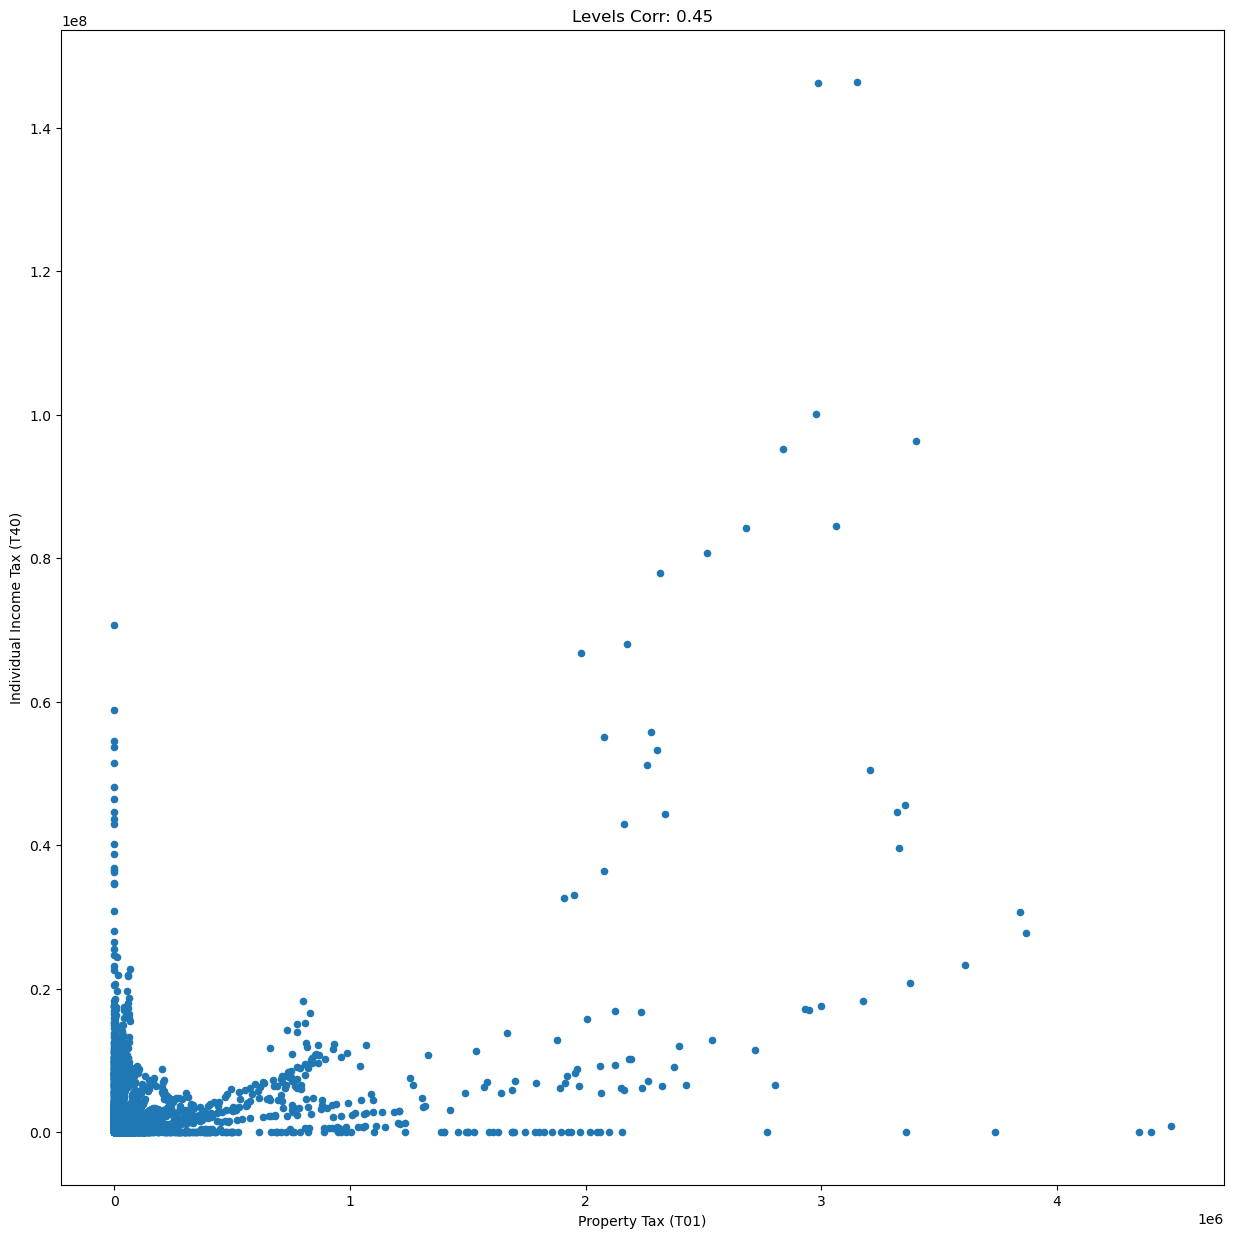

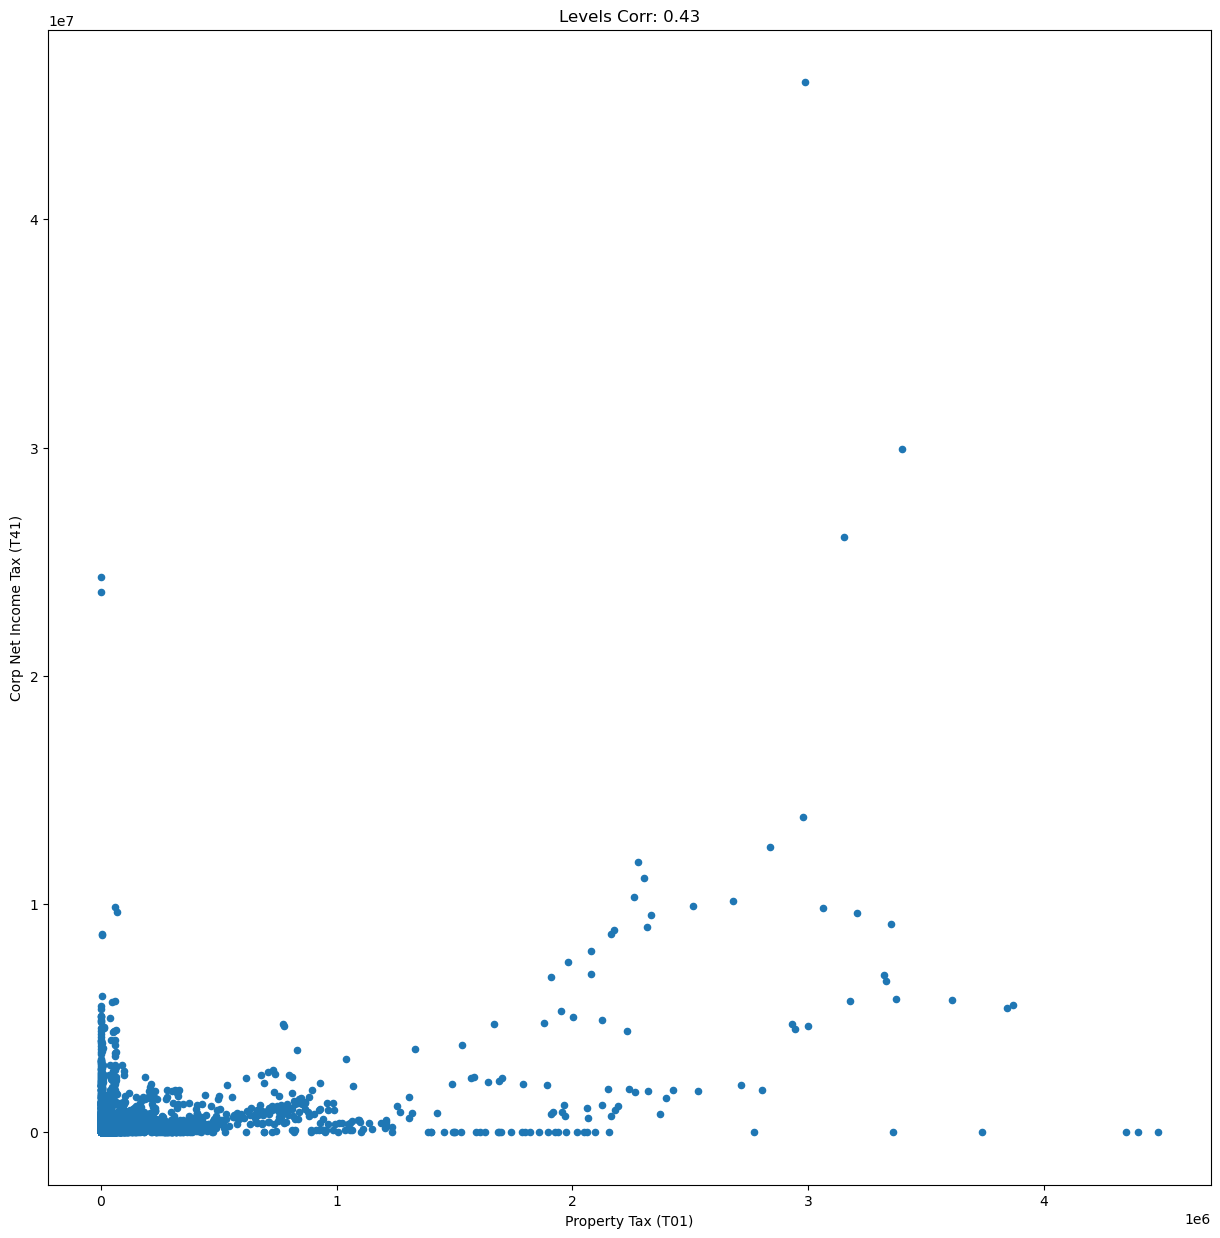

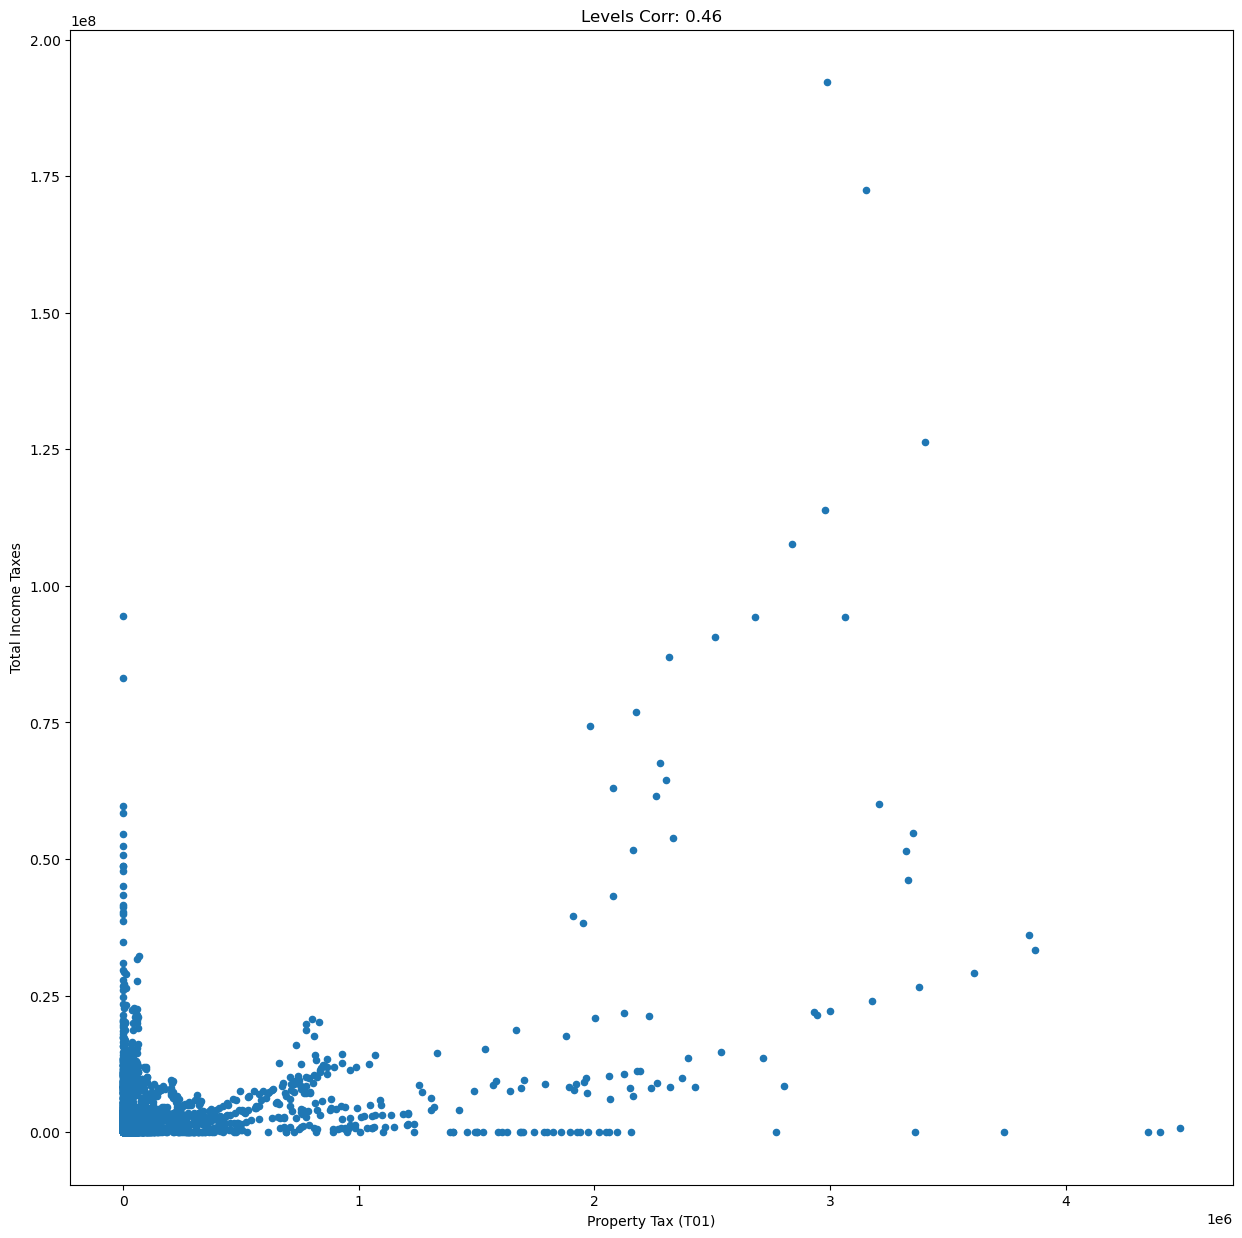

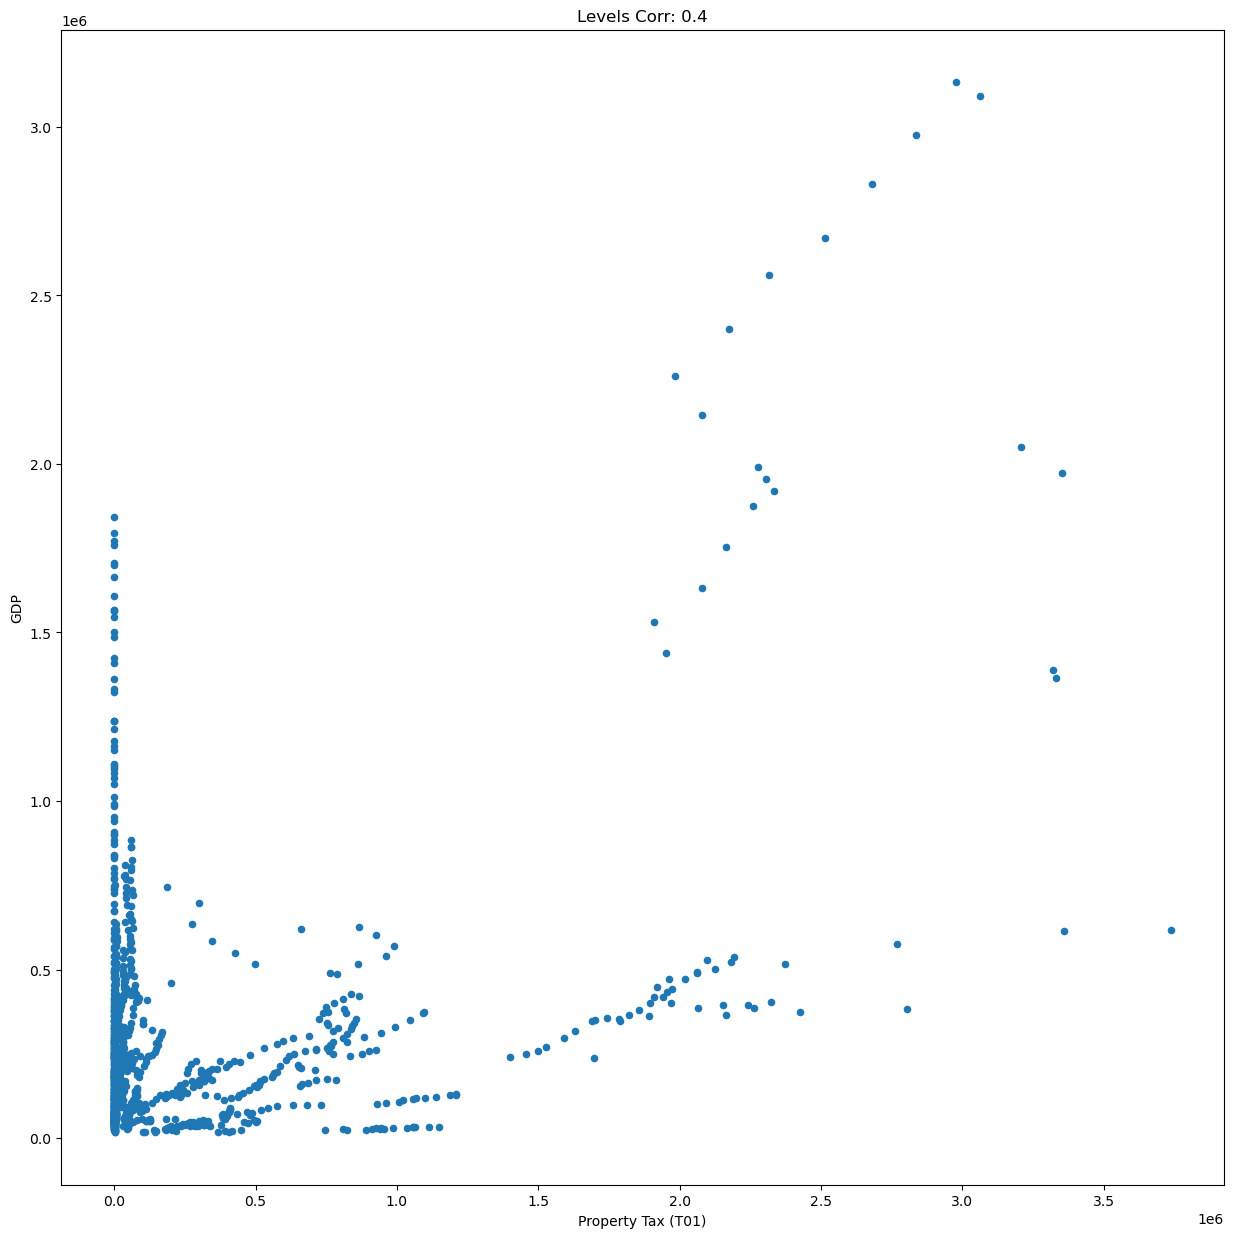

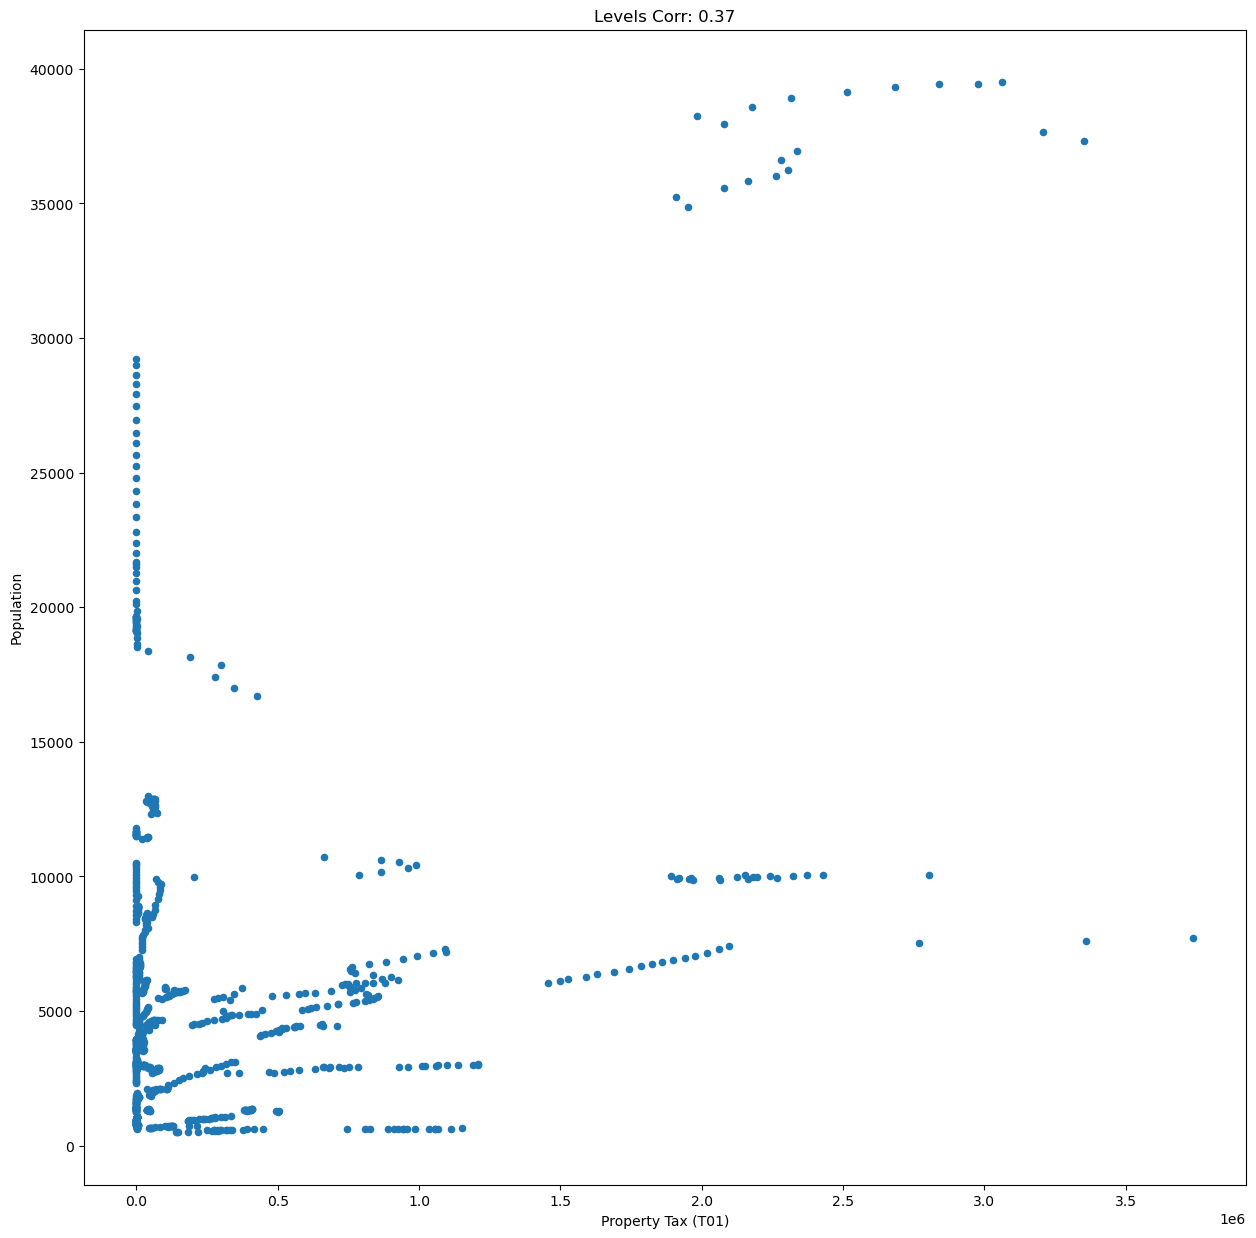

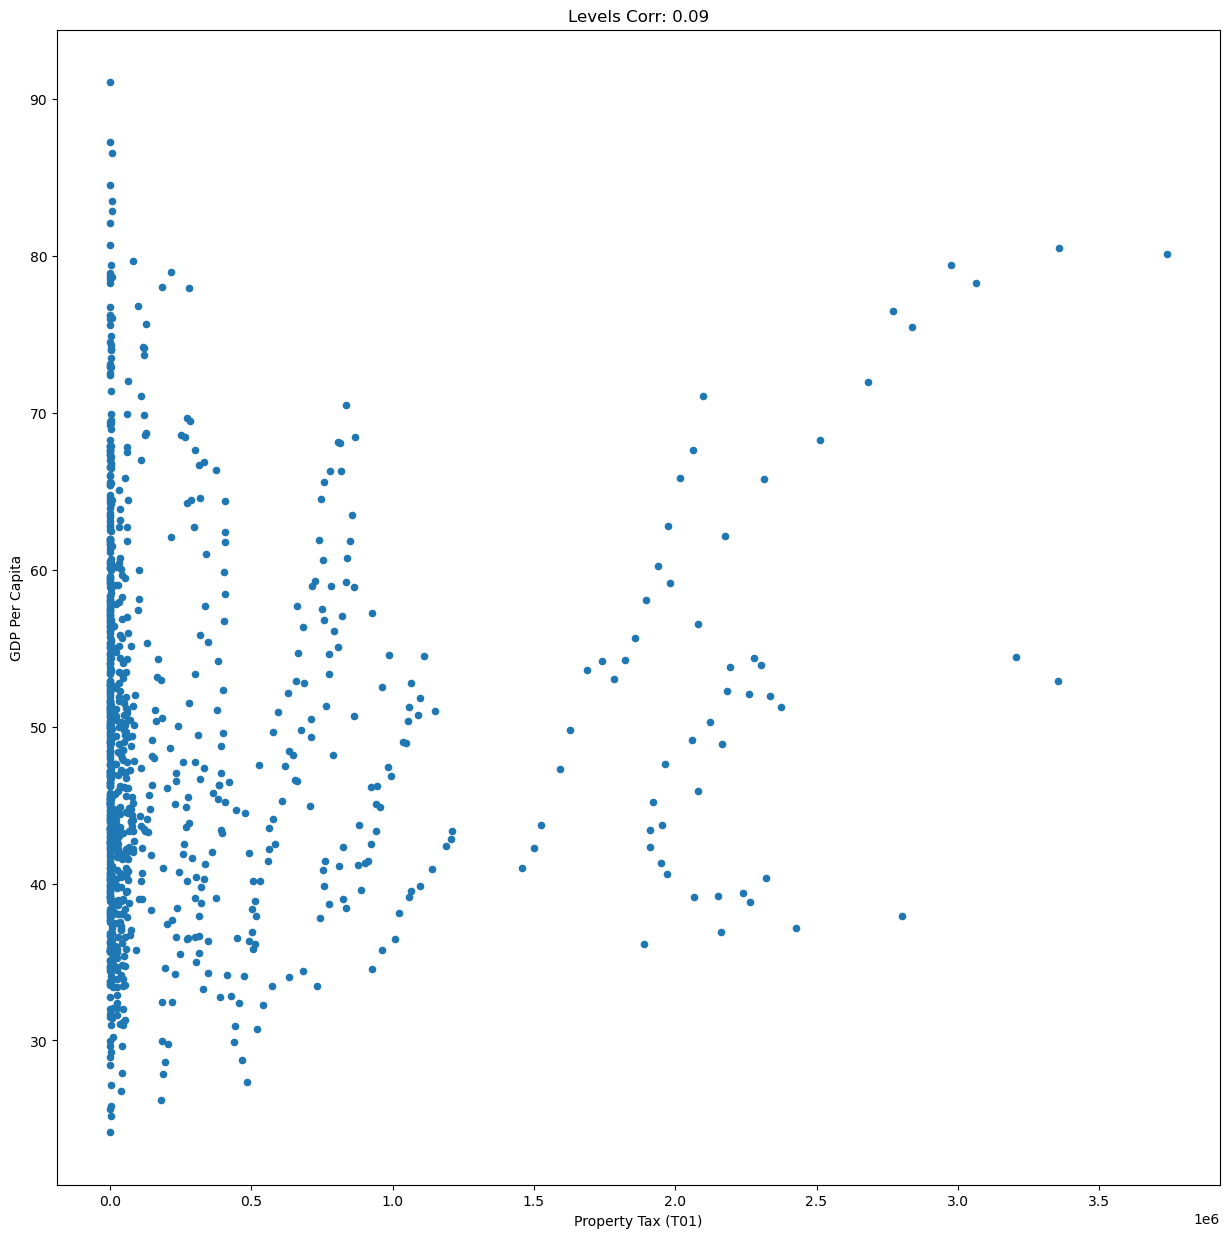

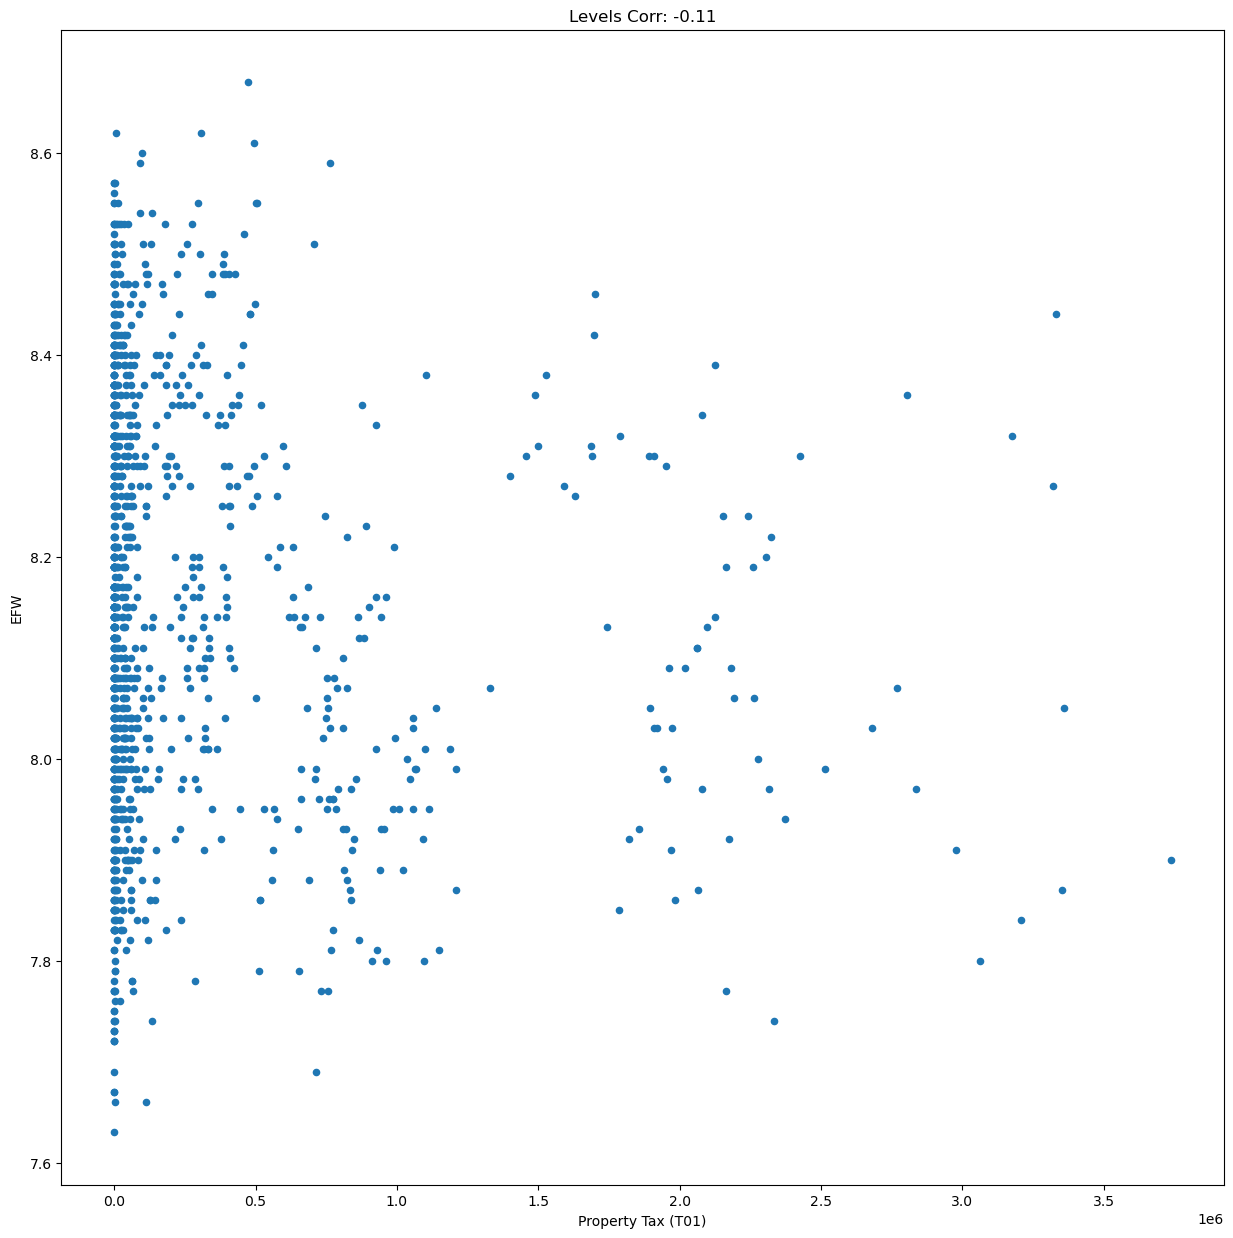

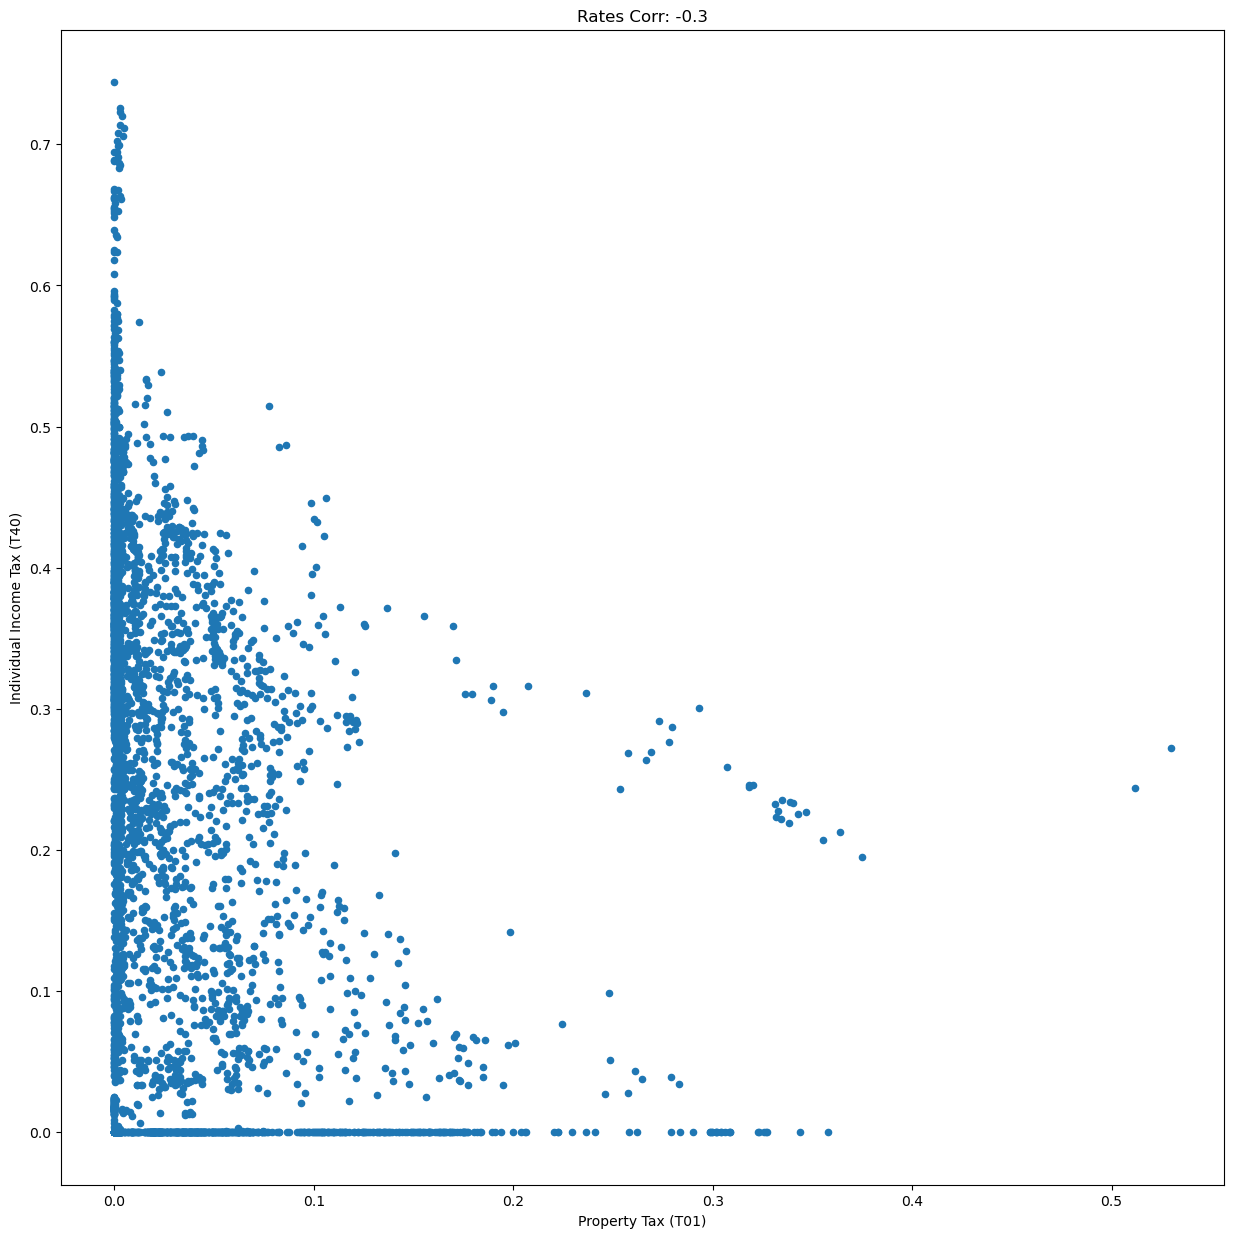

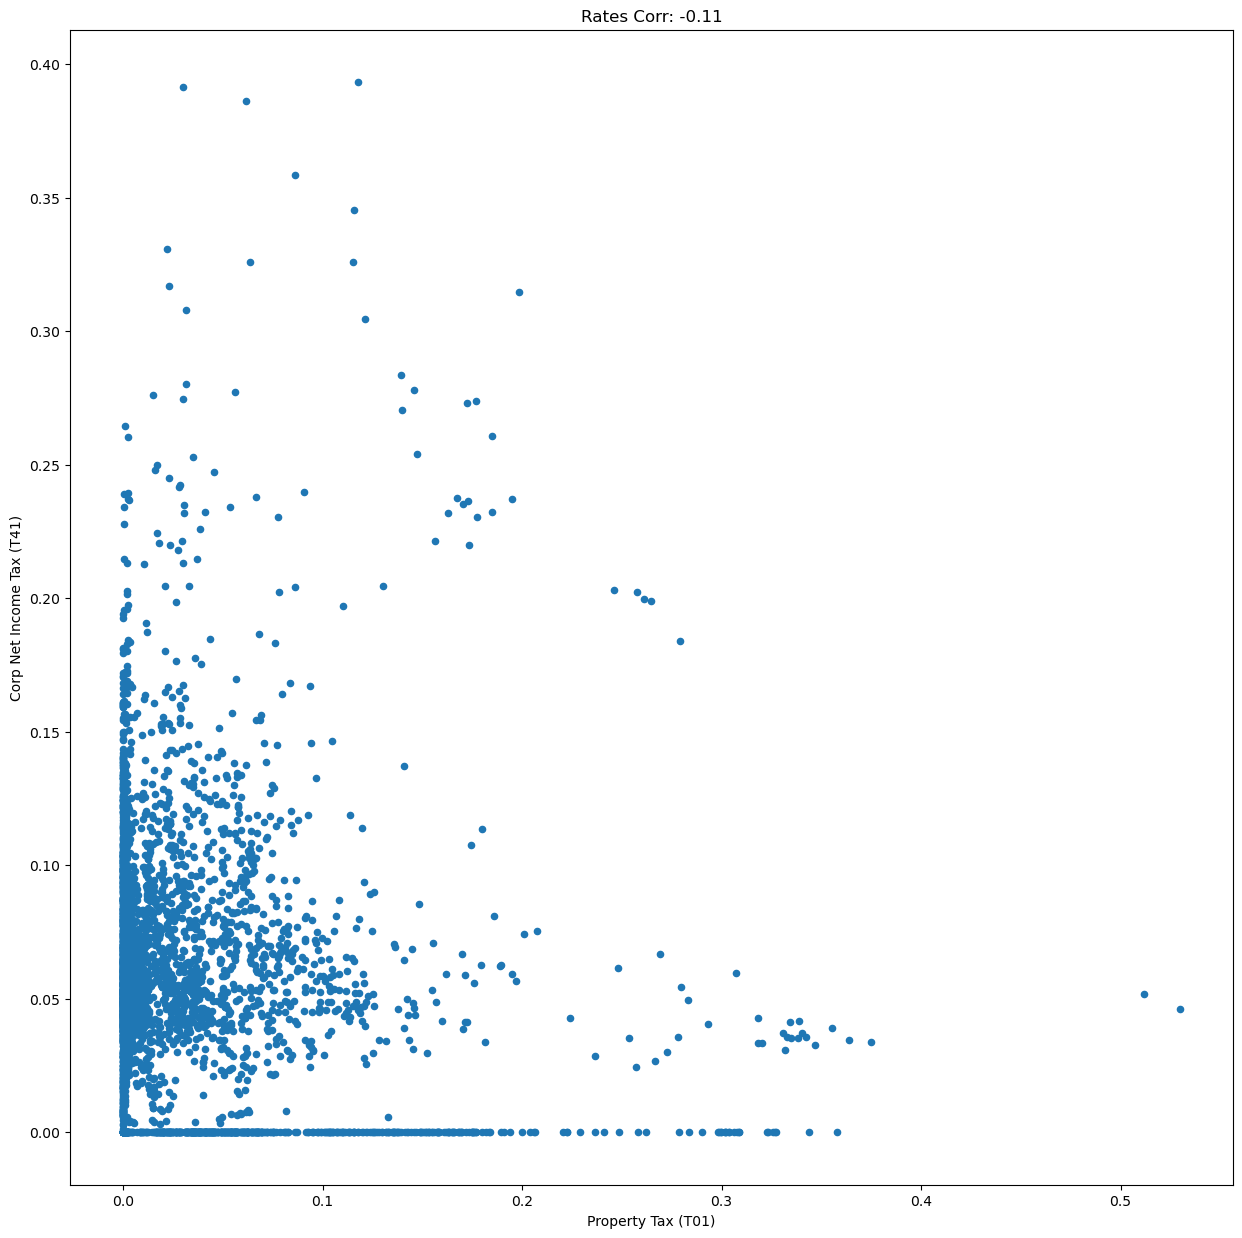

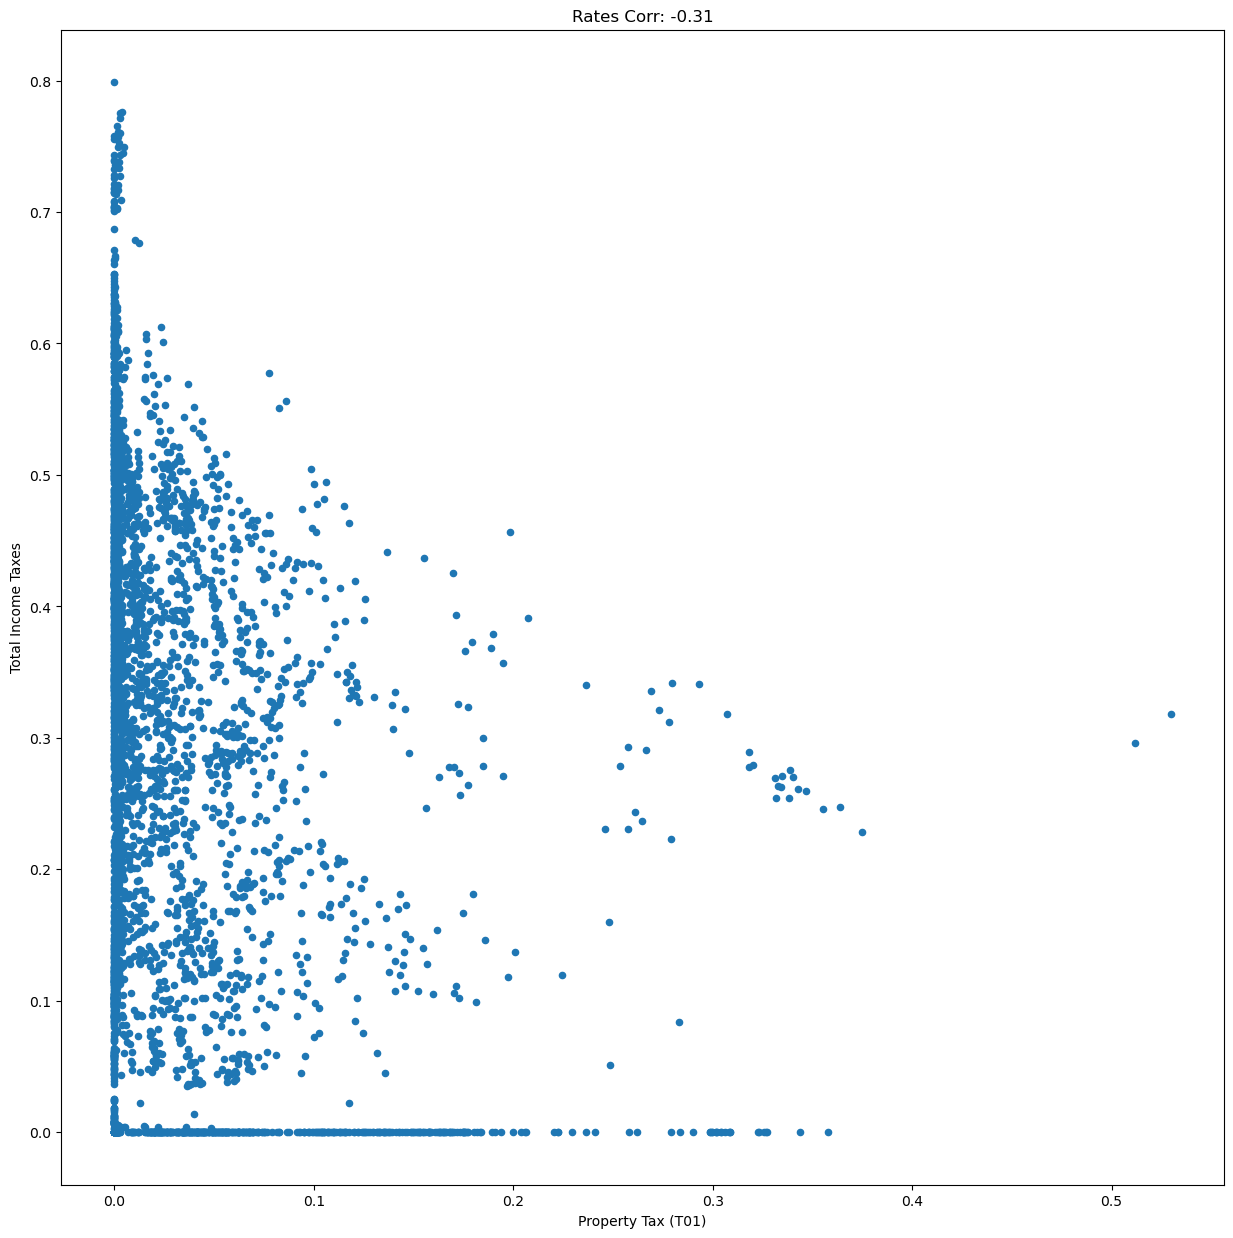

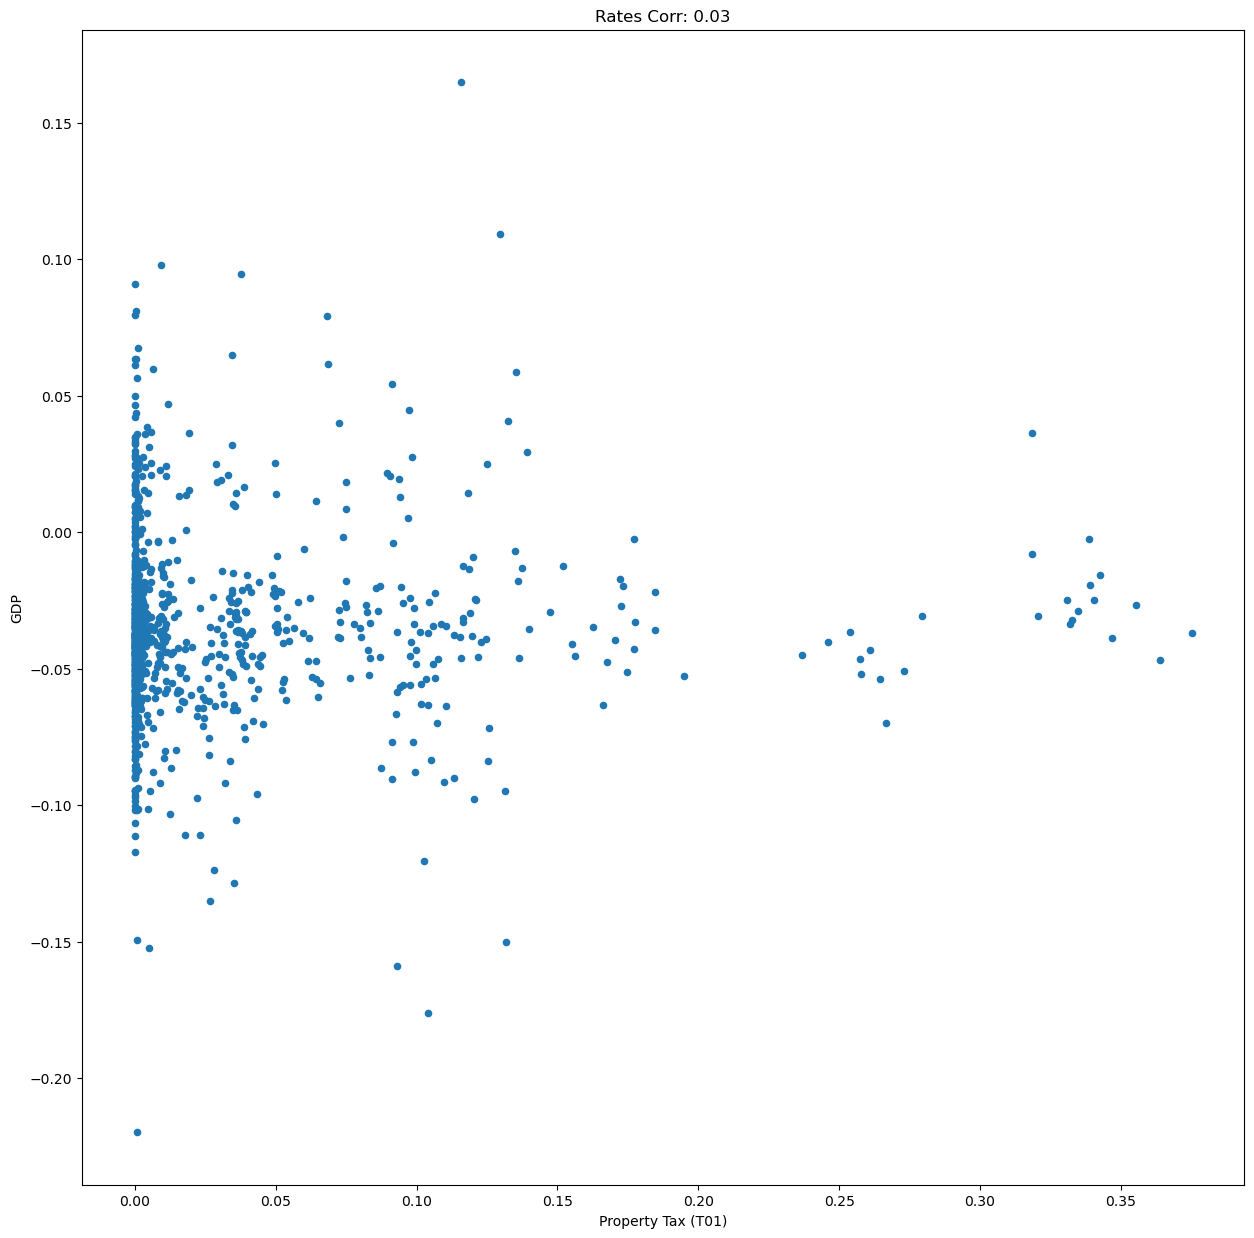

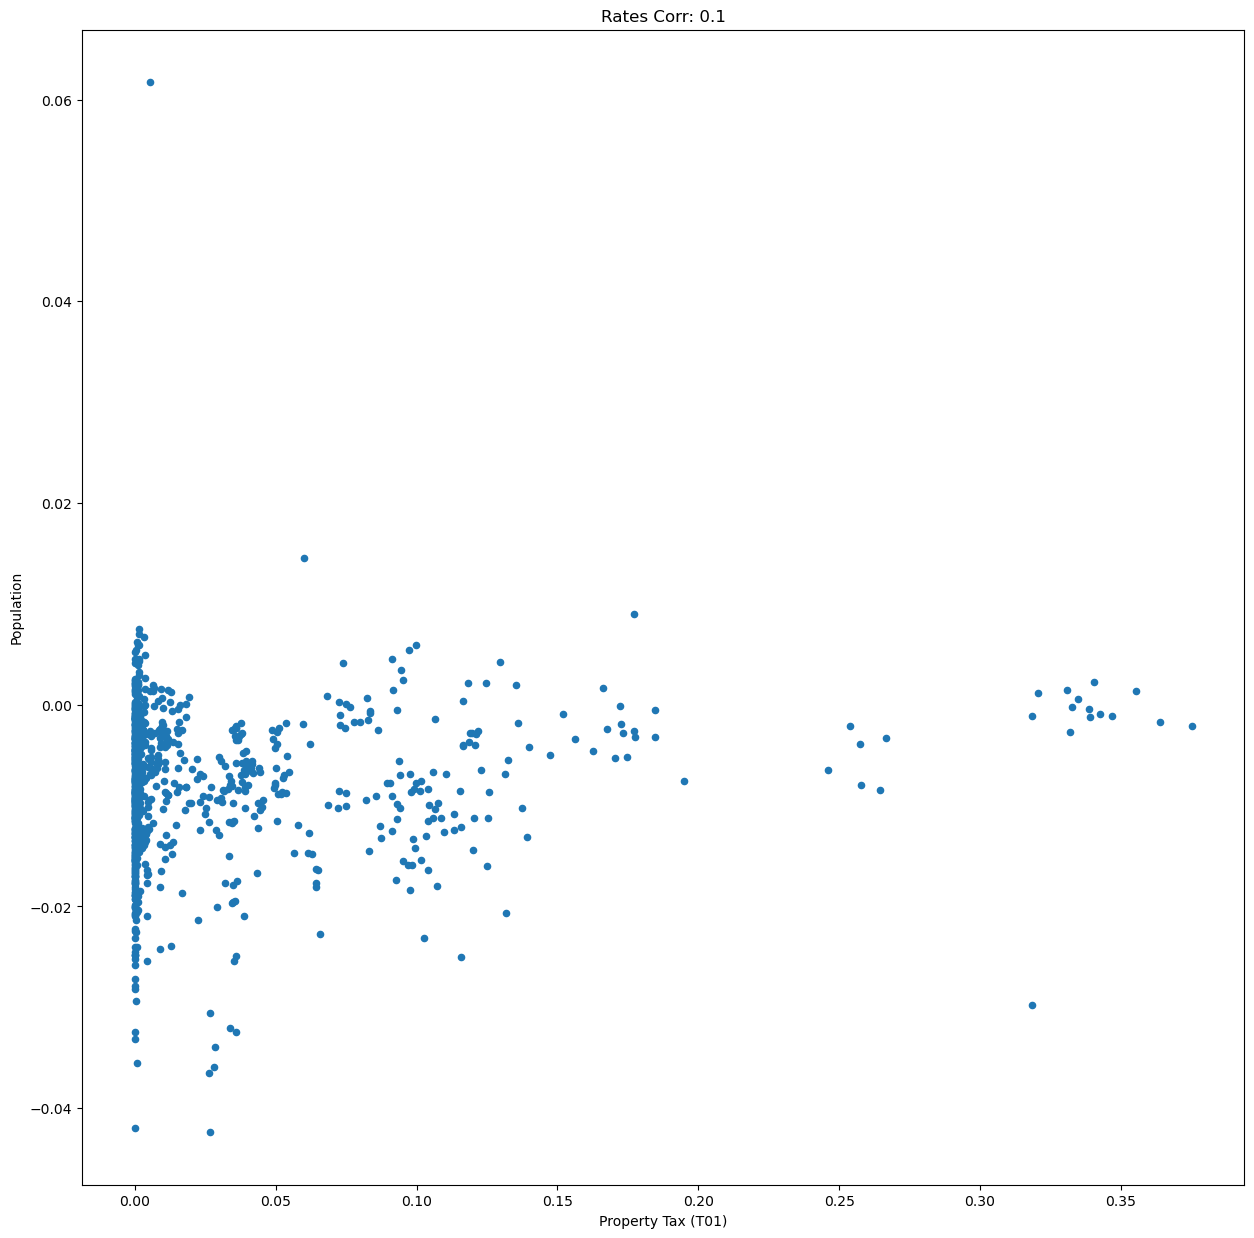

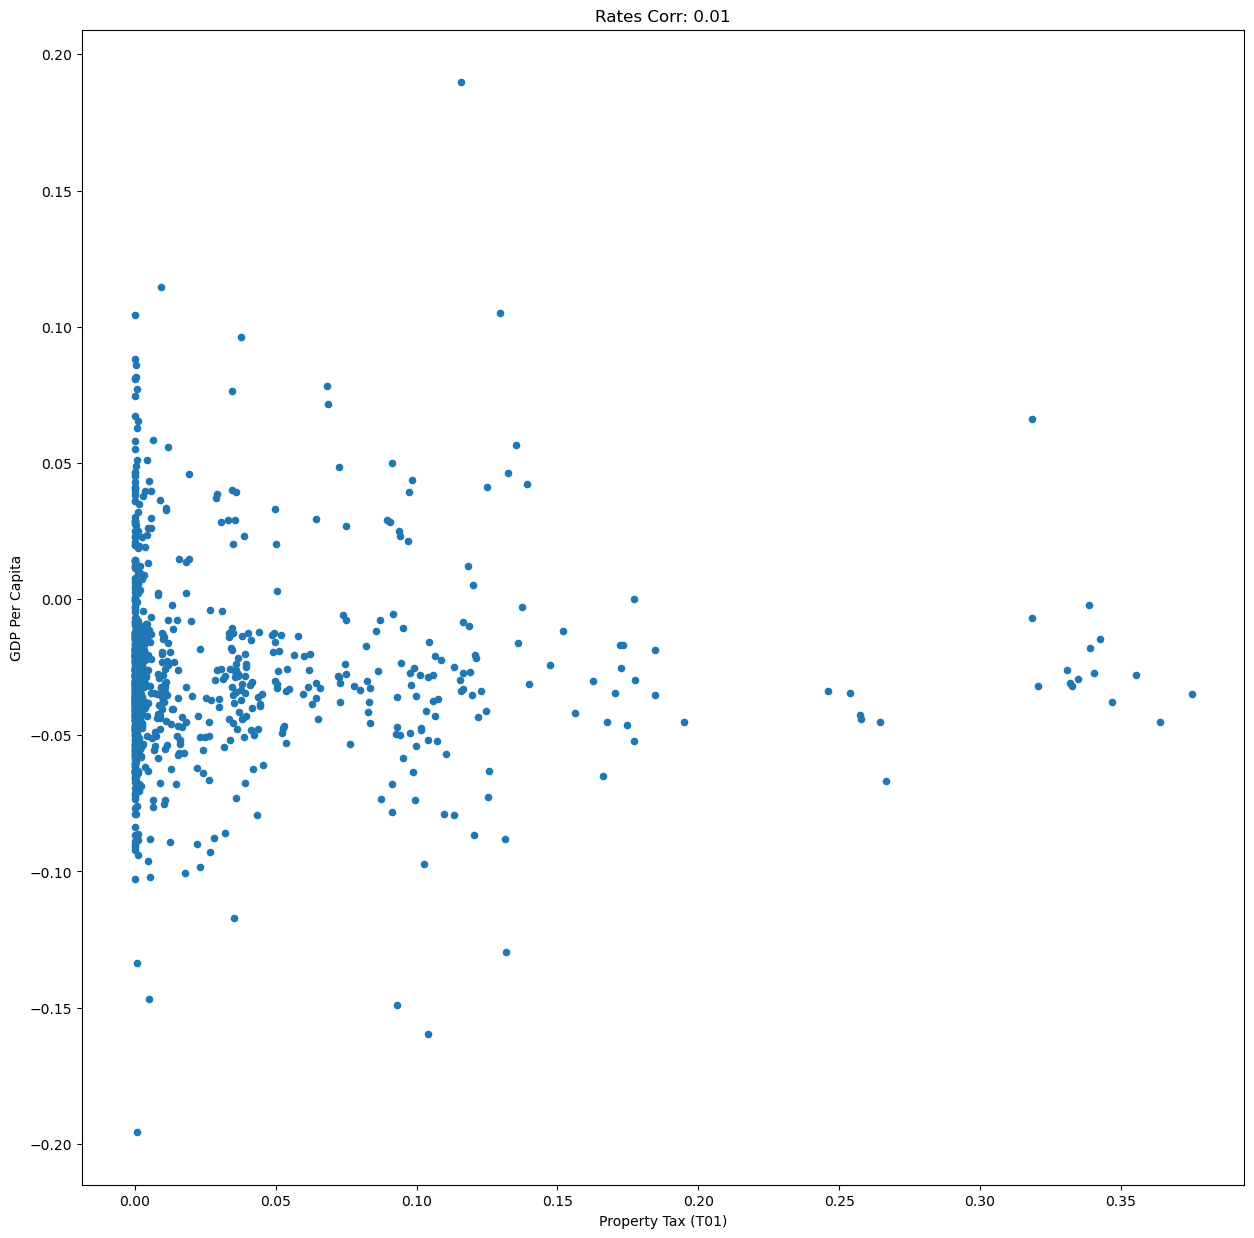

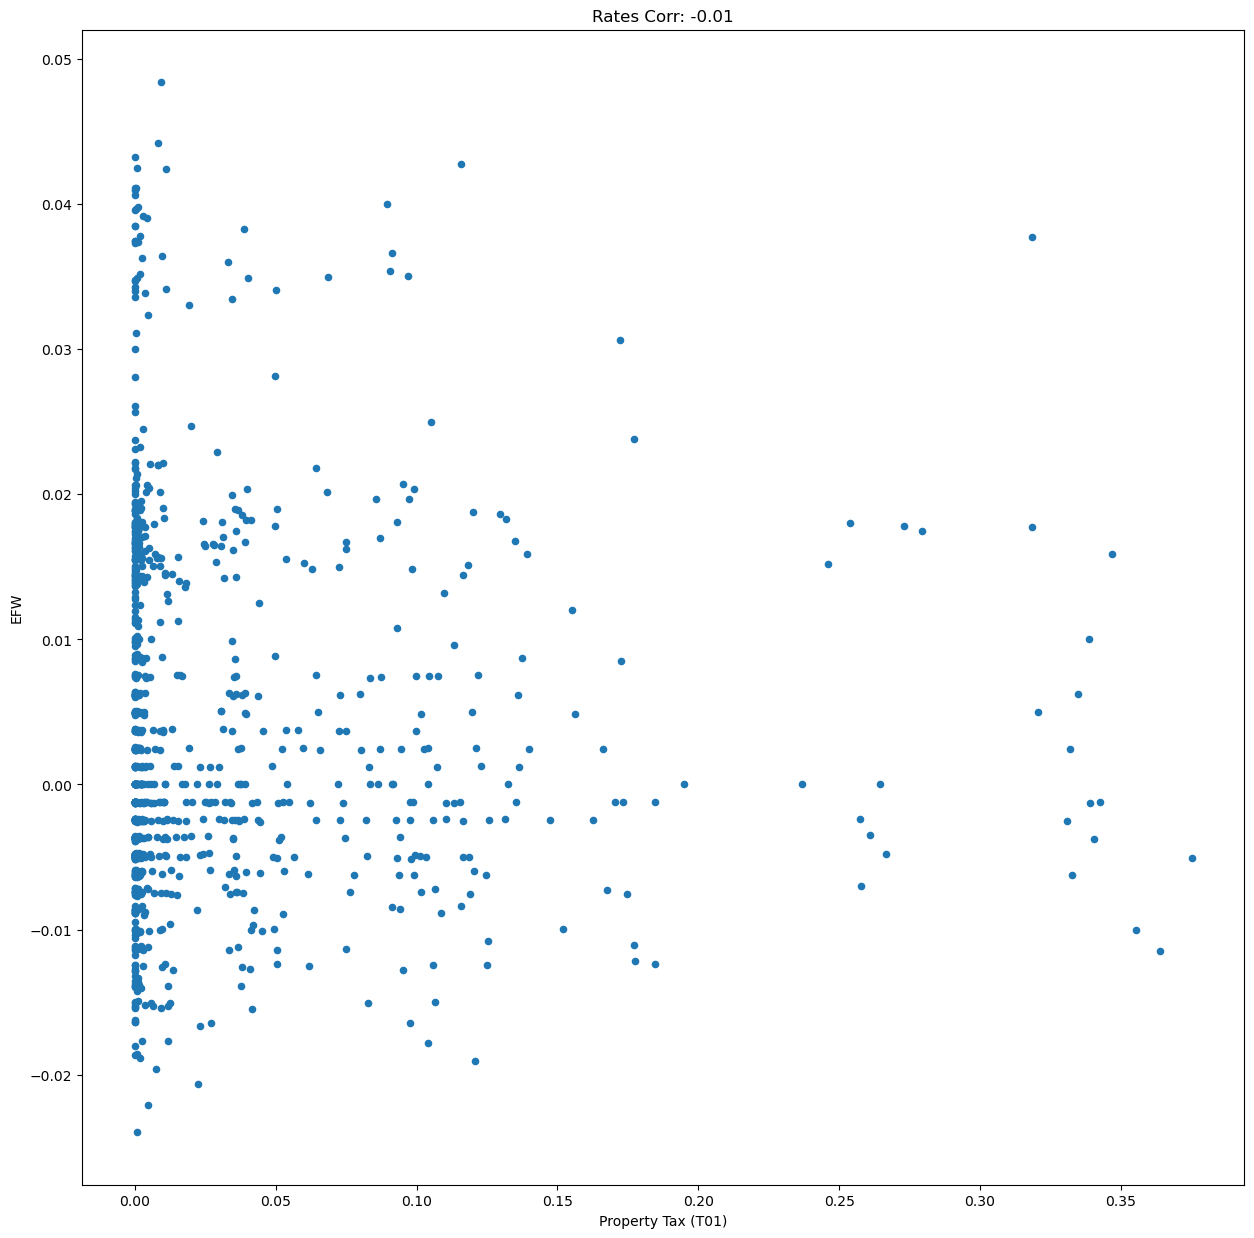

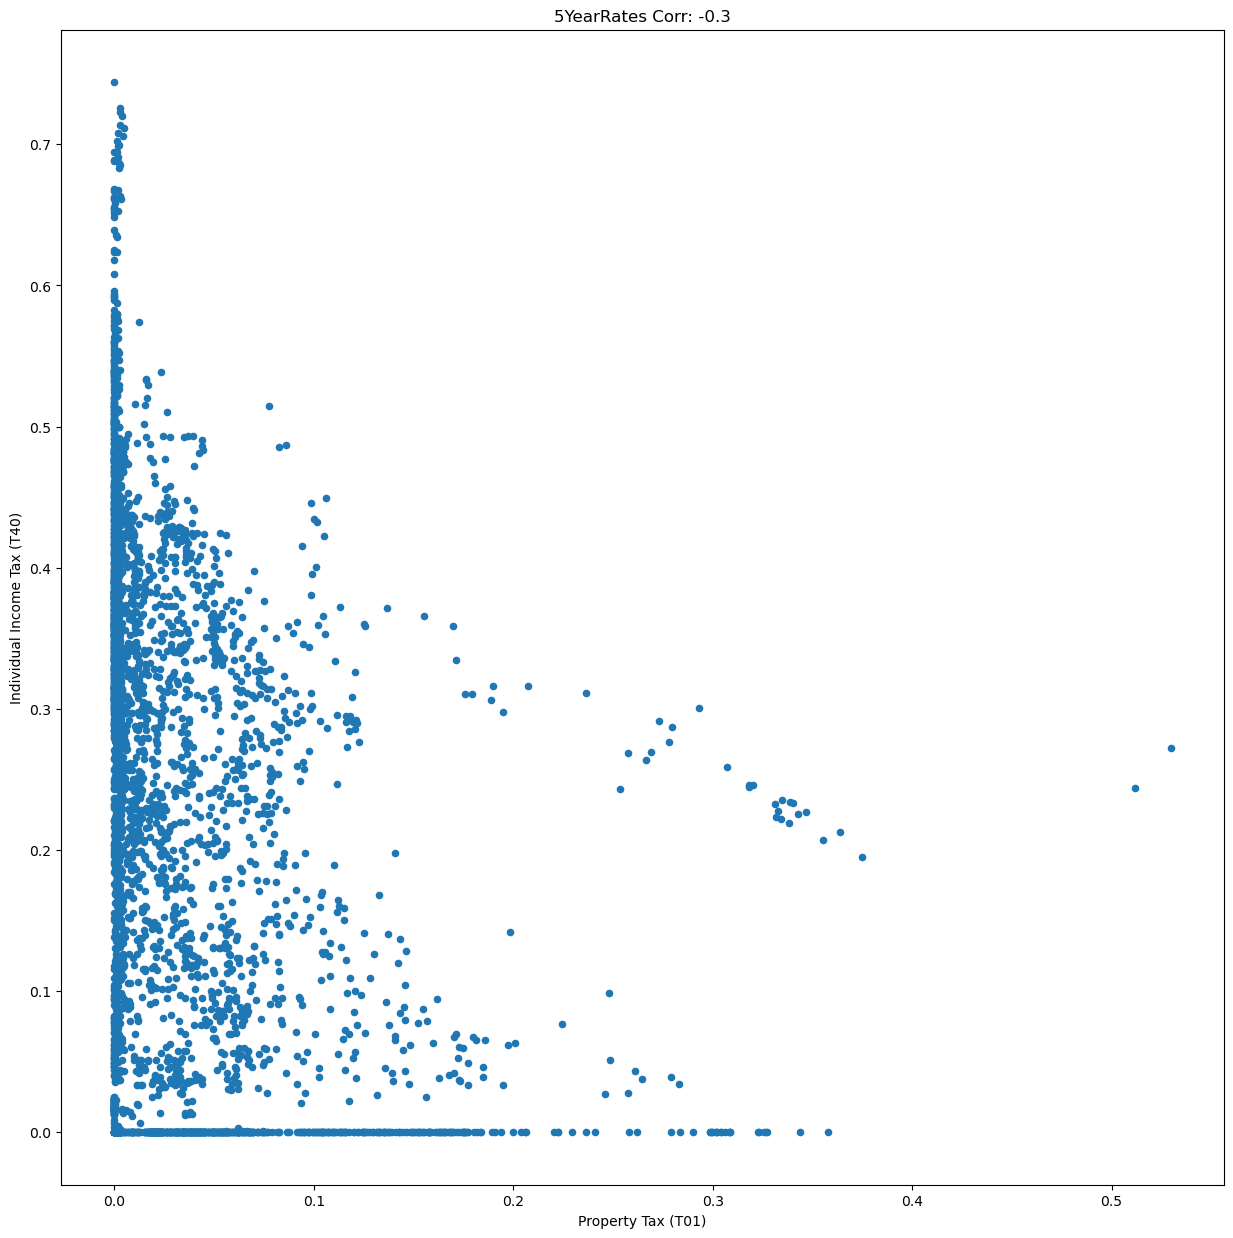

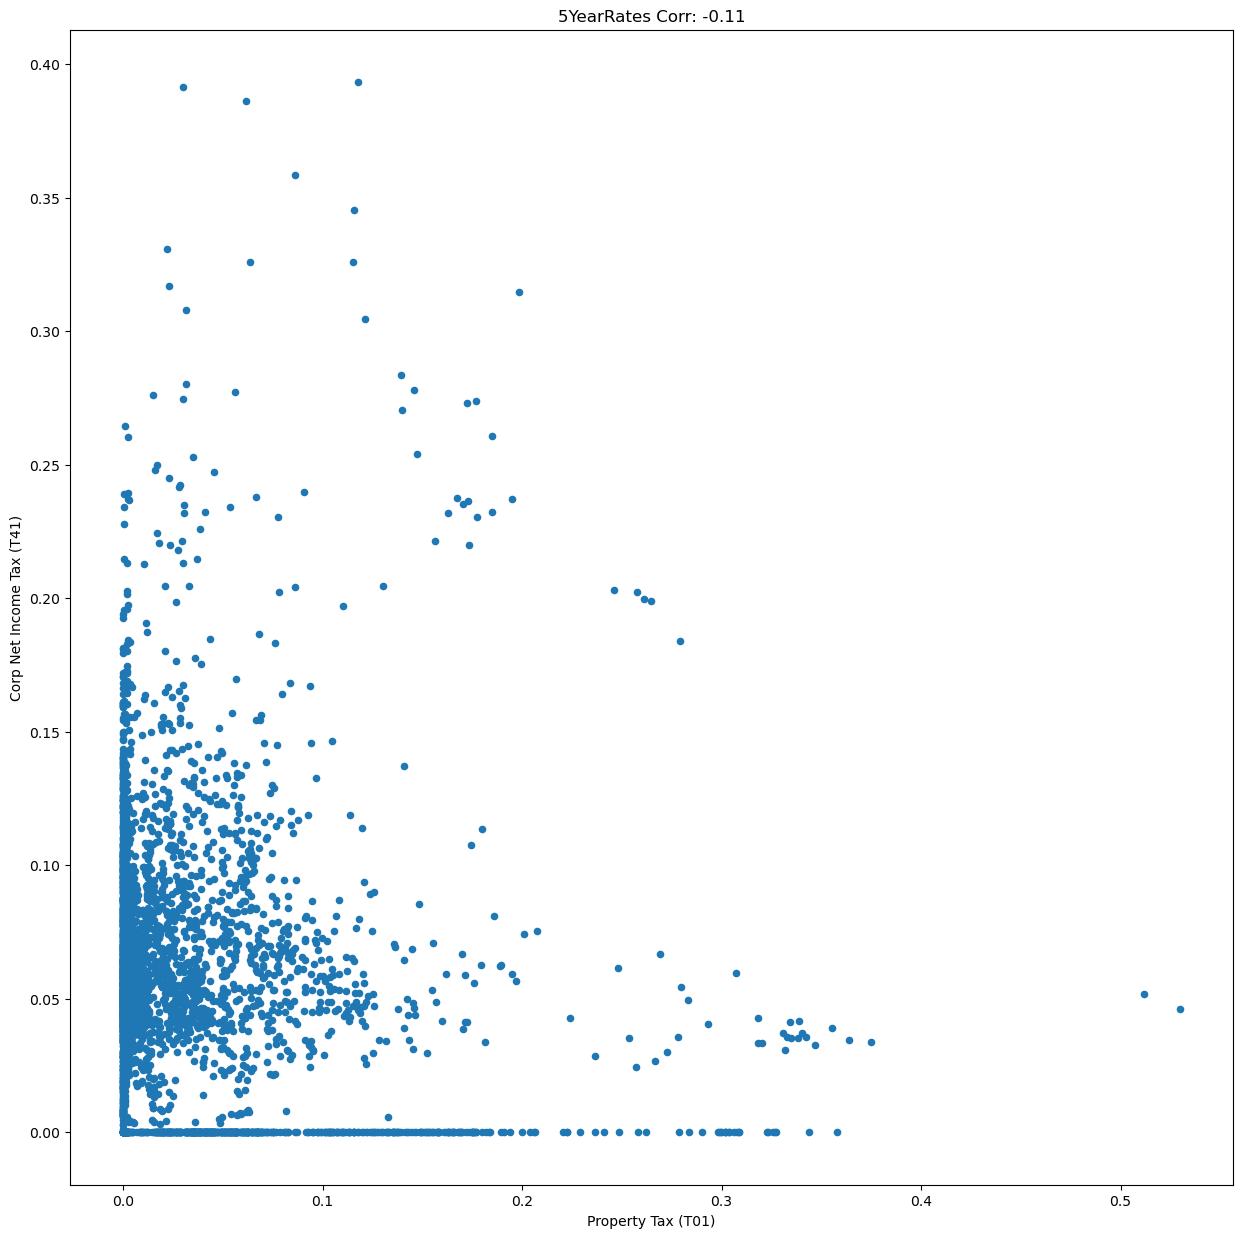

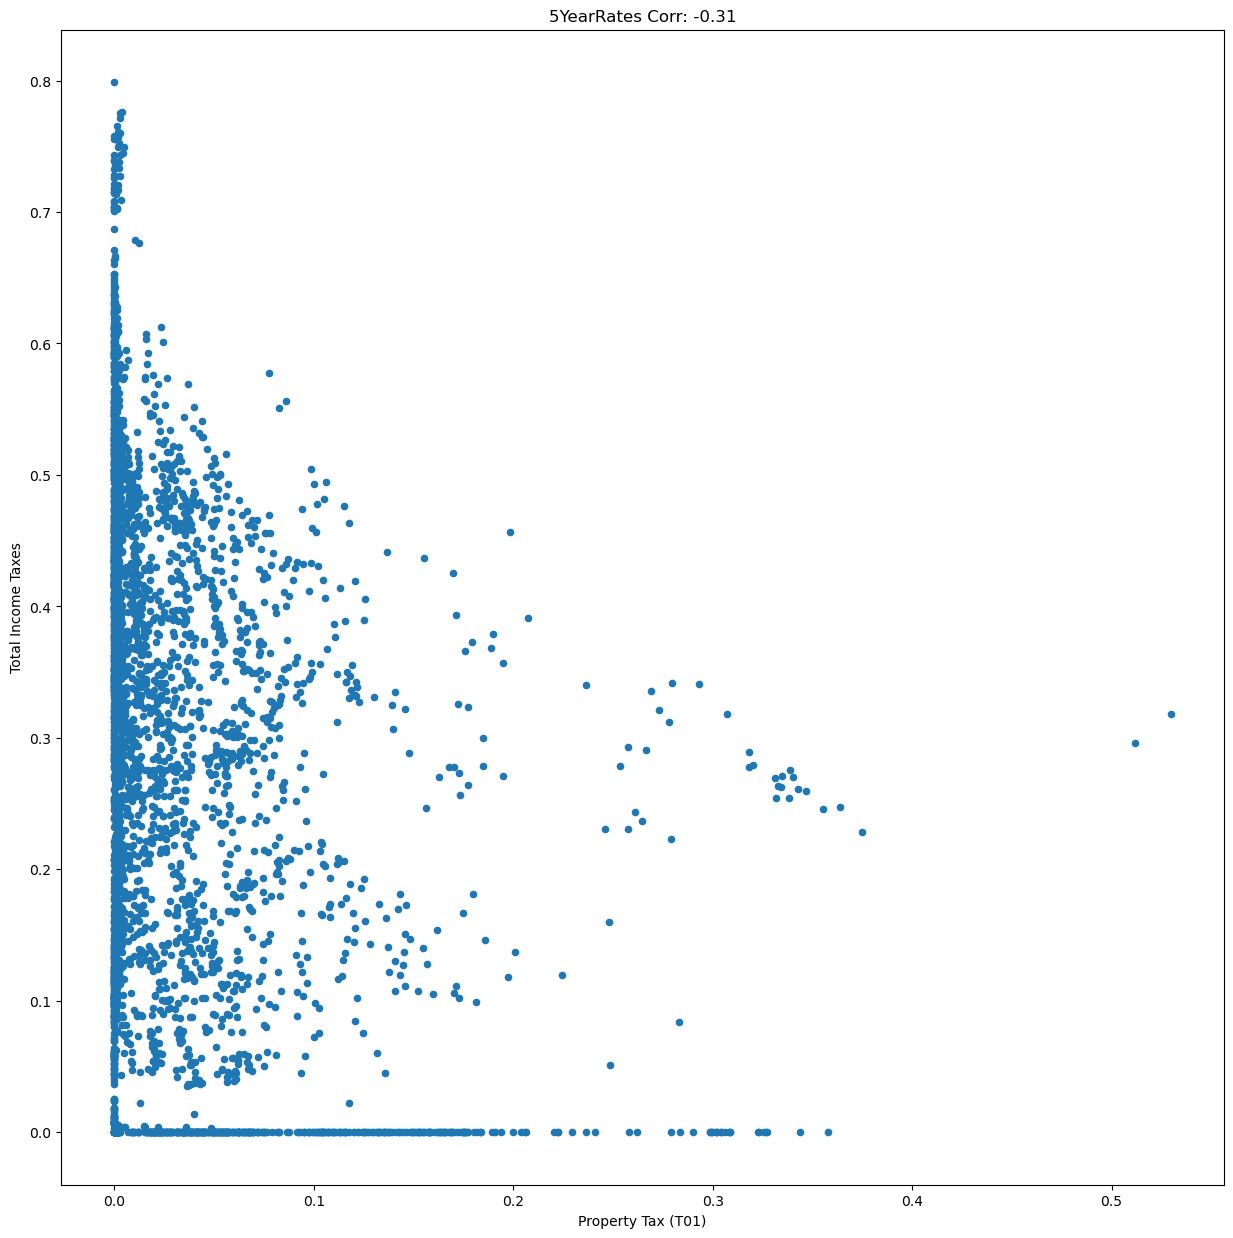

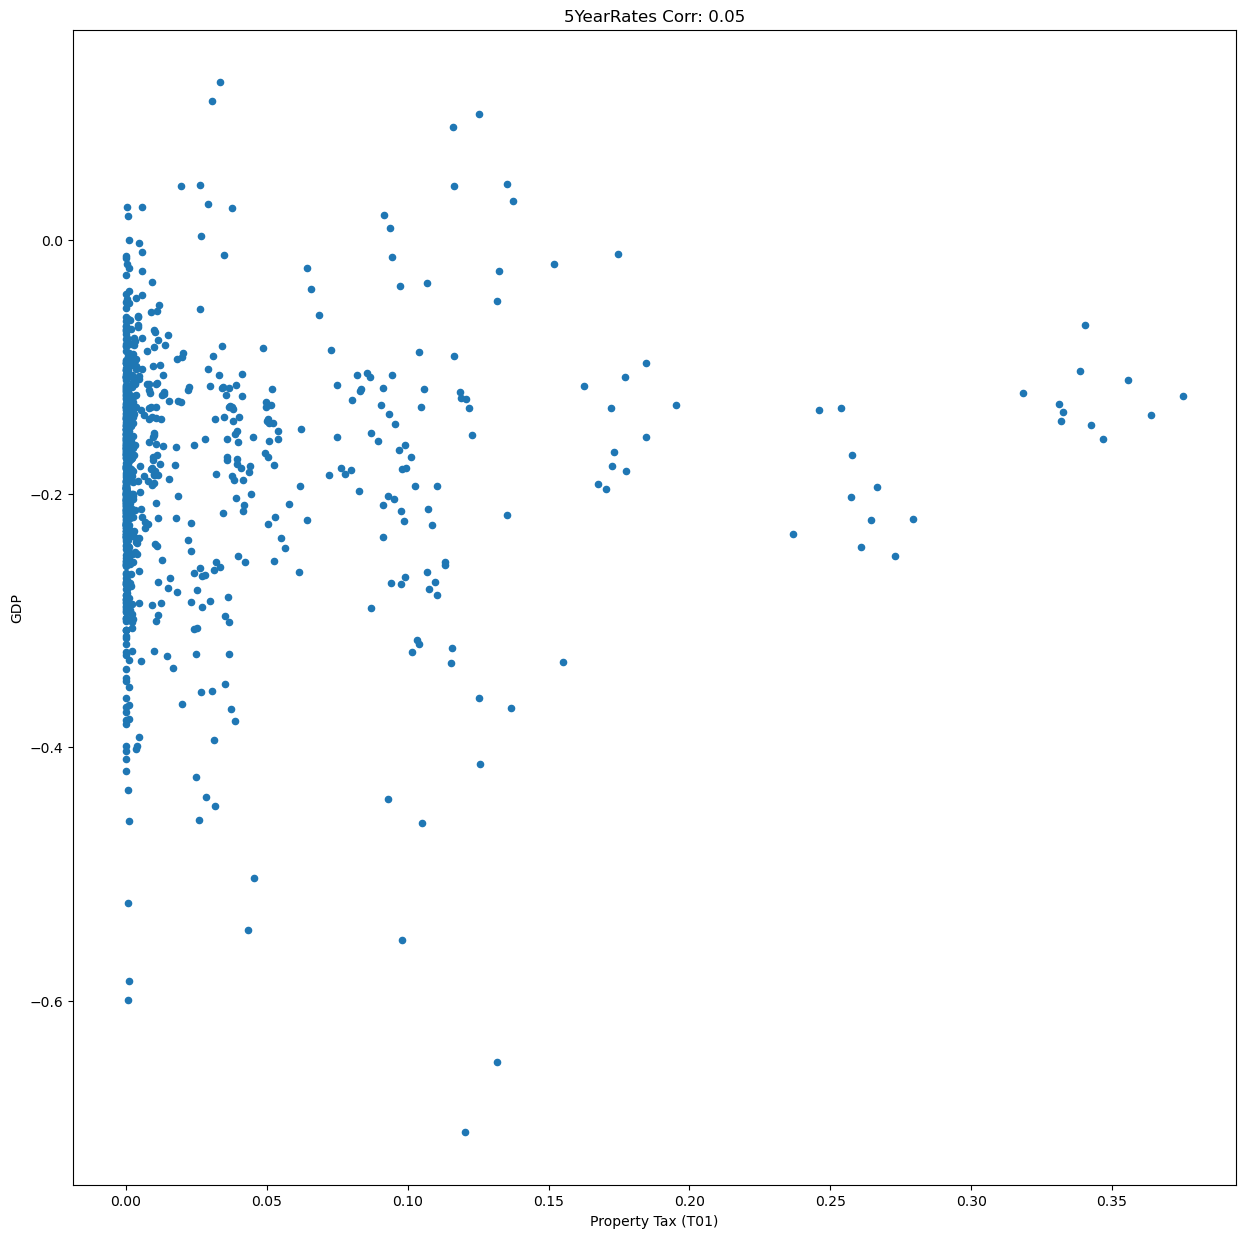

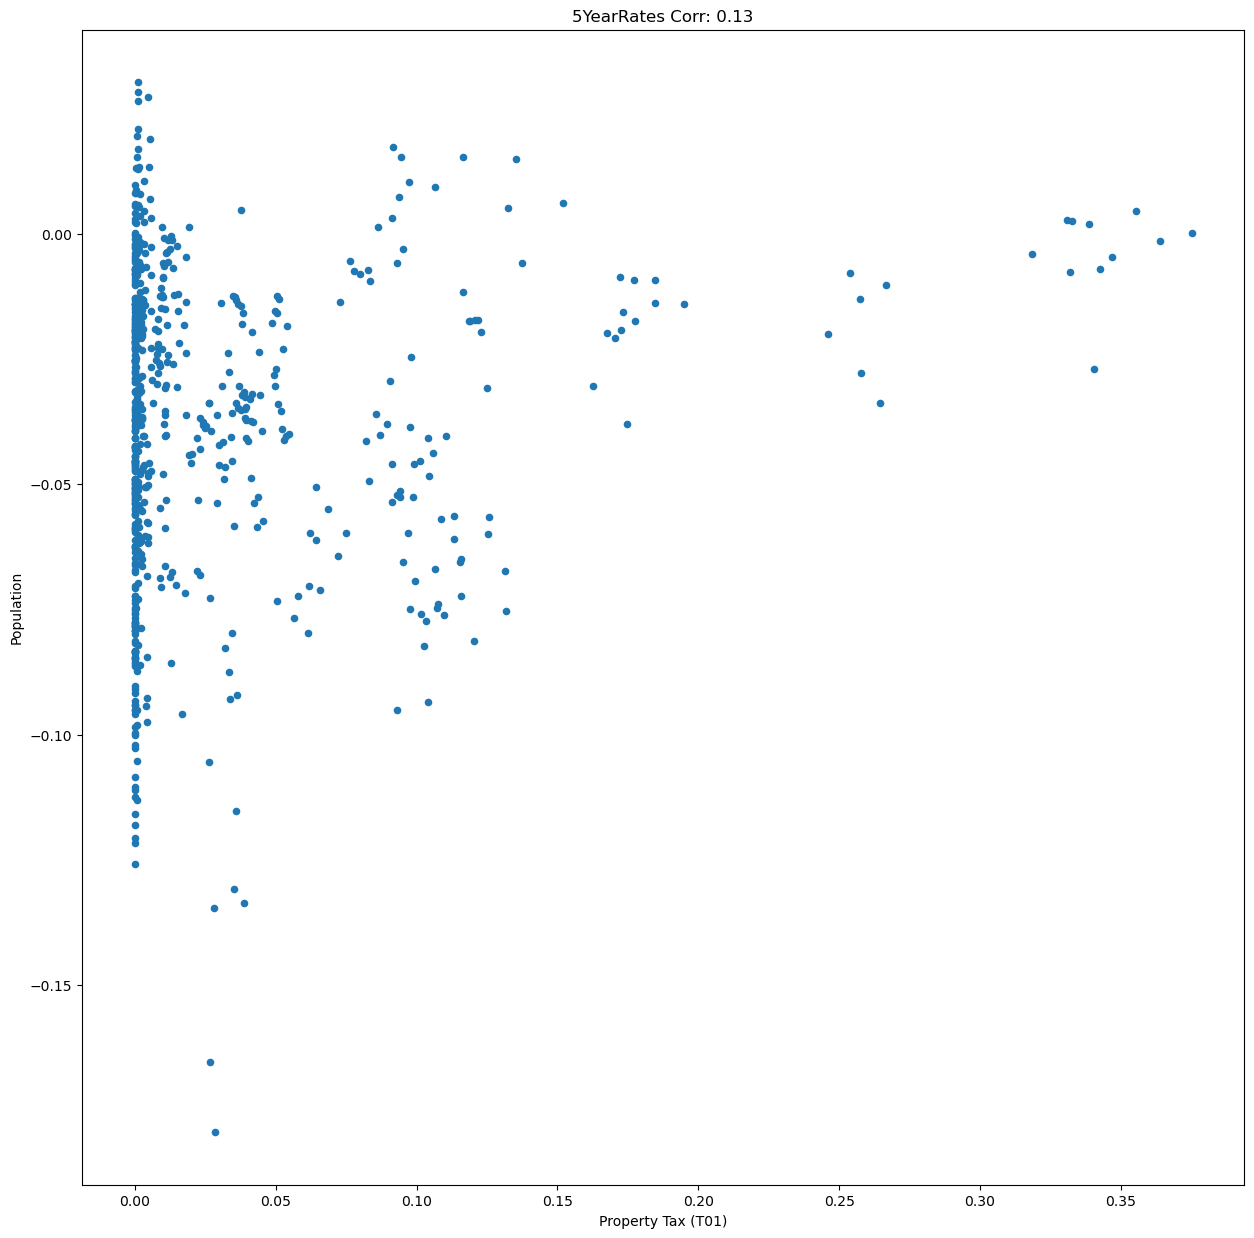

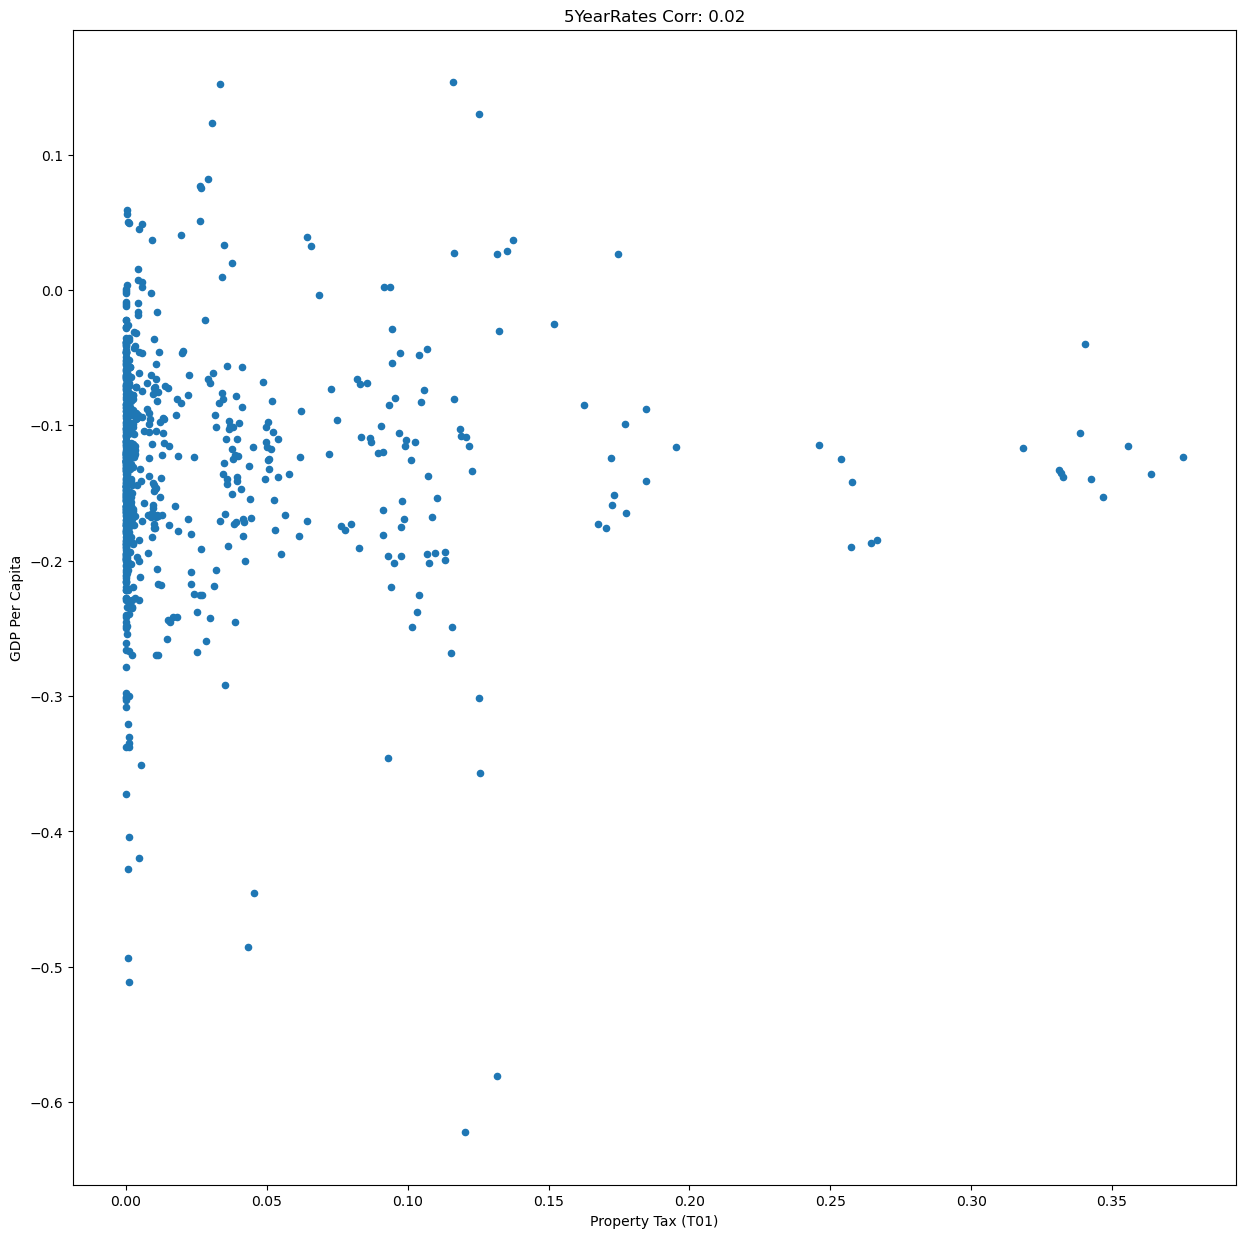

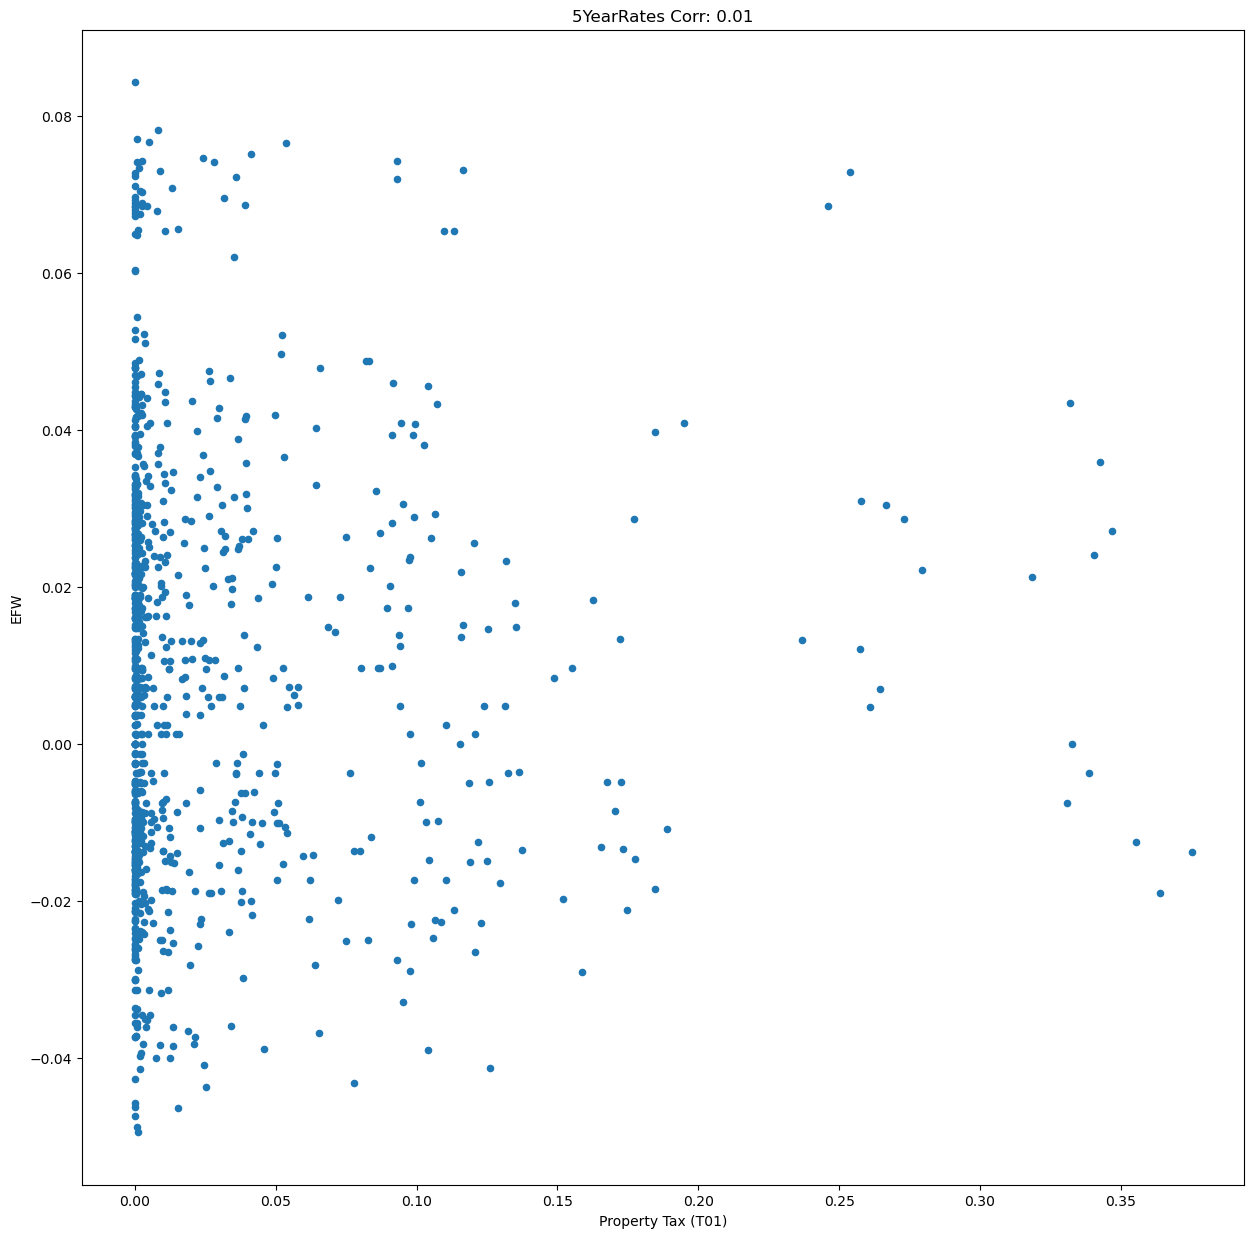

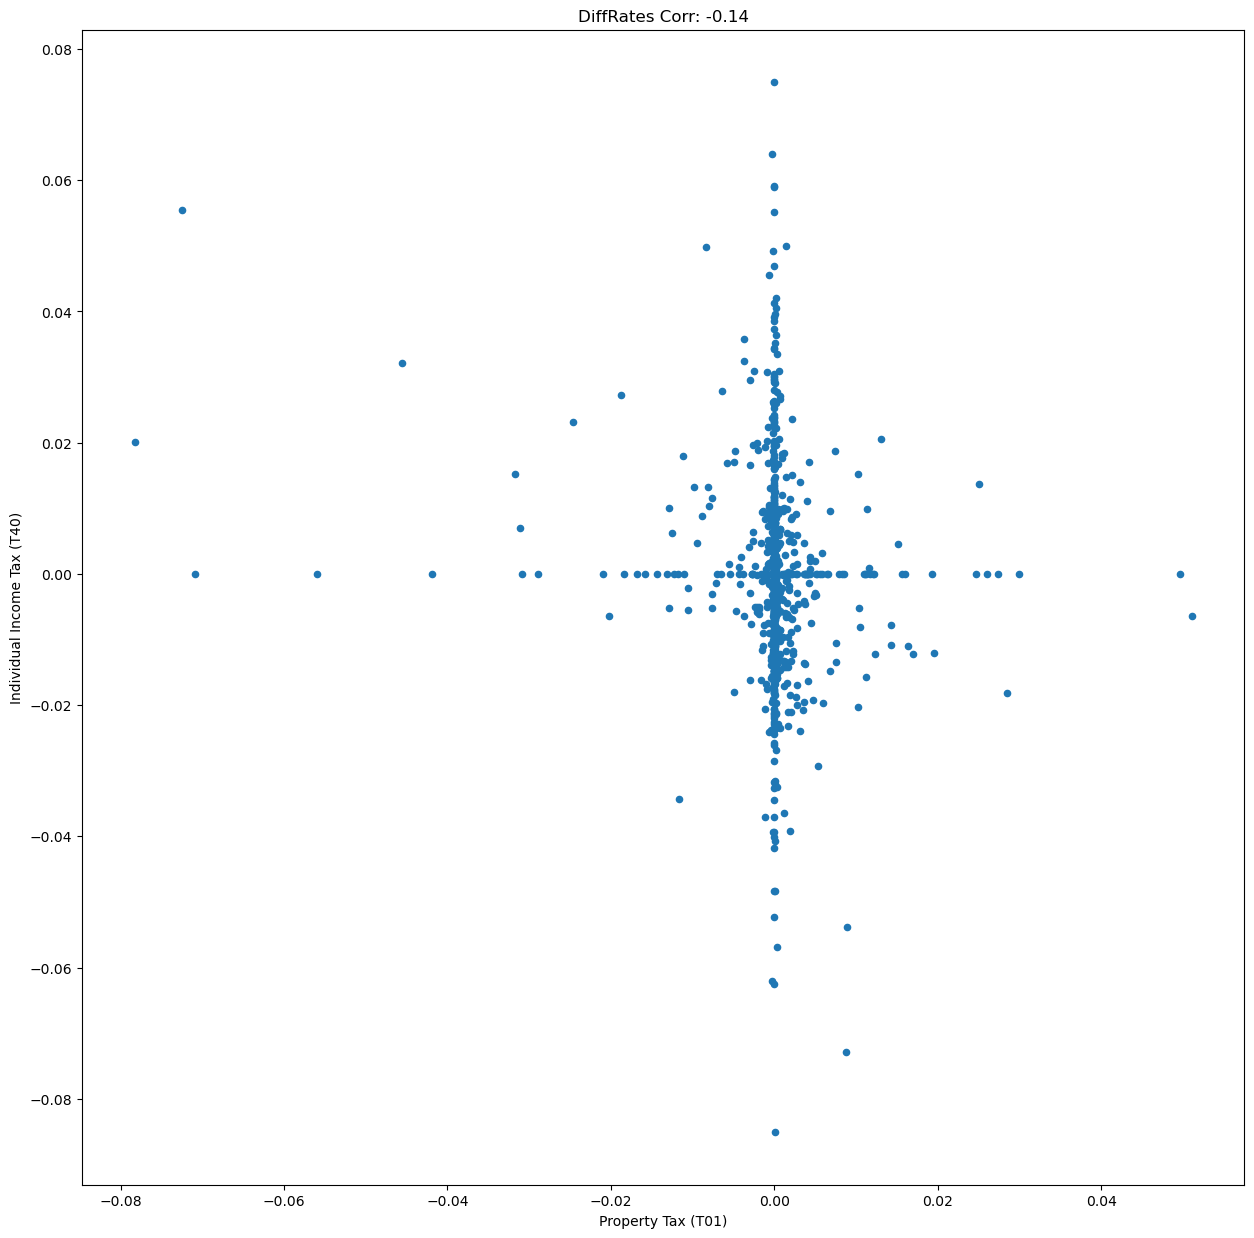

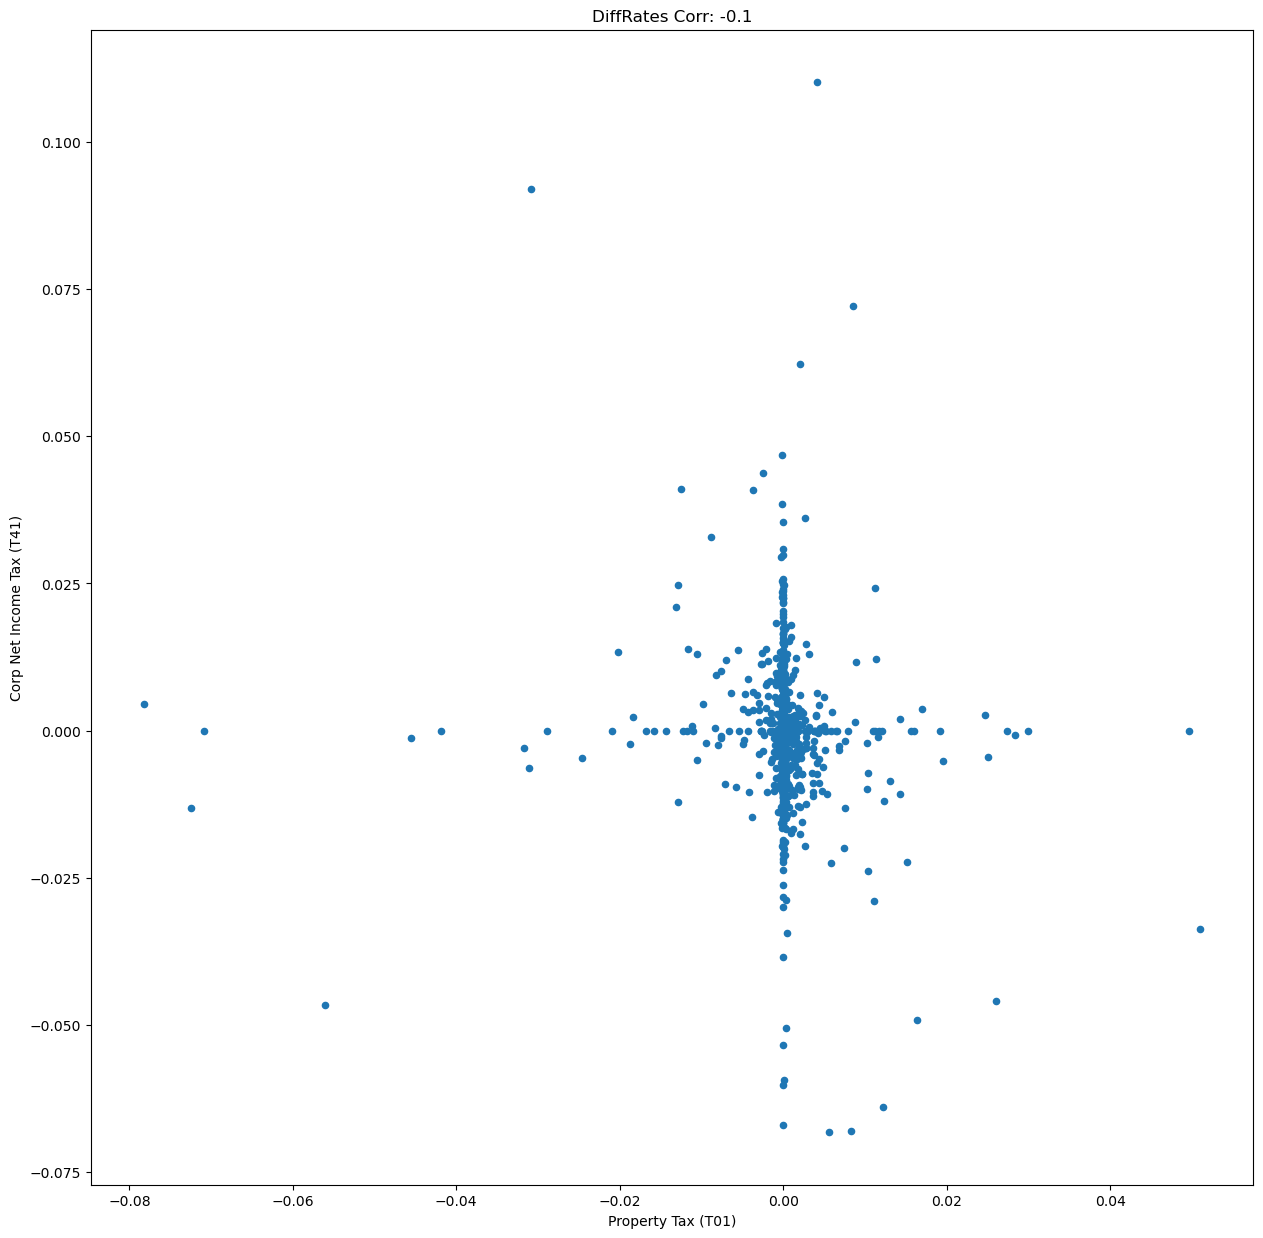

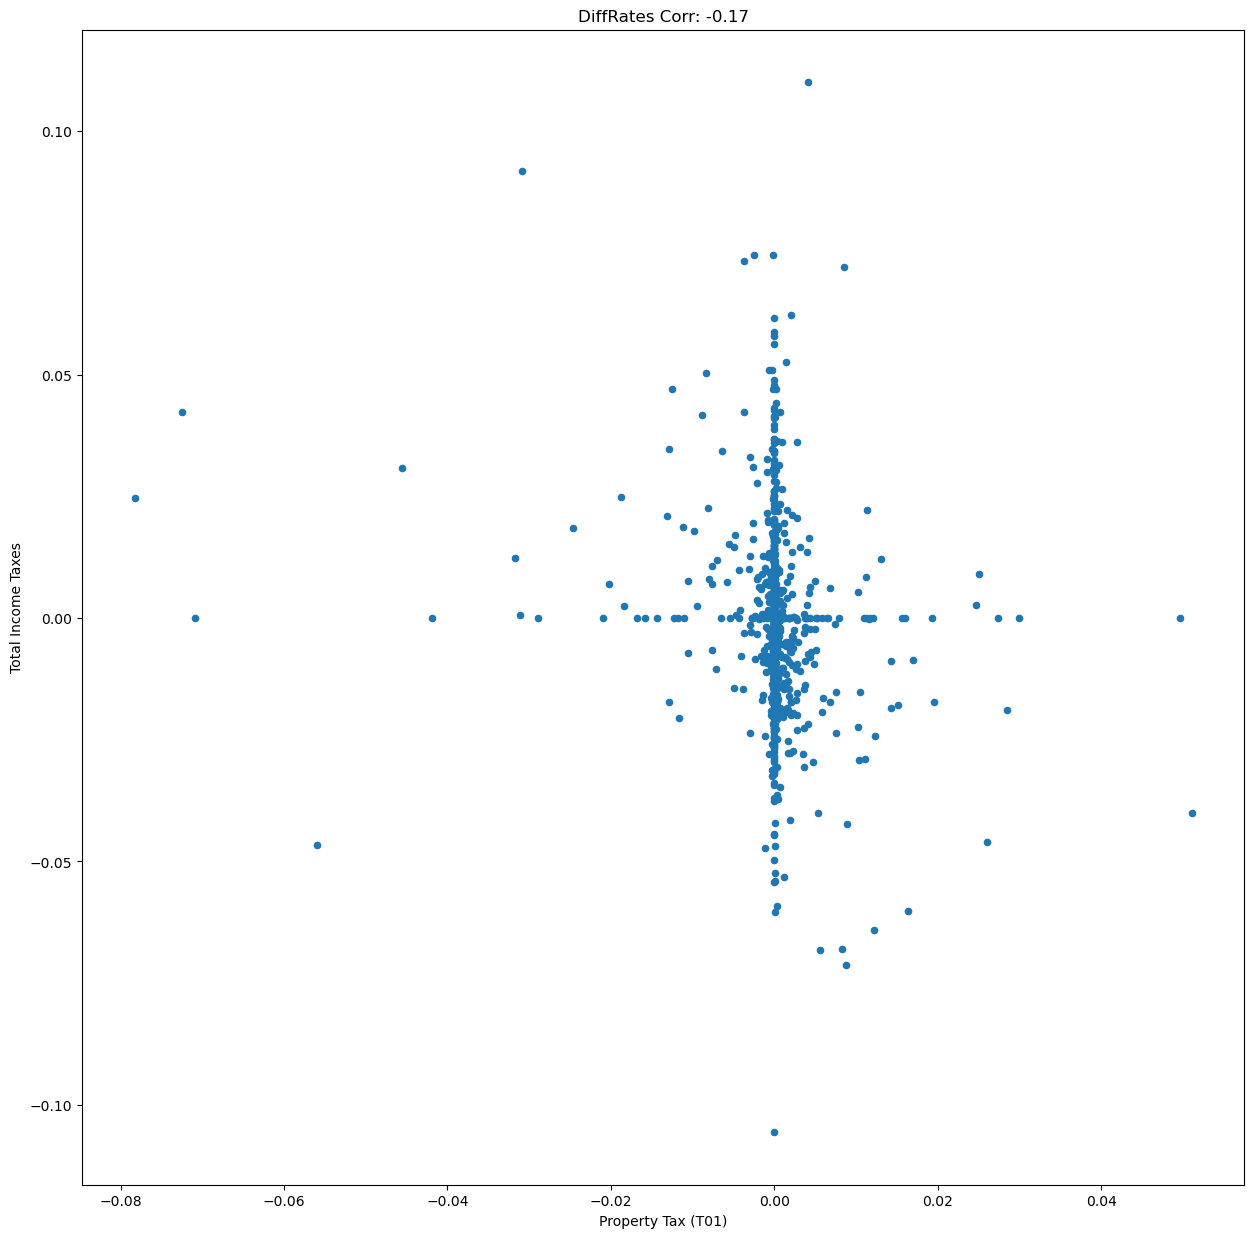

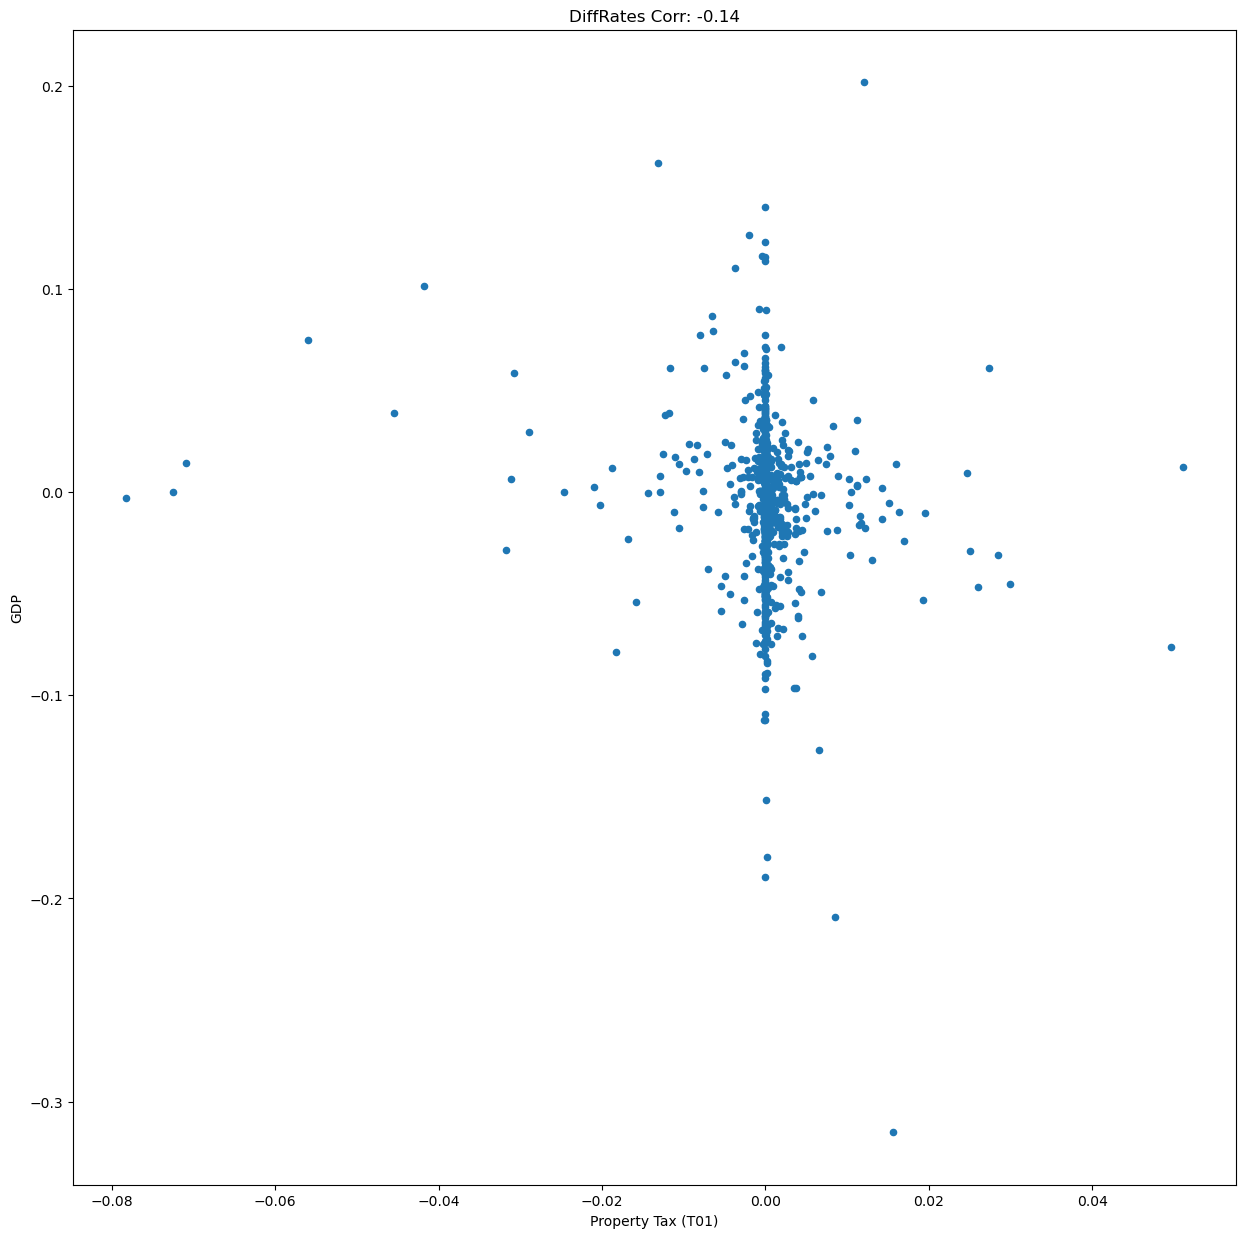

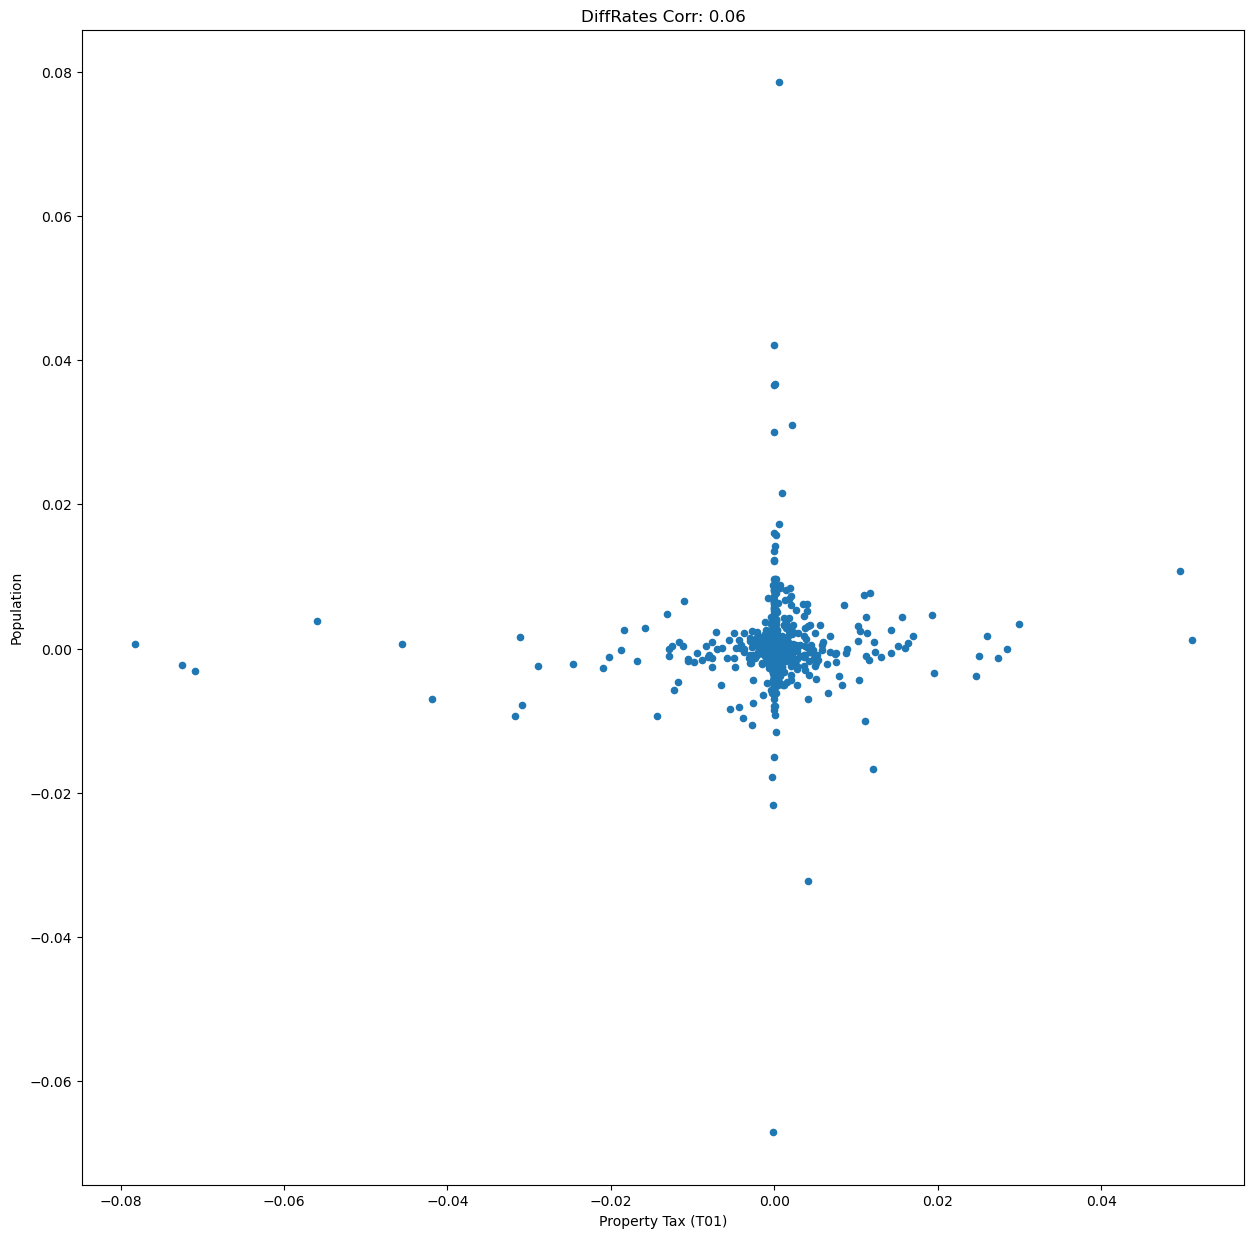

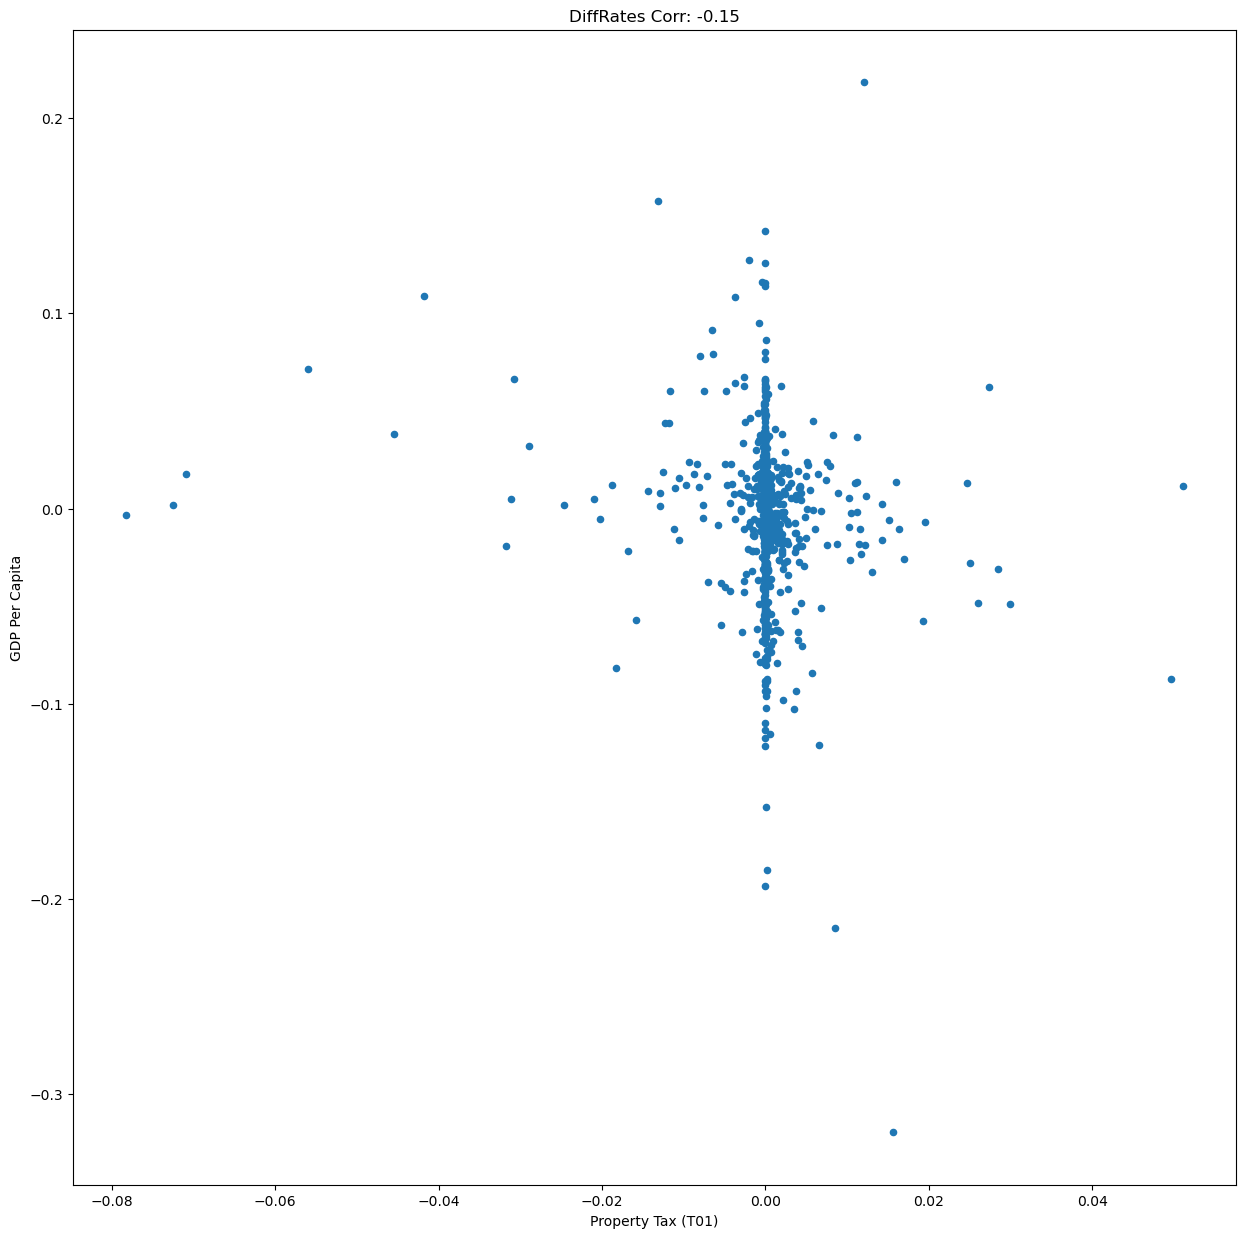

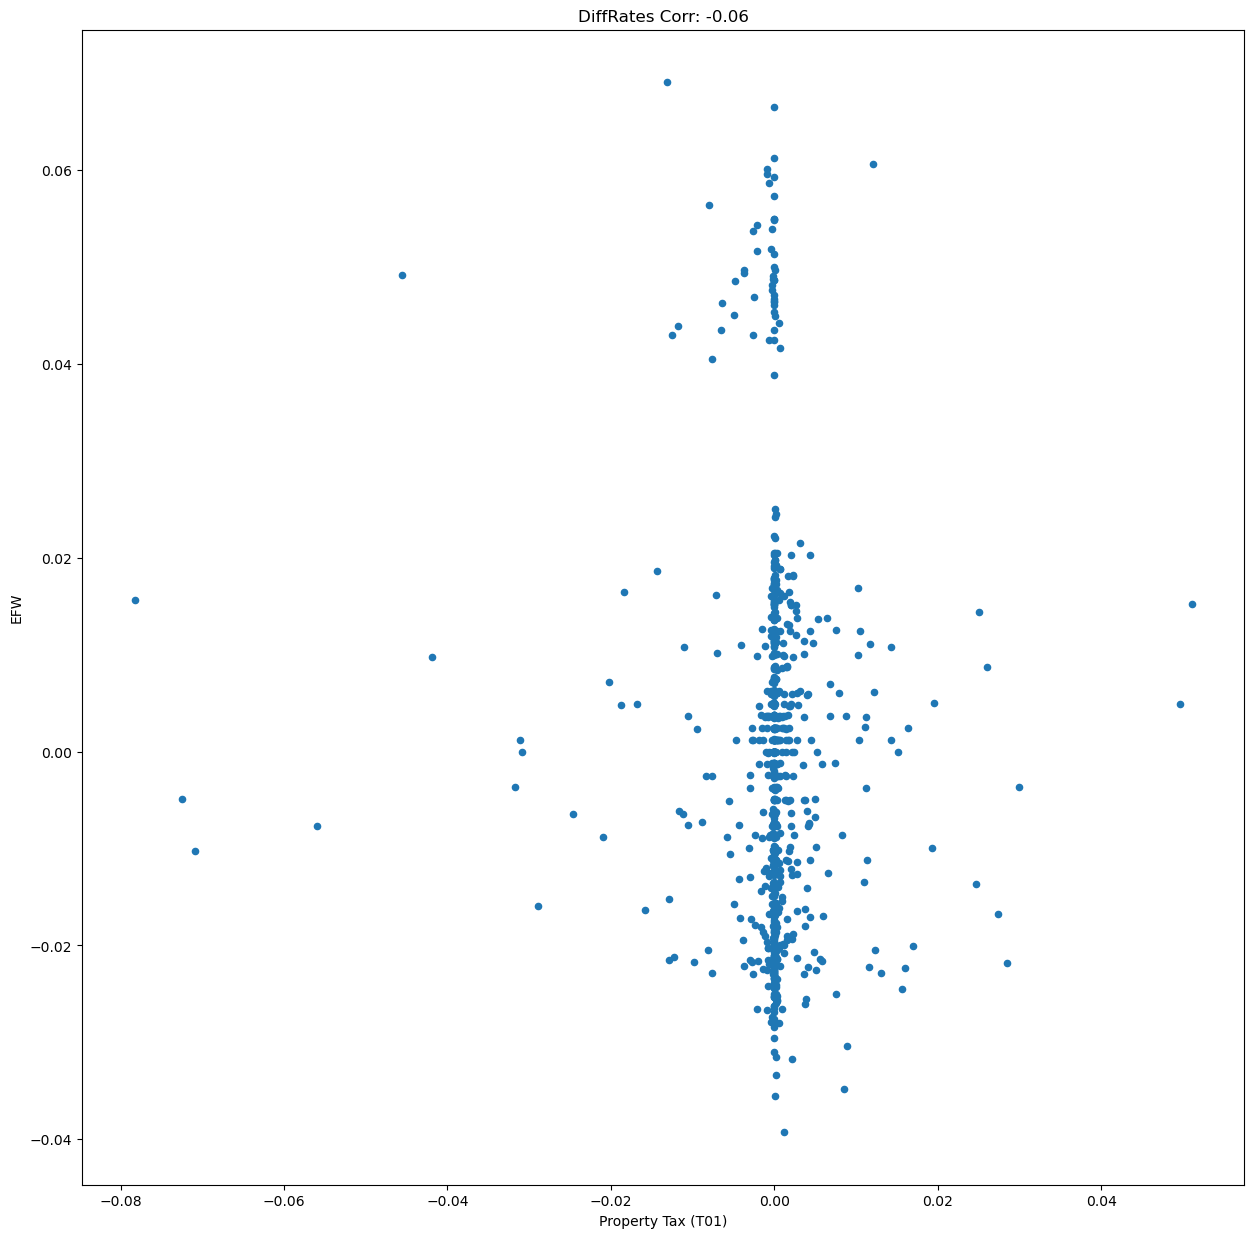

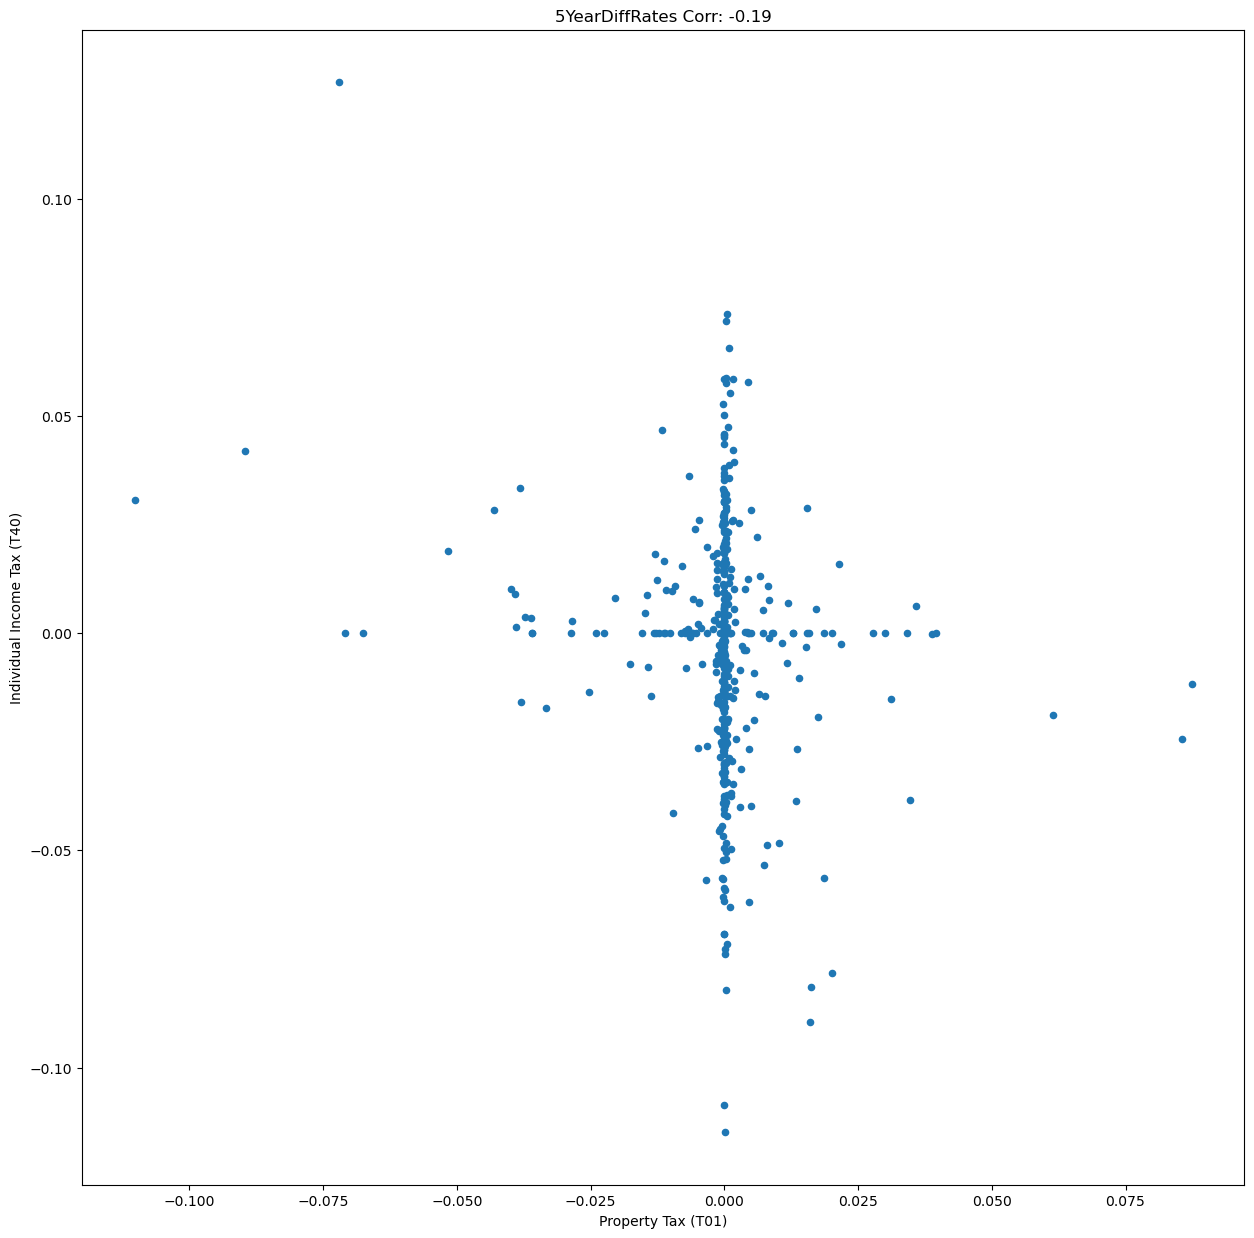

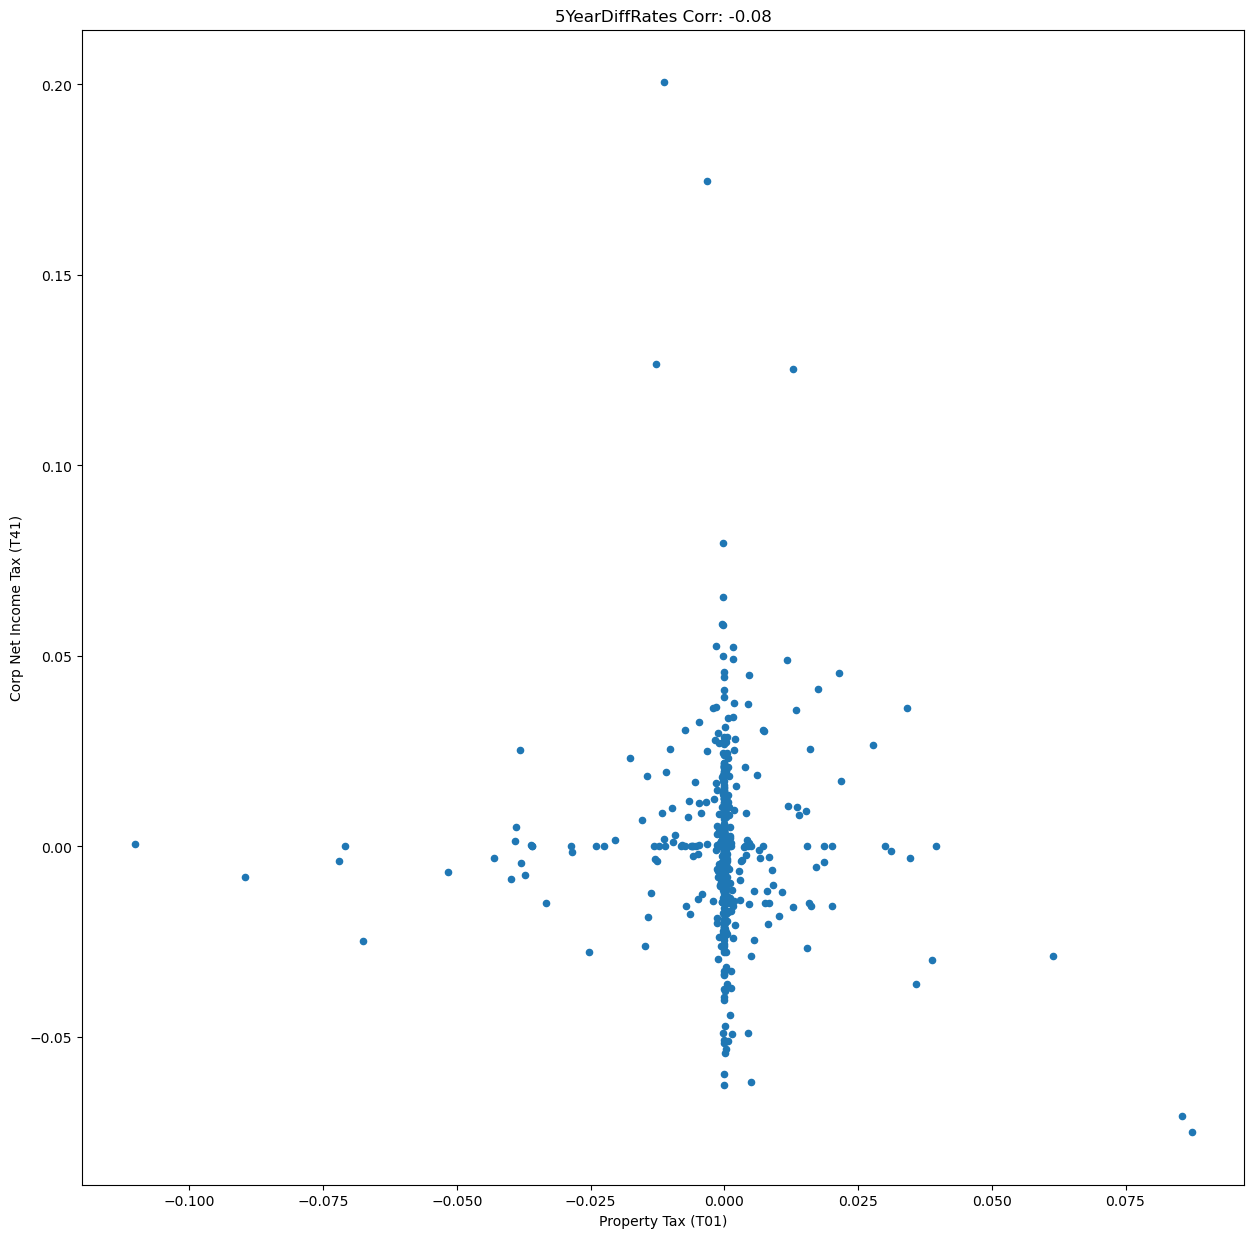

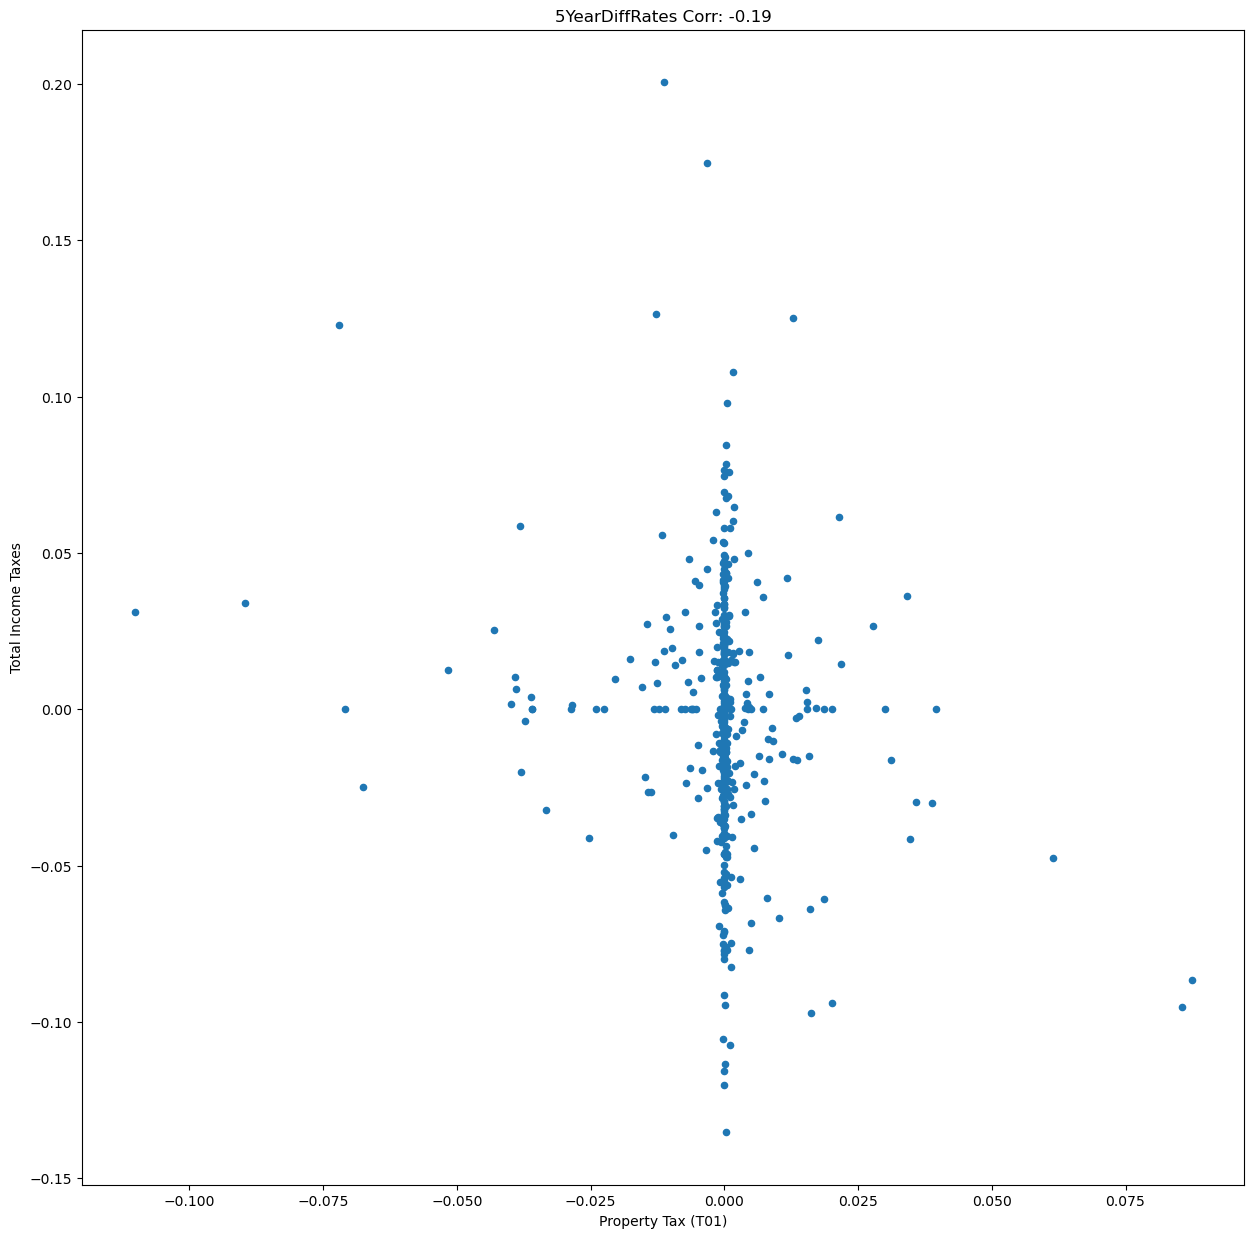

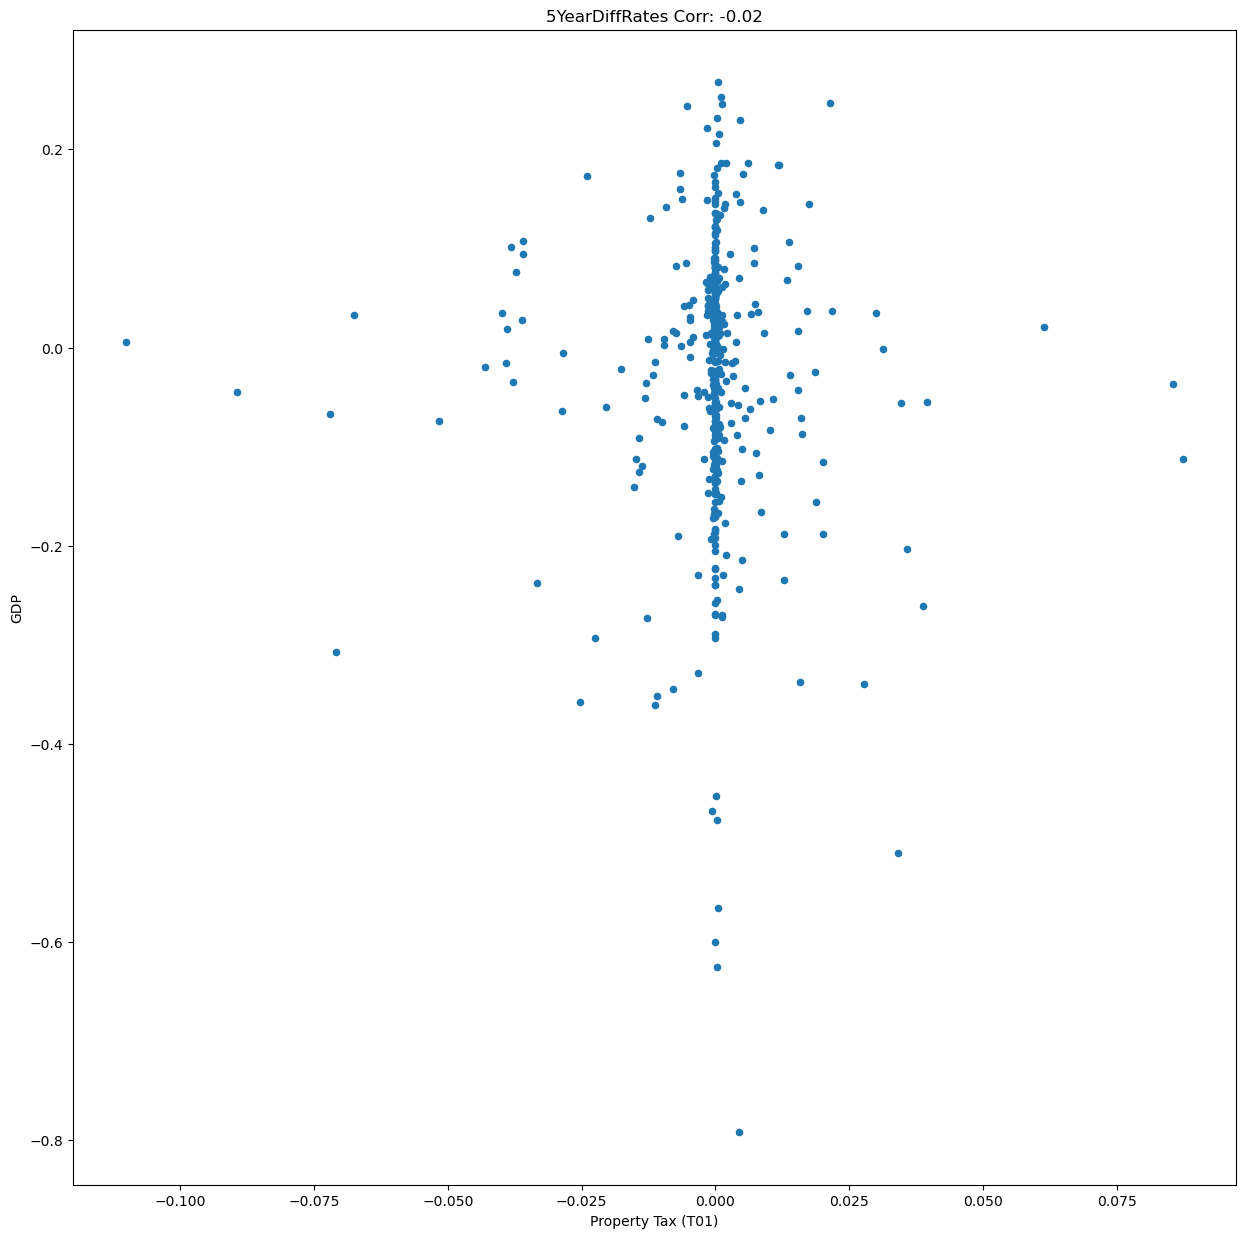

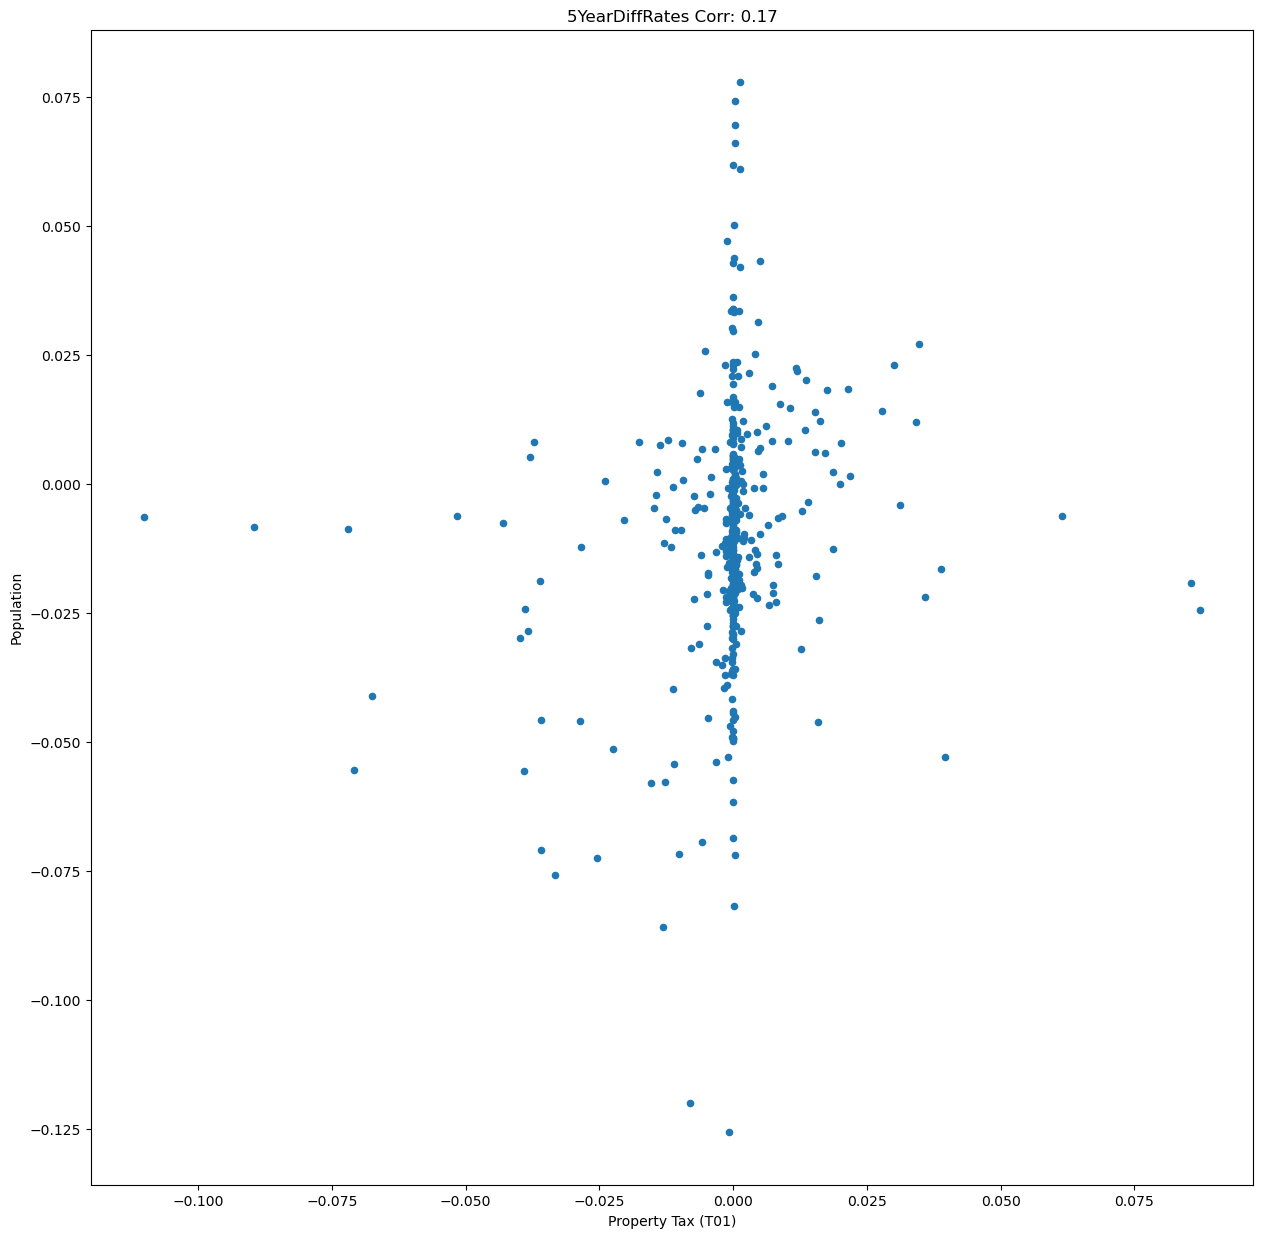

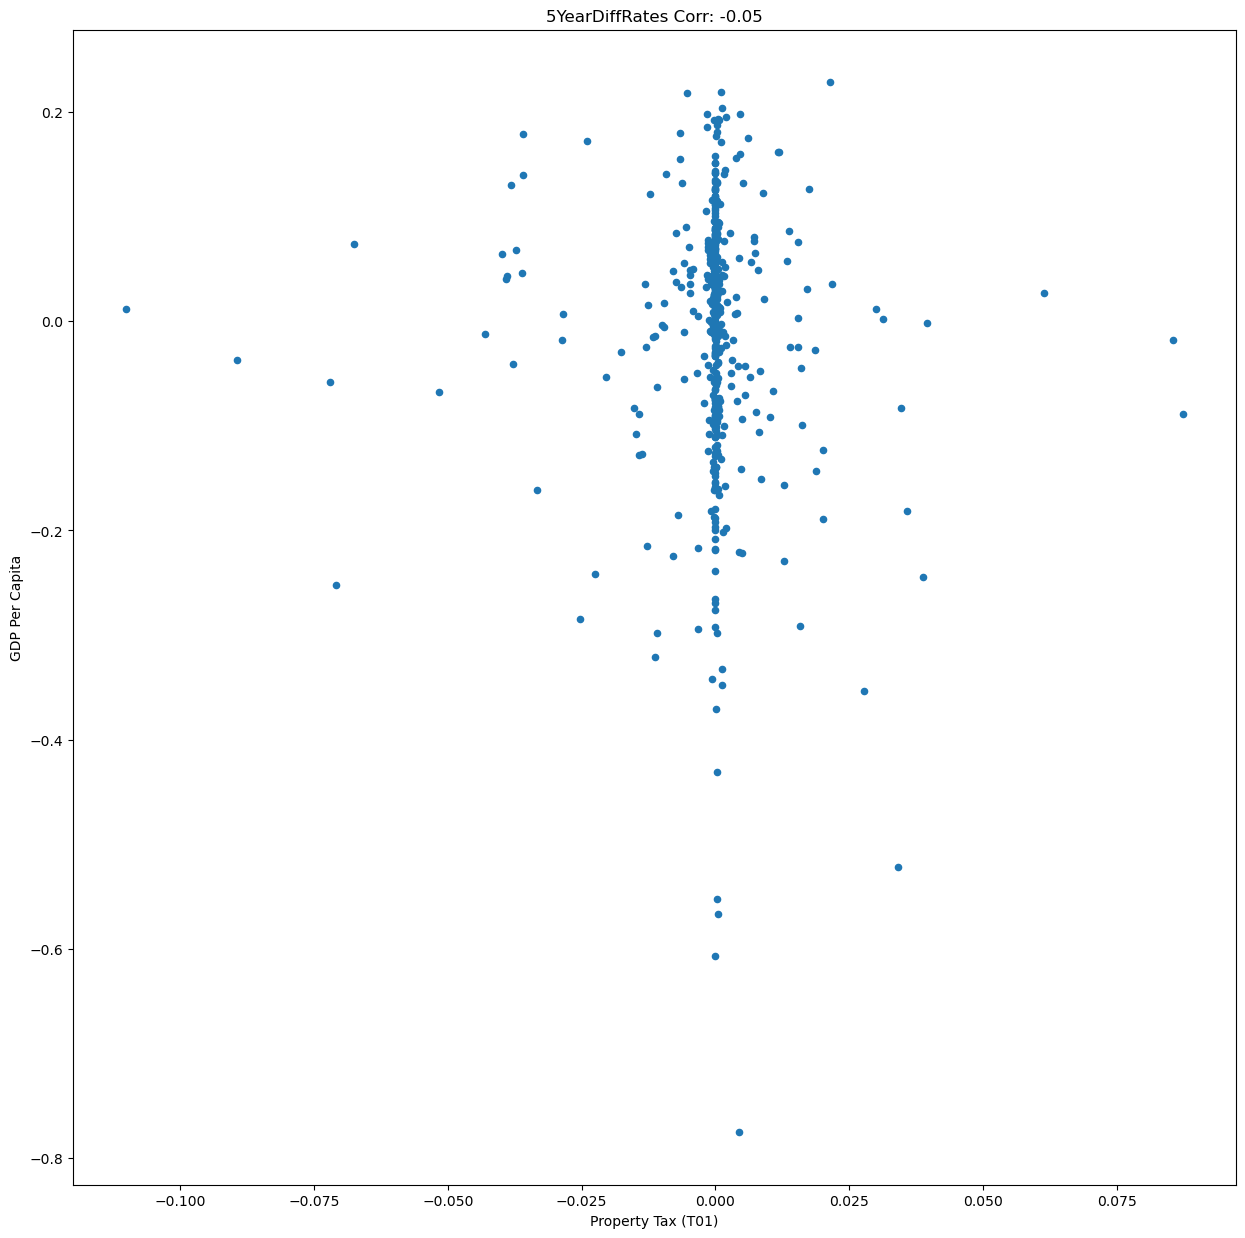

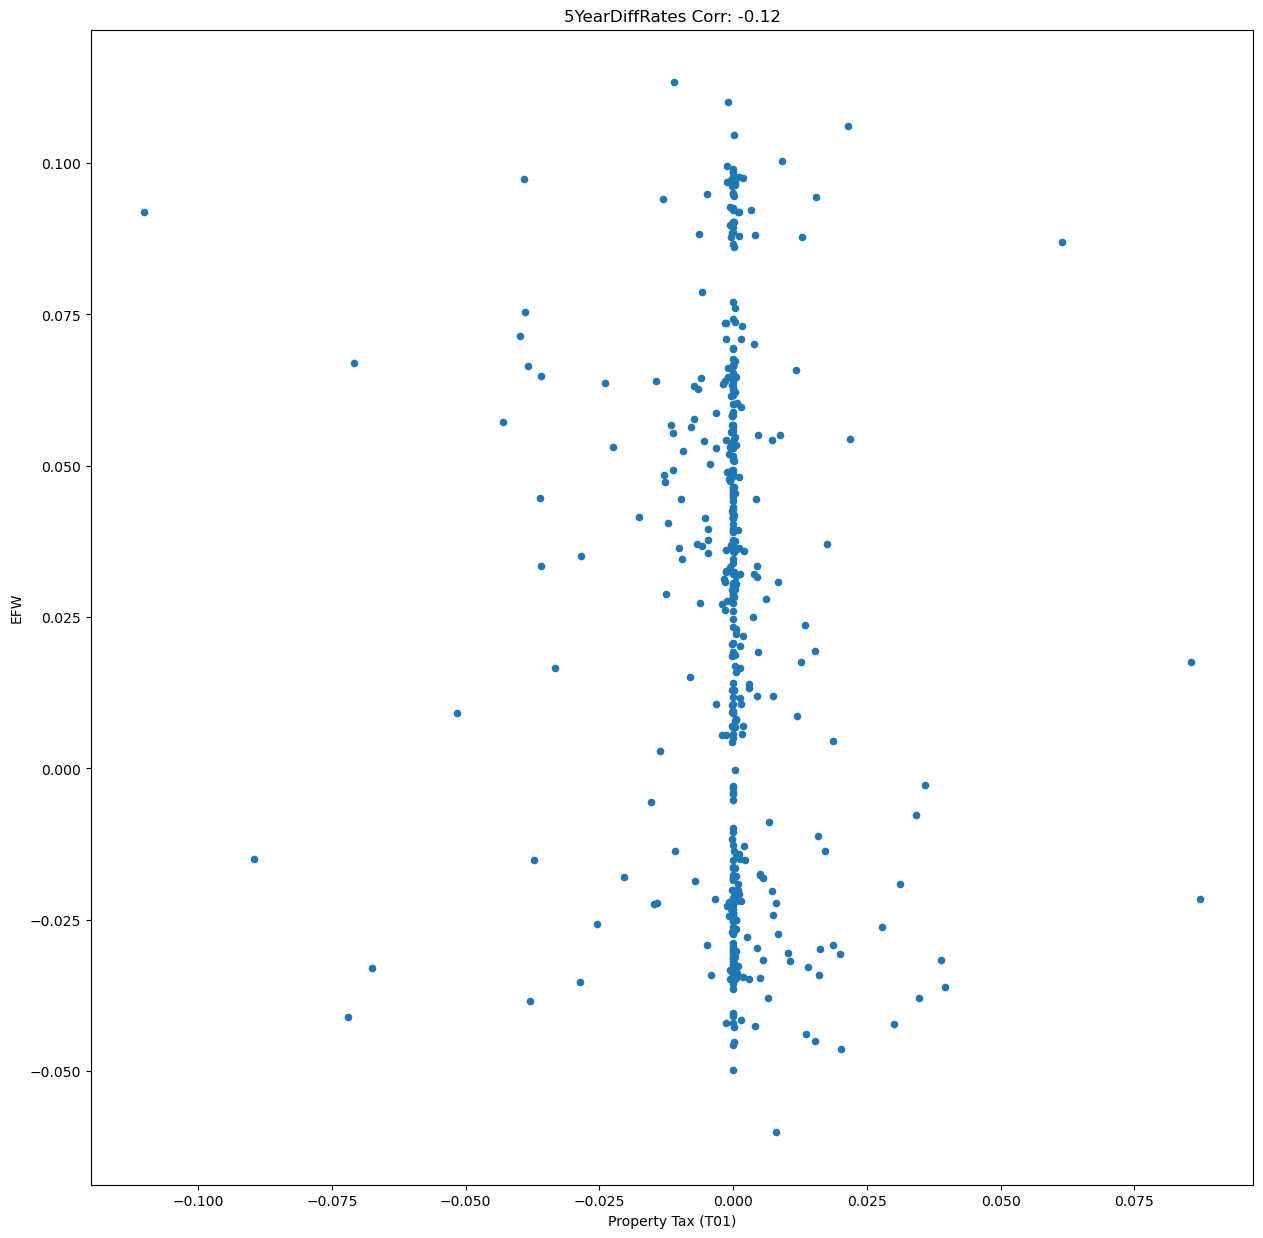

In [13]:
for name, df in dfs.items():
    for income_tax in ("Individual Income Tax (T40)", "Corp Net Income Tax (T41)", "Total Income Taxes", "GDP", "Population", "GDP Per Capita", "EFW"):
        fig, ax = plt.subplots(figsize = (15,15))
        x = "Property Tax (T01)"
        df.plot.scatter(x = x, y = income_tax, ax = ax)
        corrstr = df[[x, income_tax]].corr().round(2).loc[x, income_tax].astype(str)
        ax.set_title(f"{name} Corr: {corrstr}")

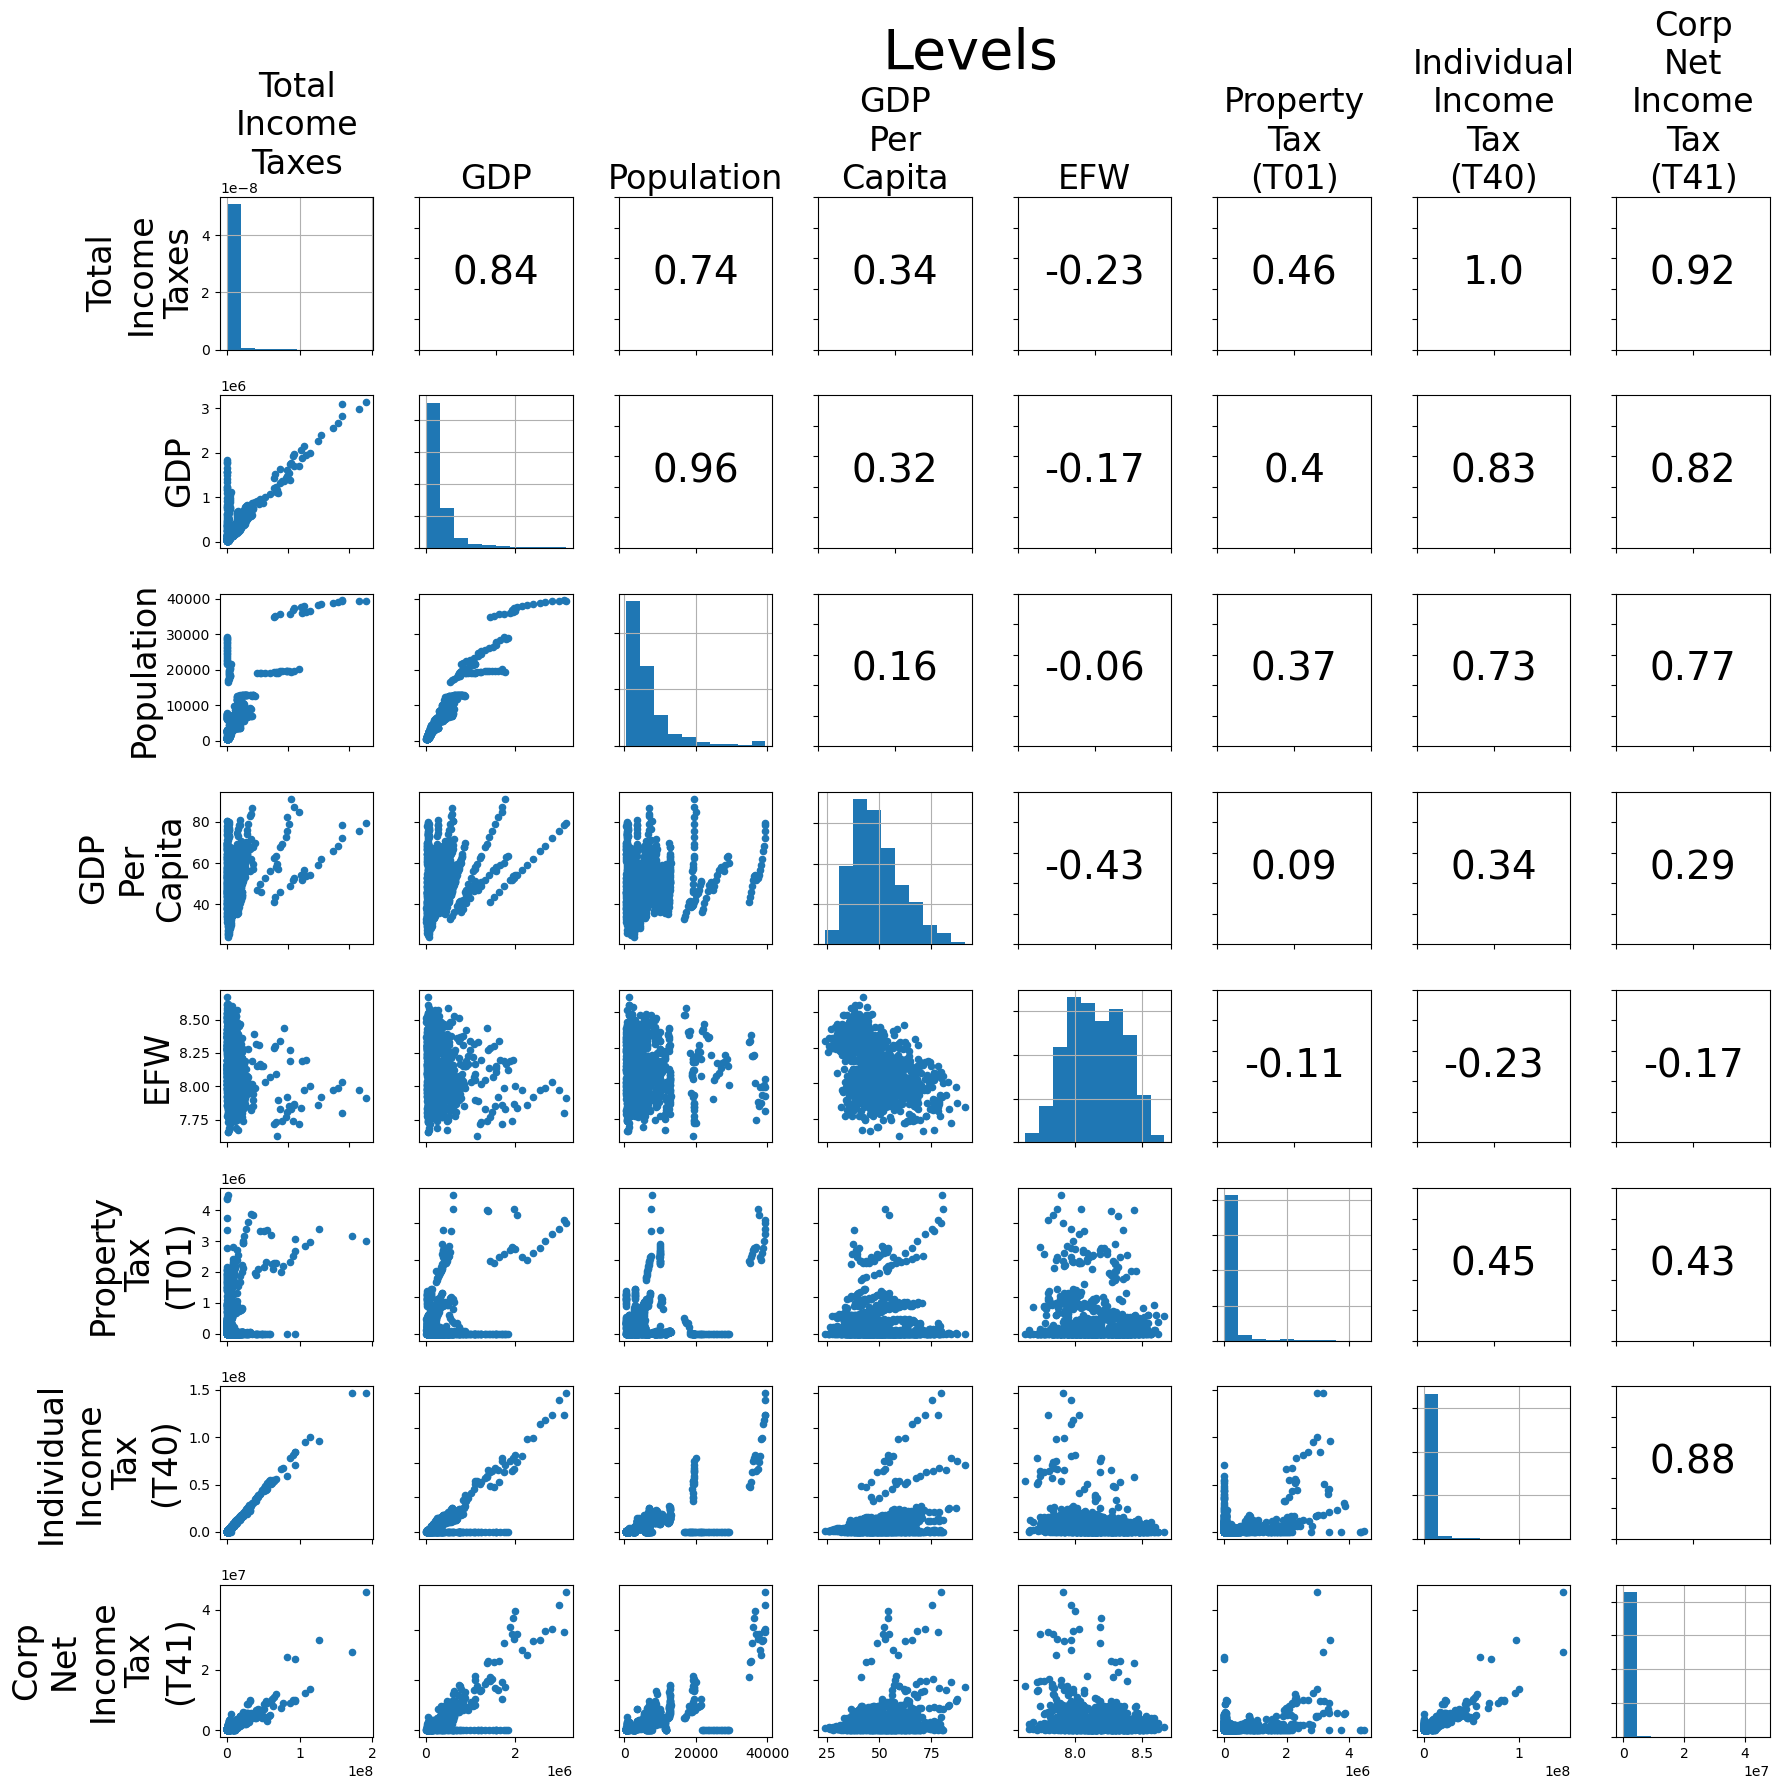

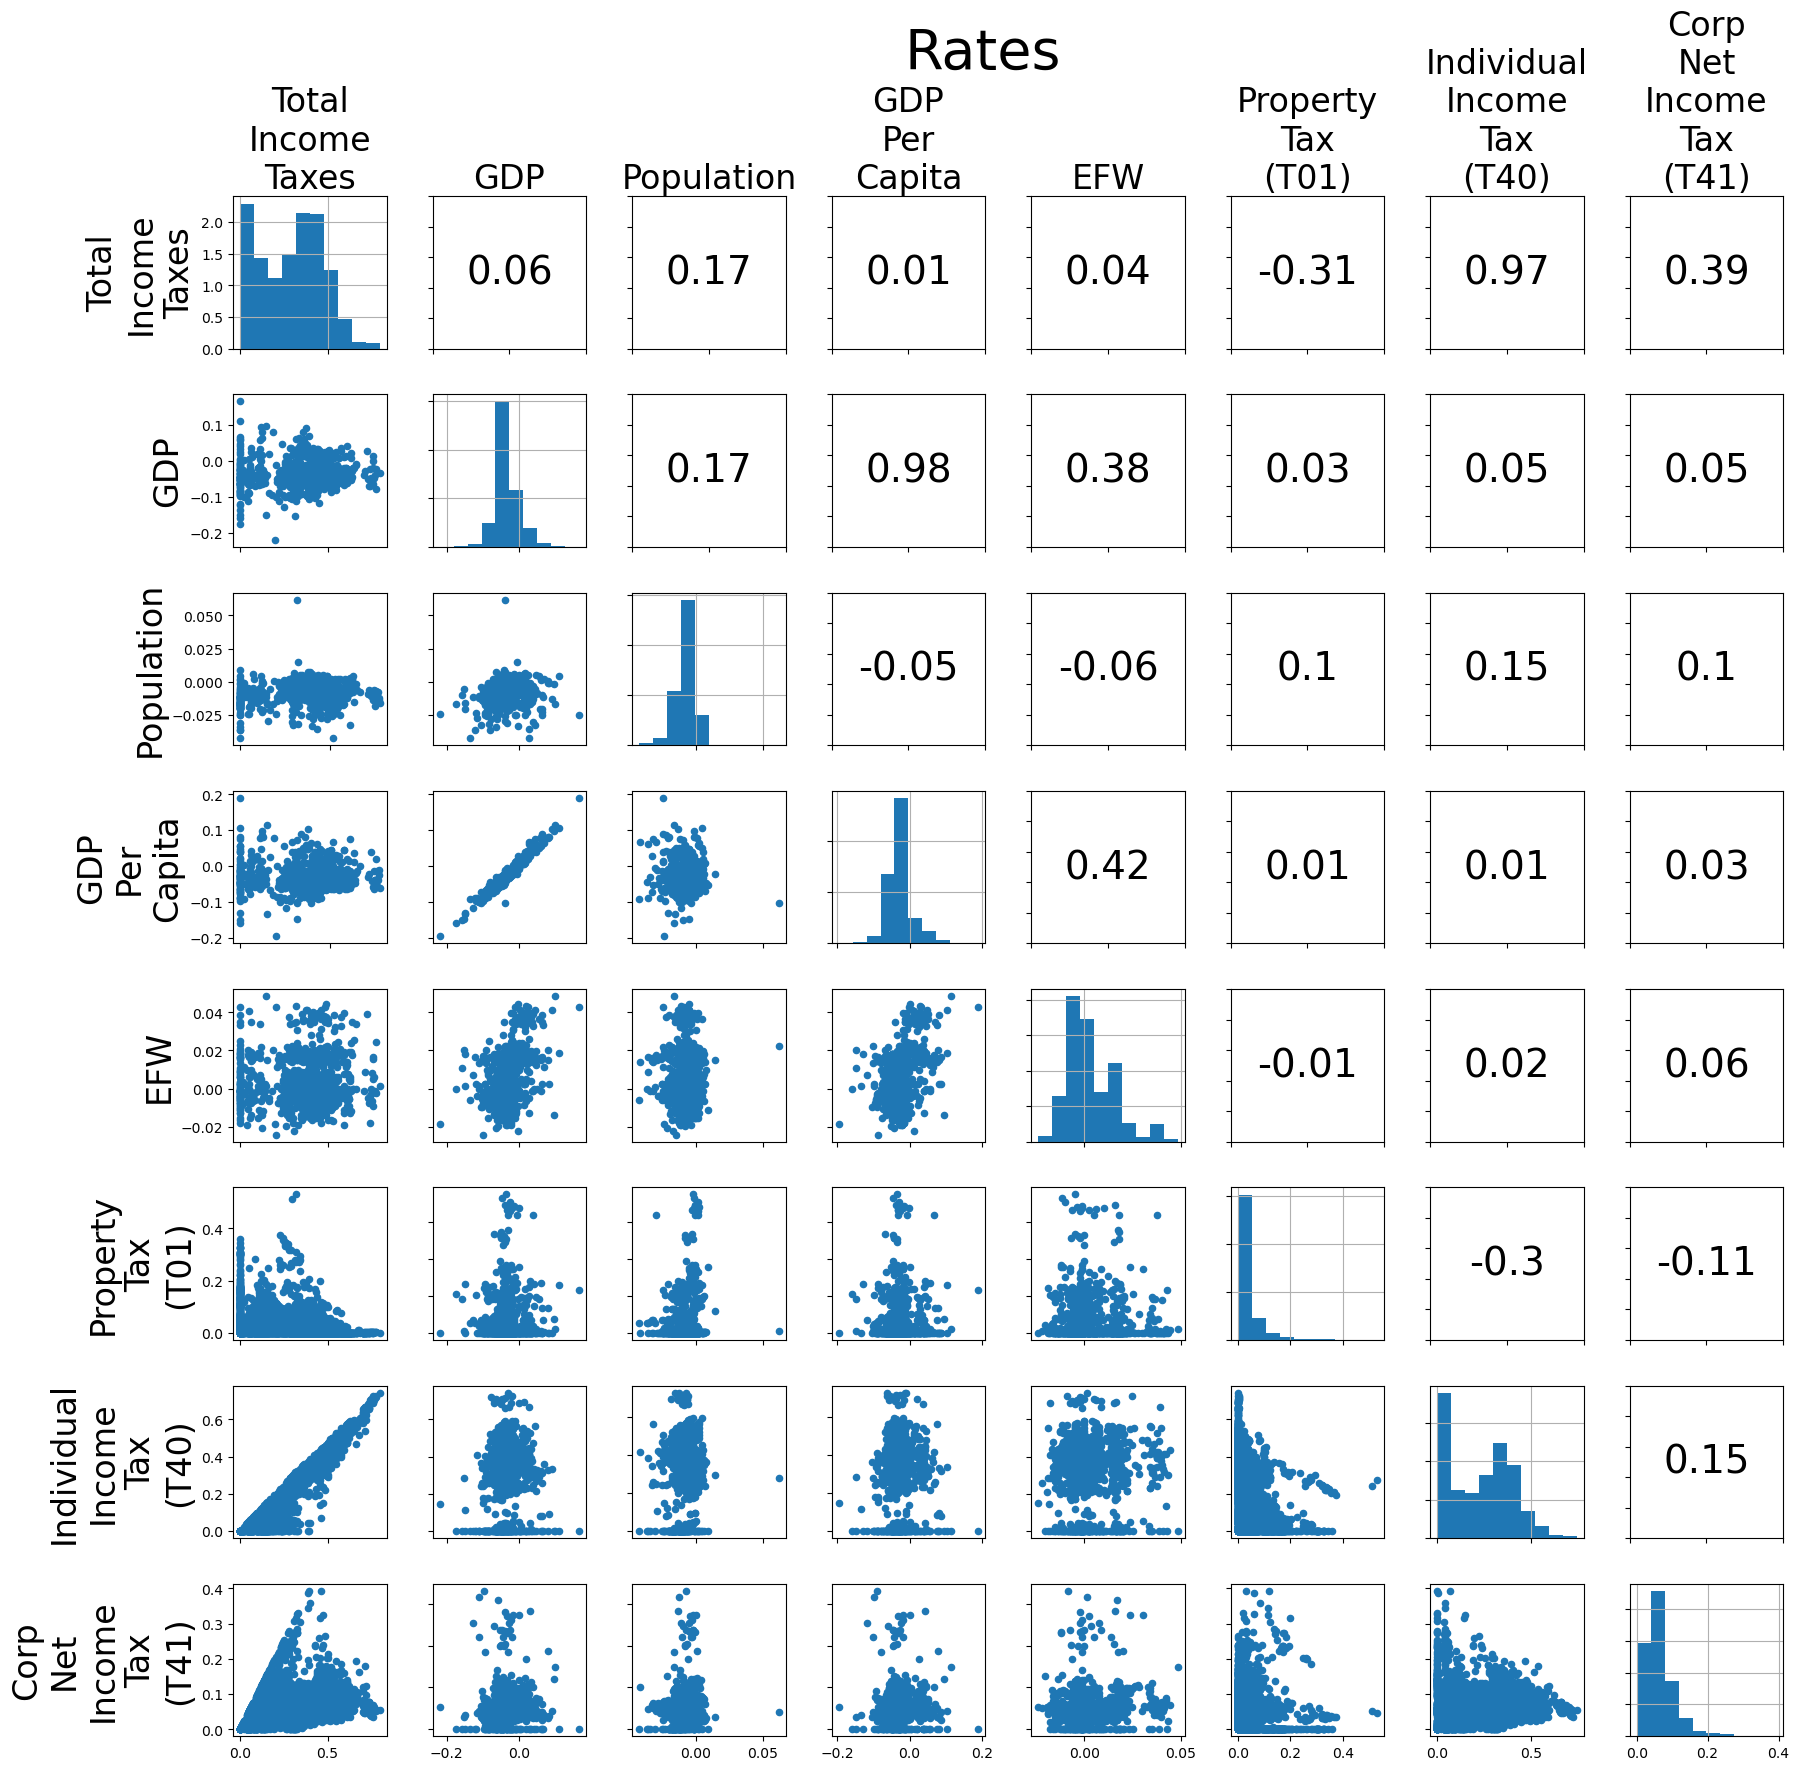

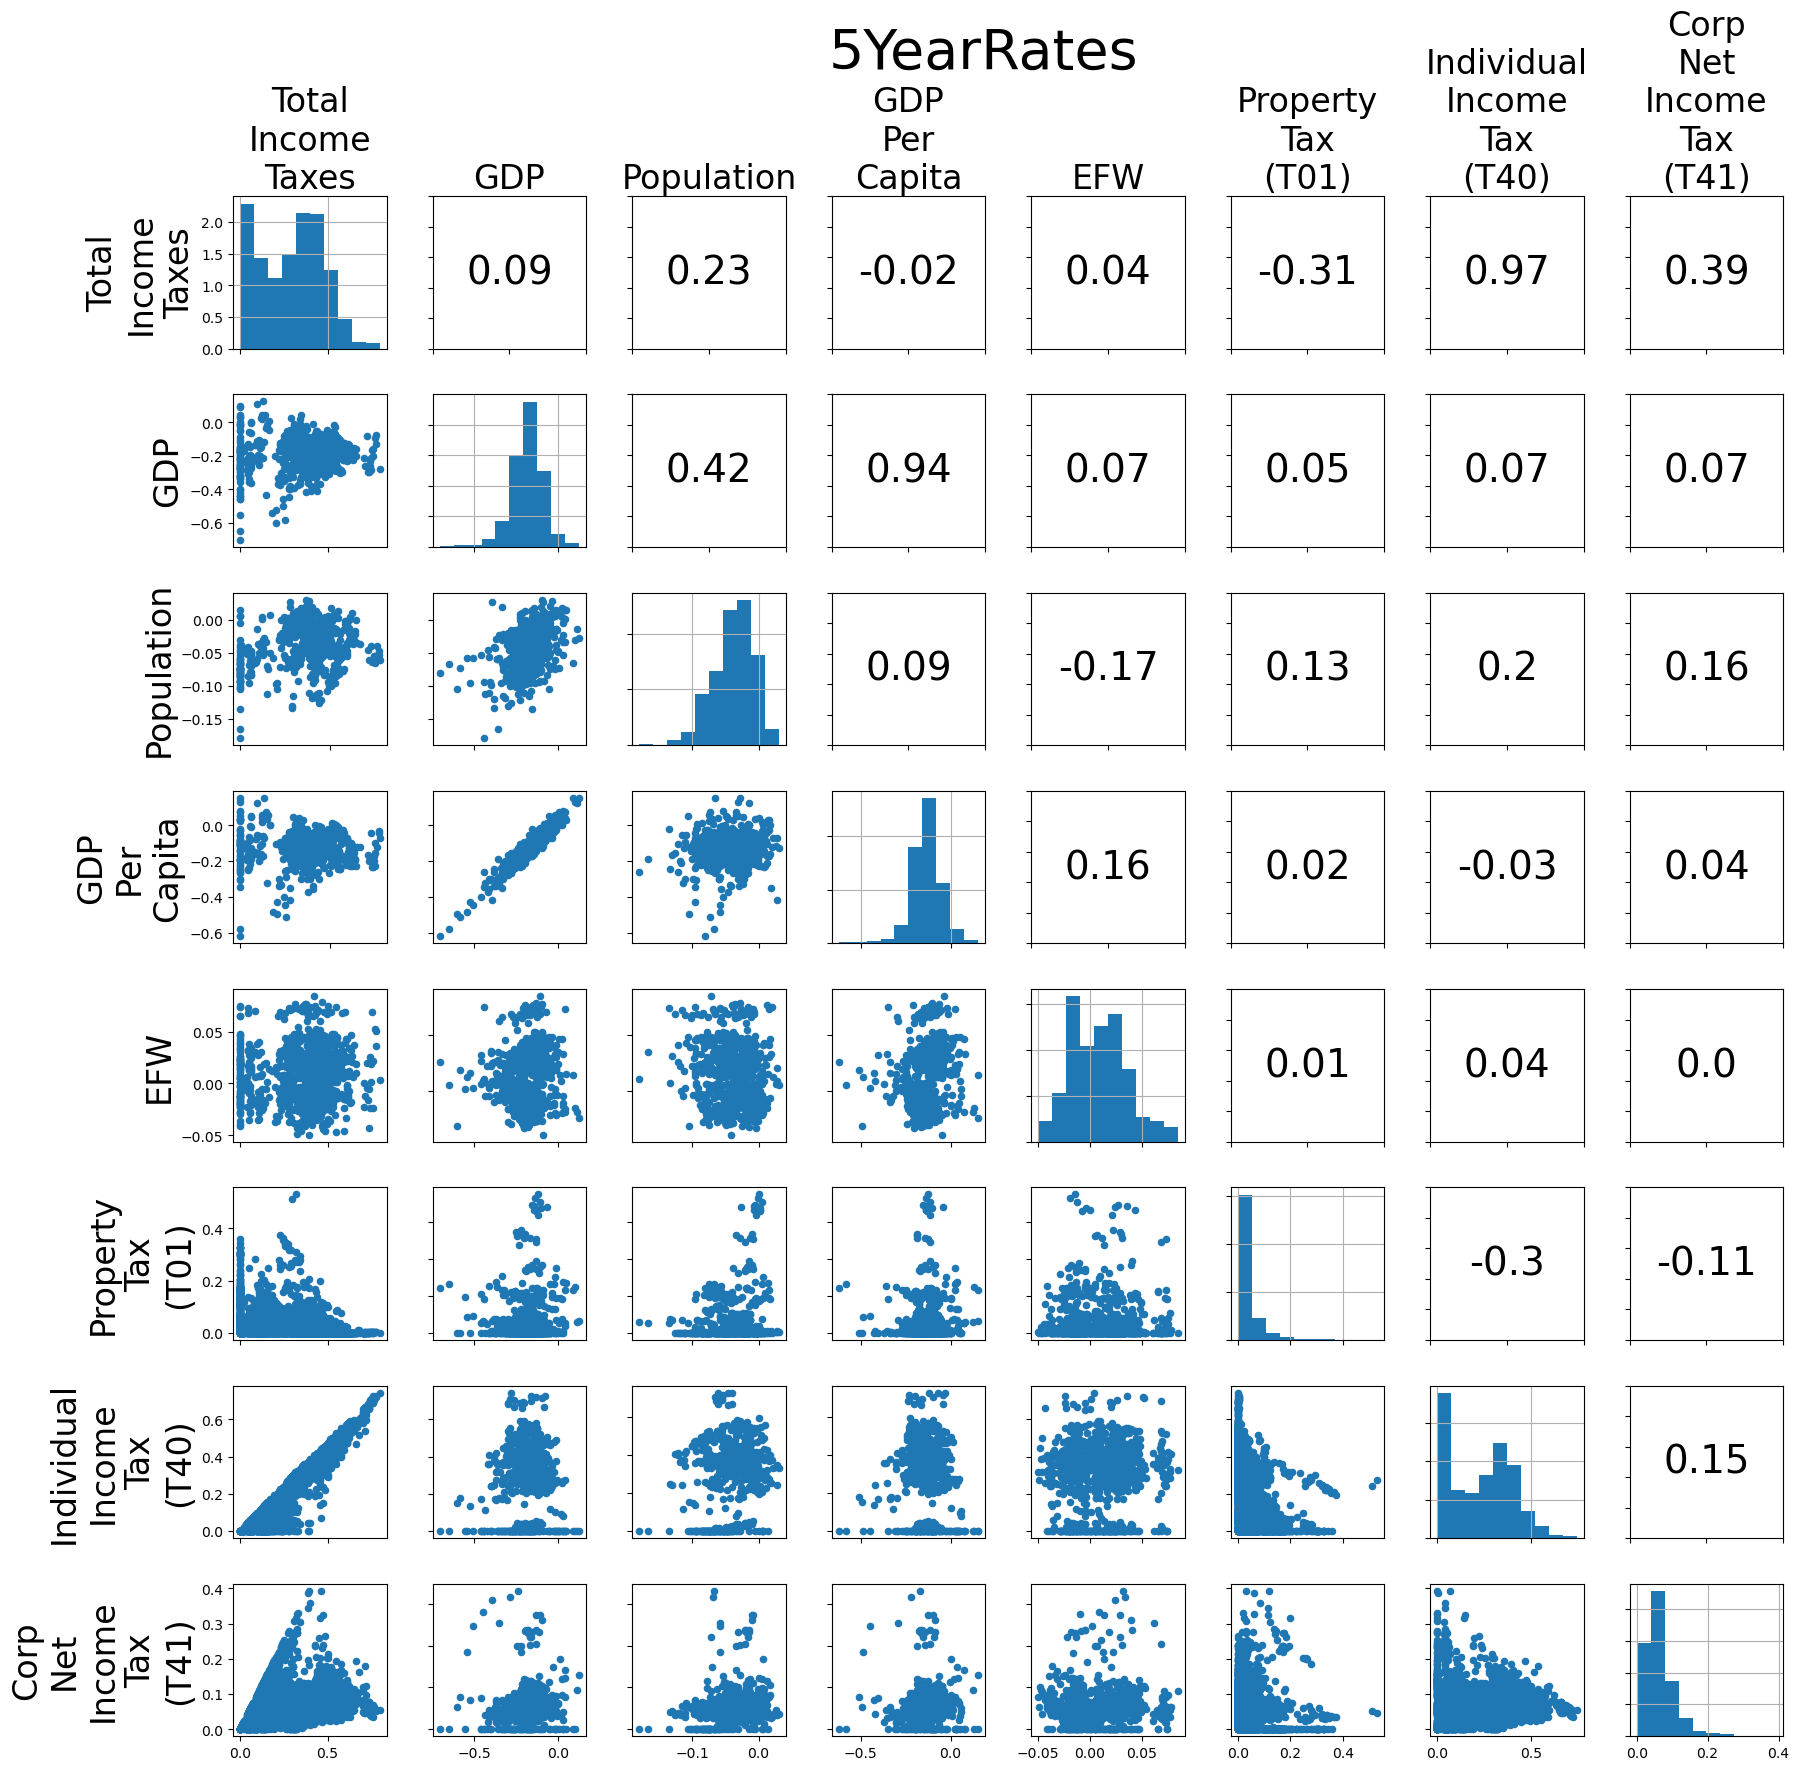

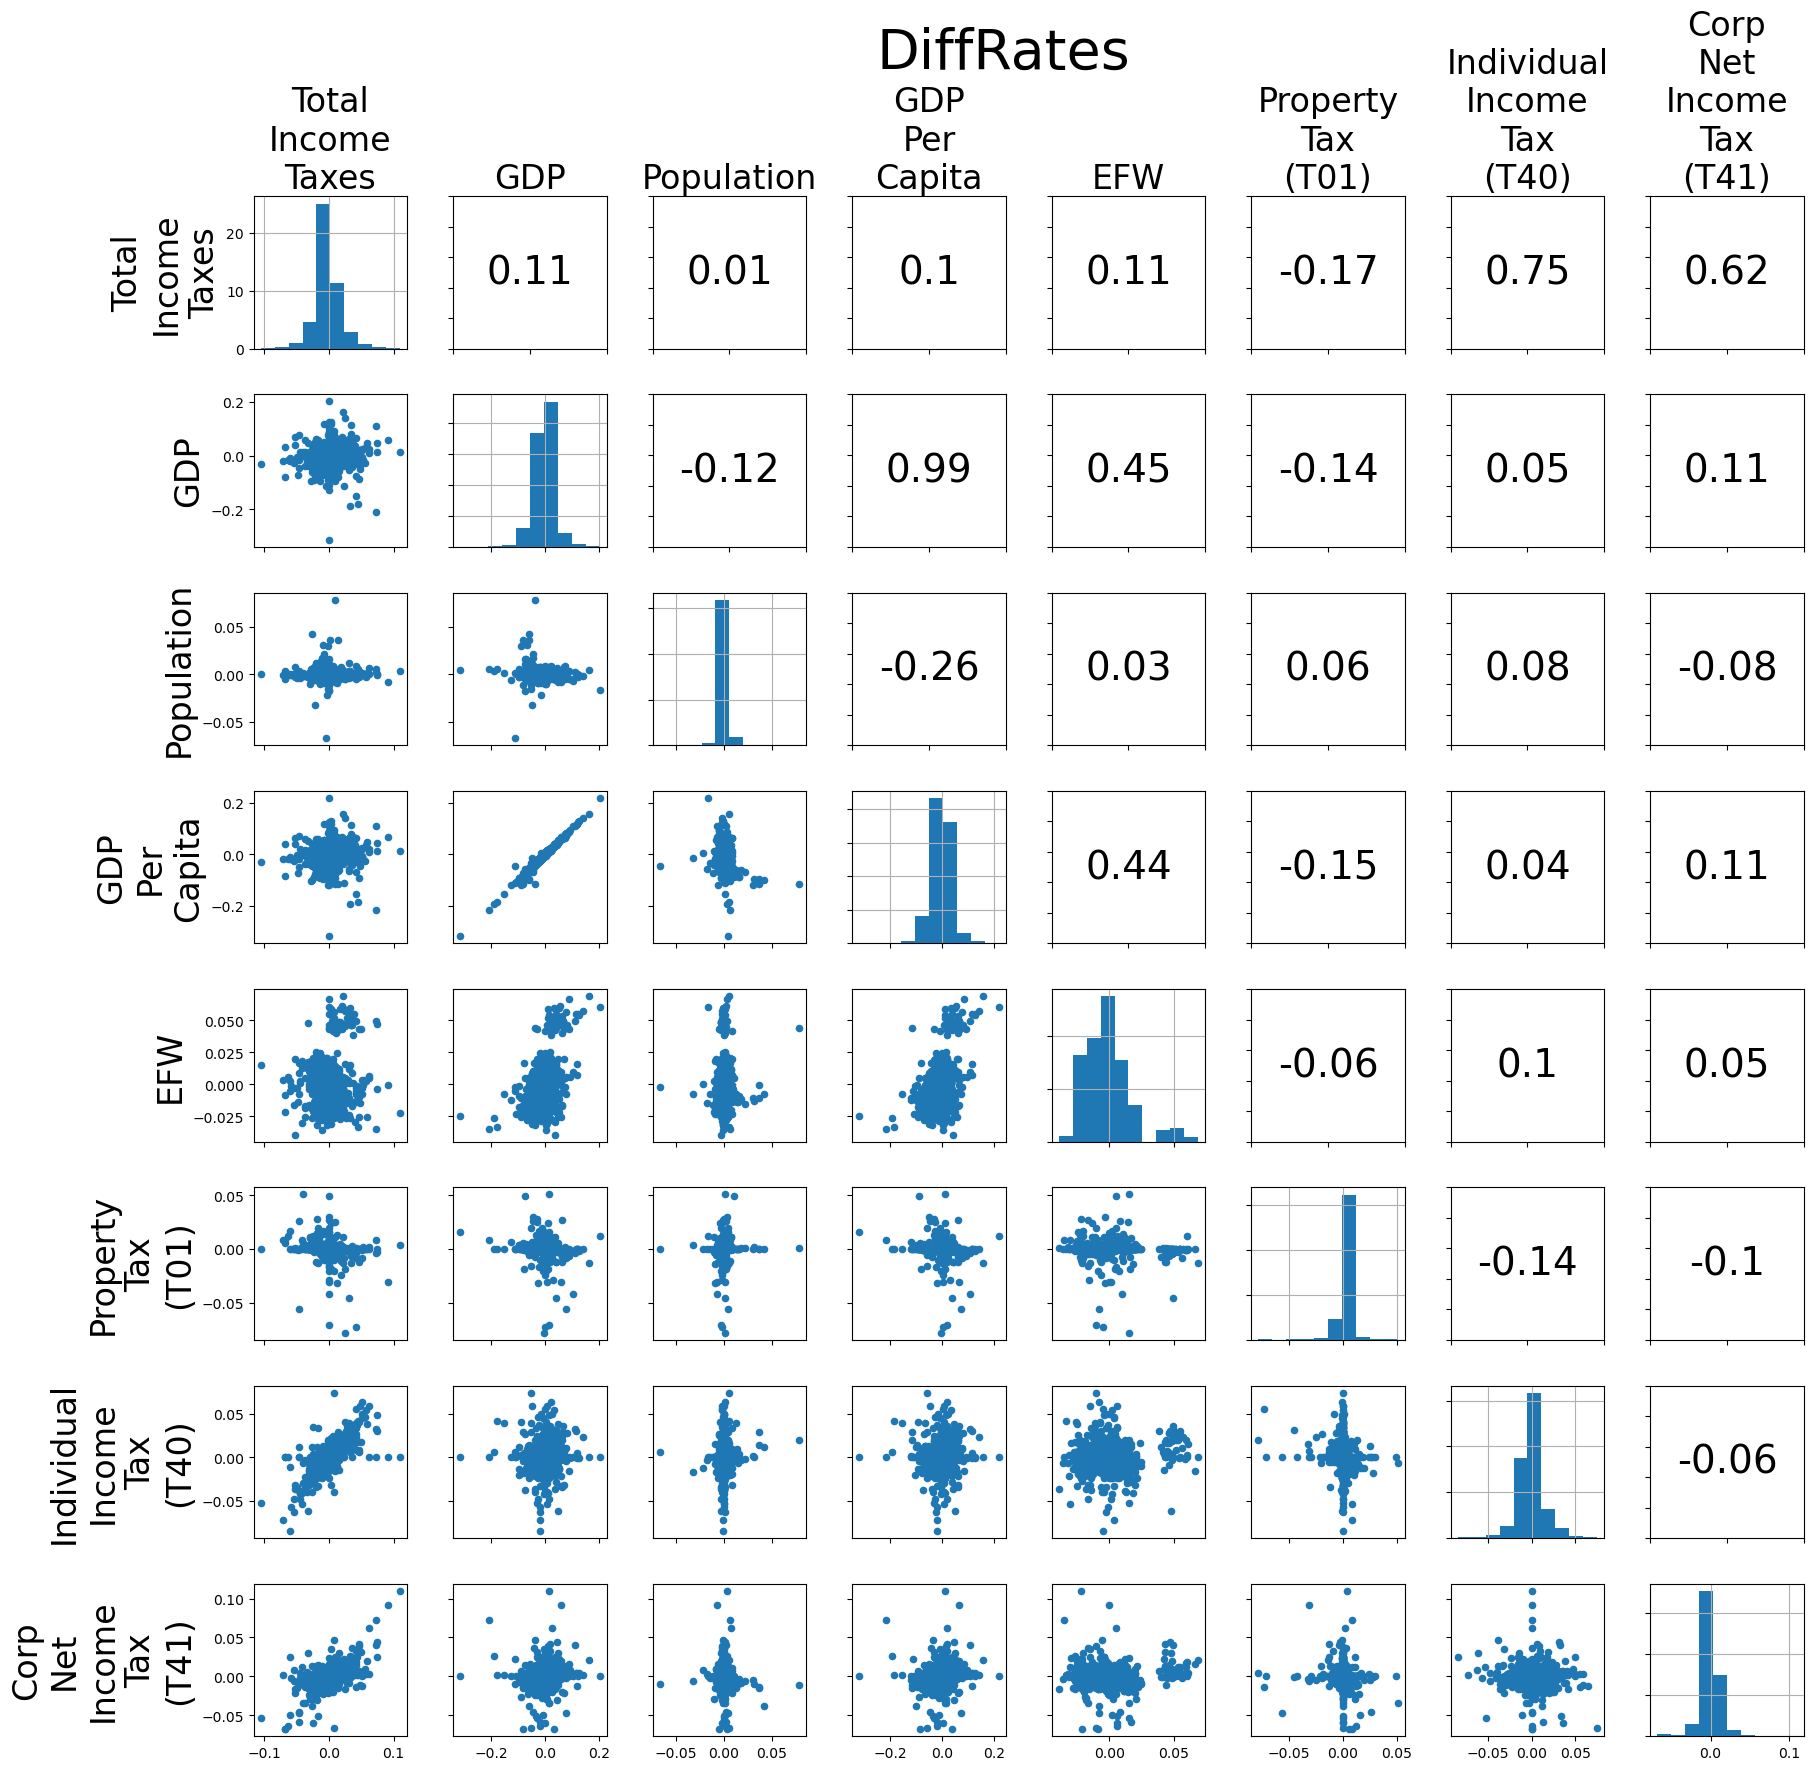

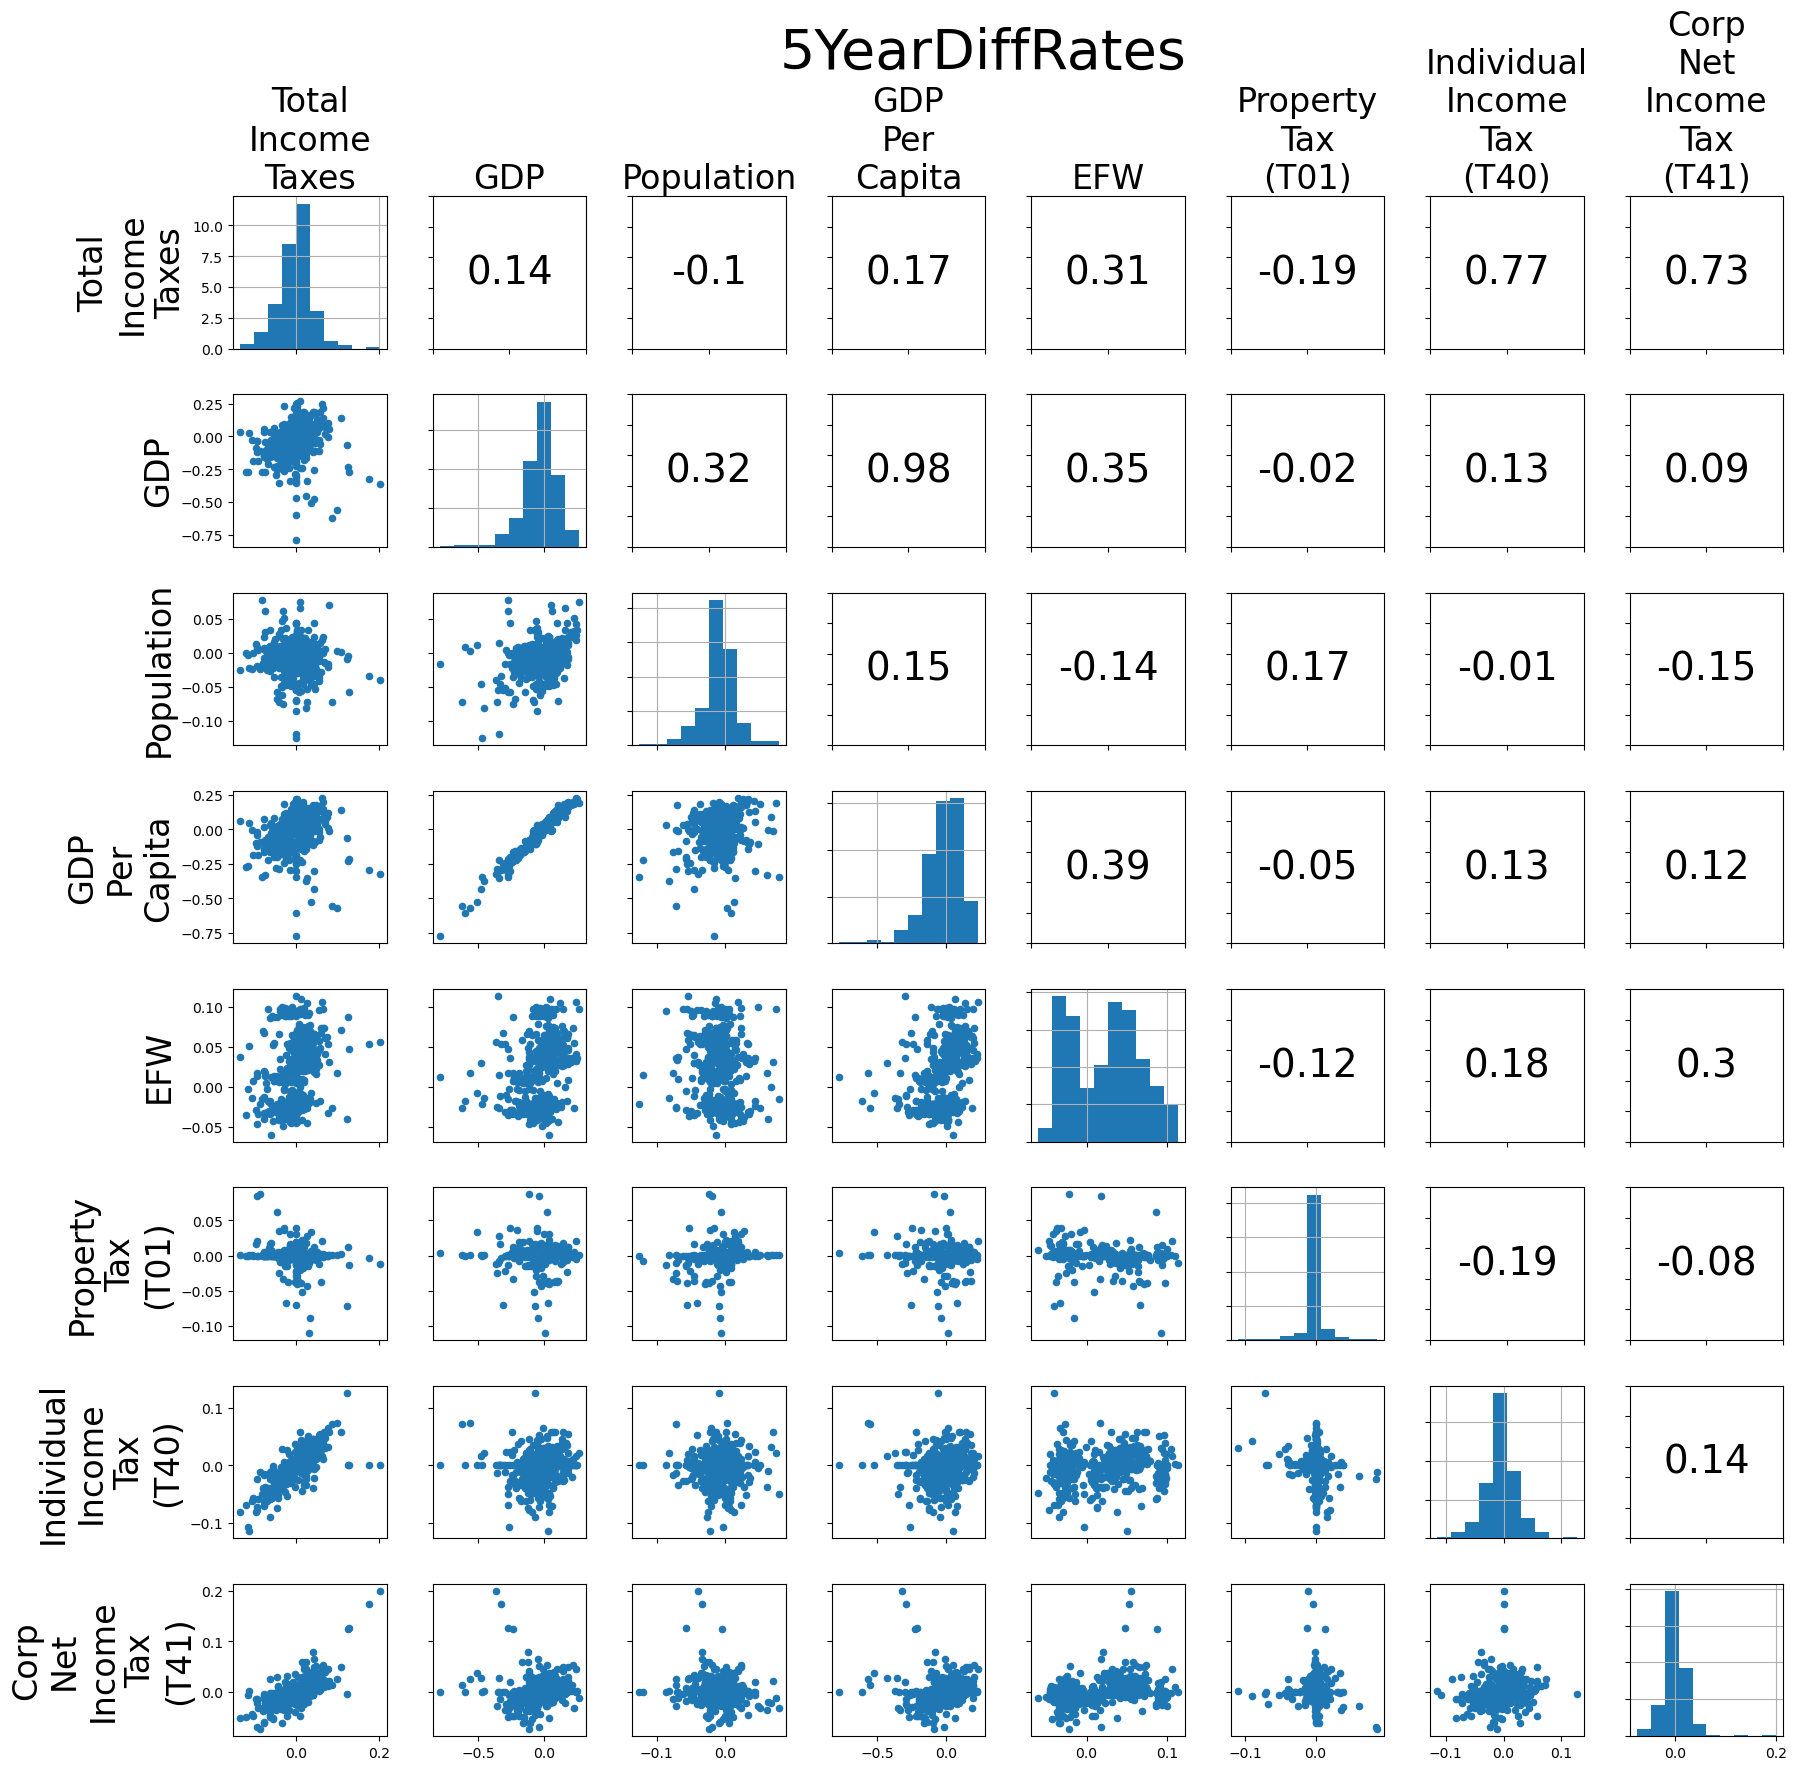

In [14]:
import pingouin
def plot_scatter_corr(plot_df, title, corr = "corr"):
    corr_df = getattr(plot_df, corr)().round(2)
    num_keys = len(plot_df.keys())
    fig, axs = plt.subplots(num_keys, num_keys, figsize = (20,20))
    for i, key1 in enumerate(plot_df.keys()):
        for j, key2 in enumerate(plot_df.keys()):
            
            if i < j:
                ax = axs[j][i]
                plot_df.plot.scatter(x = key1, y =key2, ax = ax)
            elif i > j:
                ax = axs[j][i]
                ax.text(.5,.5, corr_df.astype(str).loc[key2, key1],
                       ha = "center", va = "center",
                       fontsize = 28)
                ax.set_xticklabels([])
            else:
                ax = axs[i][j]
                plot_df[[key1]].hist(density = True, ax = ax)
                if i == 0: ax.set_ylabel(key1)
                # if i == num_keys - 1: ax.set_xlabel(key1)
            
            if i >0:
                ax.set_ylabel("")
                ax.set_yticklabels([])
            else:
                ax.set_ylabel(key2.replace(" ", "\n"), fontsize = 24)
            if j < num_keys - 1: 
                ax.set_xticklabels([])
            if j > 0:
                ax.set_title("")
            else:
                ax.set_title(key1.replace(" ", "\n"), fontsize = 24)
            ax.set_xlabel("")
    plt.suptitle(name, fontsize = 40, y = .965)
    return fig, ax
plot_keys = ["Total Income Taxes", "GDP", "Population", "GDP Per Capita", "EFW",
             "Property Tax (T01)", "Individual Income Tax (T40)", 
             "Corp Net Income Tax (T41)"]
for name, df in dfs.items():
    plot_df = df[plot_keys]
    fig, ax = plot_scatter_corr(plot_df, name, corr = "corr")
    # use limited set for pcorr
    # plot_scatter_corr(plot_df, name, corr = "pcorr")
    